## Keypoint Detection
---
There are 5 images given in the ***img*** folder. Your task is to detect ***200*** keypoints for each of them using detectors.

You are free to use any languages (C, Matlab, Python), any keypoint detection methods (such as SIFT, ORB, ...)

Let's take a look at these images first!

---

In [1]:
# load packages
import cv2
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

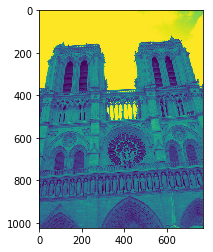

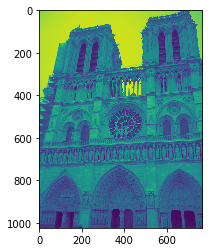

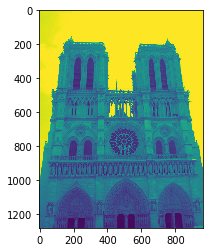

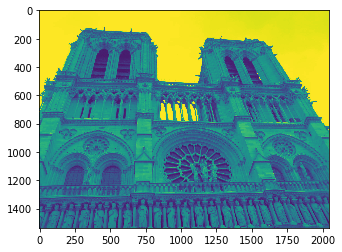

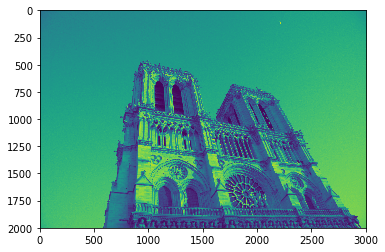

In [2]:
img_dir = "keypoint_detection/images"
if os.path.exists(img_dir):
    if os.listdir(img_dir) is []:
        print("No images!")
        exit(0)
    num_img = len(os.listdir(img_dir))
    for img in os.listdir(img_dir):
        if not img.endswith("jpg"):
            continue
        image_dir = os.path.join(img_dir, img)
        image = cv2.imread(image_dir)
        gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        plt.imshow(gray)
        plt.show()
else:
    print("image folder not exists!")
    exit(0)

### The Keypoints:
The output of this part is a list of keypoints that represented by the x and y cooridnates.

For example, the 10 points of image ***NotreDame5.jpg*** are:

In [25]:
#### NotreDame1 ####
keypoints1 = list([ (314.88, 345.55126953),(313.35, 650.10131836),(315.98, 448.66244507),(322.47, 501.36163330),(322.94, 782.79724121),(327.42, 617.25543213),(356.76, 526.88171387),(387.82, 777.32794189),(419.34, 774.71911621),(424.64, 523.49645996),(452.30, 305.87133789),(452.21, 458.02920532),(453.39, 772.18719482),(456.80, 183.73867798),(459.48, 338.45236206),(466.05, 992.68756104),(466.05, 992.68756104),(471.76, 450.40655518),(473.88, 492.87460327),(472.49, 881.07653809),(483.51, 350.38229370),(485.70, 770.80163574),(492.39, 453.21026611),(492.31, 609.24041748),(491.29, 858.80218506),(508.10, 632.79504395),(514.20,  21.79667091),(517.94, 520.60205078),(516.53, 768.67498779),(527.75, 505.92953491),(527.75, 505.92953491),(551.23, 766.11724854),(557.07,  80.56099701),(559.76, 720.64270020),(570.04, 191.49792480),(578.85, 737.52490234),(586.00, 762.30352783),(602.37, 135.14822388),(633.19, 974.50366211),(641.27, 187.64309692),(641.27, 187.64309692),(657.53, 150.37017822),(664.62, 530.41577148),(664.62, 530.41577148),(669.38, 624.86254883),(669.38, 624.86254883),(667.96, 959.29882812),(684.35, 757.46026611),(712.69, 808.80950928),(717.72, 754.23767090),(751.27, 753.25152588),( 12.35, 632.75616455),( 73.64, 403.22277832),( 73.64, 403.22277832),( 87.27, 482.49771118),( 97.51, 624.09747314),( 99.00, 366.82275391),(105.16, 337.08856201),(102.80, 570.05944824),(102.80, 570.05944824),(116.10, 217.91700745),(137.56, 652.52410889),(137.56, 652.52410889),(180.67, 798.73492432),(180.67, 798.73492432),(187.97, 564.34075928),(187.97, 564.34075928),(187.52, 618.11157227),(218.74, 792.26232910),(225.40, 570.52233887),(254.17, 784.31610107),(256.58, 990.73596191),(265.04, 451.22644043),(265.55, 495.01678467),(269.71, 612.29046631),(302.90, 892.41693115),(323.12, 307.48138428),(368.86, 891.04095459),(394.92, 523.06262207),(473.74, 746.92864990),(486.01, 164.72460938),(486.01, 164.72460938),(500.31, 500.03063965),(501.02, 704.23944092),(506.48, 141.09902954),(584.75, 547.37579346),(618.64, 596.22448730),(621.68, 538.58575439),(685.59, 534.16699219),(699.54, 363.20846558),(707.02, 591.51037598),(742.20, 423.33712769),( 54.80, 726.75732422),( 70.66, 452.85772705),(145.46, 261.28112793),(145.46, 261.28112793),(177.04, 281.34661865),(177.04, 281.34661865),(204.48, 500.97717285),(214.16, 258.57174683),(227.19, 177.73533630),(233.18, 442.37878418),(265.88, 409.62942505),(265.88, 409.62942505),(264.42, 550.34802246),(270.95, 177.51673889),(270.95, 177.51673889),(295.34, 229.29844666),(300.39, 542.77960205),(318.71, 709.14831543),(340.69, 360.40081787),(340.69, 360.40081787),(422.29, 725.36889648),(448.41, 302.20269775),(466.60, 704.05957031),(469.80, 217.76786804),(504.23, 702.57550049),(516.36, 681.12591553),(545.62, 239.97177124),(545.80, 536.40179443),(545.80, 536.40179443),(558.14, 598.40301514),(558.14, 598.40301514),(593.11,  81.79843903),(596.43, 133.51603699),(599.08, 927.08459473),(609.35, 238.00941467),(609.35, 238.00941467),(647.55, 249.94526672),(645.22, 559.94891357),(667.07, 467.47866821),(677.70, 678.75140381),(677.70, 678.75140381),(677.90, 922.43170166),(706.77, 407.39245605),(731.27,  49.38899994),(733.72, 346.73837280),(  9.27, 570.46447754),( 33.67, 481.43041992),(100.56, 185.72097778),(121.78, 418.65609741),(133.06, 359.60491943),(133.06, 359.60491943),(140.84, 718.55230713),(140.84, 718.55230713),(142.89, 592.45220947),(142.89, 592.45220947),(179.28, 225.66323853),(207.64, 350.56723022),(249.88, 329.50296021),(254.30, 707.77844238),(281.49, 857.56005859),(470.00, 218.20028687),(520.84, 320.87704468),(577.89, 437.03216553),(579.97, 687.06829834),(586.62, 129.31362915),(628.75, 462.51107788),(628.75, 462.51107788),(650.04, 251.24839783),(670.95, 325.03695679),( 97.52, 687.69226074),(154.76, 144.73564148),(155.80, 496.02566528),(190.58, 684.42236328),(265.61, 184.52722168),(309.44, 522.18267822),(332.53, 908.15374756),(416.57, 685.28308105),(497.75, 178.34867859),(516.99, 891.94421387),(534.87, 457.52603149),(623.43,  32.44586945),(626.77, 656.26672363),(638.52, 157.04124451),(698.68, 885.35498047),(713.36, 644.97253418),(756.25, 444.54275513),(387.93, 411.39224243),(175.34, 131.18655396),(270.35, 710.53906250),(270.35, 710.53906250),(447.20, 410.30596924),(552.47, 586.22570801),(557.78, 690.59924316),(557.78, 690.59924316),(255.06, 614.59765625),(255.06, 614.59765625),(293.30, 817.07812500),(620.70, 791.13464355),(235.40, 947.44317627),(385.32, 296.04556274),(385.32, 296.04556274),(406.29, 612.07446289),(611.50, 925.29376221),(131.41, 740.12756348),(578.22, 237.38545227),(578.22, 237.38545227),(178.01, 271.32559204),(178.01, 271.32559204)])

#### NotreDame2 ####
keypoints2 = list([ (279.46, 610.84417725),(306.56, 473.69207764),(313.83, 409.05737305),(329.15, 263.53091431),(329.15, 263.53091431),(328.05, 740.43750000),(333.24, 230.80450439),(349.95, 577.61651611),(377.52, 242.55999756),(377.63, 345.08682251),(422.01, 135.78999329),(435.04, 639.48773193),(462.72, 432.09280396),(476.09, 582.13287354),(490.44, 553.81909180),(491.79,  72.62920380),(497.62, 1008.06256104),(522.15, 613.59613037),(522.09, 634.06268311),(538.77,  24.67613602),(548.22,  82.35049438),(548.06, 268.02709961),(548.06, 268.02709961),(552.17, 776.86218262),(600.97, 680.25164795),(600.97, 680.25164795),(634.67, 506.06118774),(634.67, 506.06118774),(645.92, 629.26470947),(654.96, 363.26162720),(677.14, 628.46704102),(693.91, 421.38293457),(693.91, 421.38293457),(696.77, 245.81838989),(728.39, 802.84014893),(742.50, 624.60711670),(743.06, 978.96722412),( 37.52, 926.39263916),( 39.12, 818.43524170),( 66.23, 522.50659180),( 66.06, 974.03912354),( 89.52, 415.59552002),( 96.14, 962.46234131),( 96.14, 962.46234131),( 96.14, 962.46234131),(160.40, 284.27941895),(168.67, 251.17675781),(178.43, 196.99813843),(180.60, 140.32321167),(208.40, 178.26231384),(208.40, 178.26231384),(215.87, 459.00985718),(215.87, 459.00985718),(214.02, 659.08325195),(214.02, 659.08325195),(292.27,  61.25672913),(309.65, 435.16162109),(345.59, 568.61724854),(367.77, 140.72654724),(387.04, 480.78485107),(391.96, 600.02996826),(425.10, 835.50122070),(425.10, 835.50122070),(446.05, 409.10845947),(453.98, 970.25531006),(494.90, 109.60897064),(527.68, 865.08435059),(562.79, 433.85446167),(591.57, 479.97808838),(598.69, 424.75265503),(602.21,  72.23570251),(602.21,  72.23570251),(638.60, 869.55639648),(660.50, 419.77096558),(676.09, 474.01220703),(683.19, 343.70404053),(726.78,  78.03723907),(730.59, 882.47888184),(730.59, 882.47888184),(739.77, 397.02700806),(741.92, 469.78393555),(744.34, 790.70794678),(  4.97, 757.78564453),( 24.29, 559.35961914),( 28.35, 344.08416748),( 30.52, 524.29284668),( 46.48, 596.69952393),( 63.66, 977.70452881),( 78.70, 468.50903320),(108.77, 597.11407471),(122.37, 130.70812988),(146.94, 556.95275879),(150.51, 965.27746582),(151.29, 149.48121643),(173.84, 591.54376221),(173.84, 591.54376221),(185.71, 481.39782715),(185.71, 481.39782715),(192.43, 270.15341187),(236.20, 134.94023132),(253.96, 585.09442139),(253.59, 999.57720947),(267.14, 169.97929382),(276.10, 445.95690918),(316.86, 581.79479980),(320.07,  85.94522858),(320.07,  85.94522858),(325.68, 973.85559082),(337.21, 133.26719666),(360.43, 193.28775024),(360.28, 953.01104736),(360.28, 953.01104736),(393.51, 207.99012756),(418.49, 952.14562988),(437.39, 586.51190186),(491.25, 415.85586548),(496.22, 271.69091797),(526.59,  54.58957672),(524.06, 427.39843750),(524.06, 427.39843750),(531.64, 747.25323486),(574.00, 125.32433319),(584.17, 357.30407715),(584.17, 357.30407715),(611.66, 215.22727966),(611.66, 215.22727966),(638.17, 115.45230103),(640.89, 559.10418701),(640.89, 559.10418701),(645.43, 202.70530701),(672.53, 128.74993896),(697.86, 290.82482910),(715.92, 376.40188599),(734.94, 230.43934631),(750.86, 987.87091064),( 26.46, 342.35922241),( 40.64, 463.76312256),( 51.24, 288.74710083),( 77.03, 763.73638916),(109.10, 191.77963257),(120.75, 130.11384583),(145.92, 557.38677979),(176.34, 107.68482208),(200.83, 398.91494751),(218.20, 557.33264160),(255.69, 998.44018555),(301.11, 237.56820679),(297.33, 754.06353760),(317.78,  88.97369385),(317.78,  88.97369385),(450.58, 748.09106445),(529.25,  55.75089645),(528.00, 346.15777588),(622.01, 351.57339478),(634.06, 447.46371460),(640.52, 964.00427246),(640.52, 964.00427246),(707.73, 966.21240234),(707.73, 966.21240234),(756.18, 989.65142822),( 70.01, 337.58538818),(150.79, 359.89941406),(211.45, 978.45208740),(290.75, 373.56179810),(290.75, 373.56179810),(351.99, 368.62228394),(361.04, 230.68652344),(530.96, 980.72790527),(530.96, 980.72790527),(595.53, 533.31542969),(596.88, 754.70251465),(680.93,  28.42407799),(682.49, 529.62457275),(713.76, 747.69183350),(731.78, 326.63690186),( 88.91, 503.16137695),(120.40, 818.16912842),(387.55, 905.54083252),(432.73, 372.40896606),(448.52, 304.46261597),(521.06, 568.59930420),(657.52, 795.79364014),(657.52, 795.79364014),(671.15, 902.11206055),(273.61, 495.44268799),(285.95, 582.59008789),(285.95, 582.59008789),(368.63, 309.70626831),(530.39, 474.86788940),(657.71, 799.29968262),(225.67, 786.78771973),(225.67, 786.78771973),(382.68, 800.94726562),(434.78, 204.40138245),(434.78, 204.40138245),(412.81, 497.50781250),(527.74, 785.49902344),(527.74, 785.49902344),(596.27, 126.50819397),(231.47, 192.33345032)] )
    
#### NotreDame3 ####
keypoints3 = list([ (282.71, 1251.05627441),(286.51, 726.77801514),(327.95, 679.25048828),(361.66, 608.88848877),(361.66, 608.88848877),(395.39, 284.64639282),(457.74, 1000.45336914),(457.74, 1000.45336914),(458.95, 827.32061768),(545.25, 1094.39440918),(555.53, 390.20651245),(568.83, 836.78790283),(574.46, 1228.63085938),(594.80, 800.34686279),(639.00, 262.15771484),(669.98, 676.57440186),(697.33, 729.05761719),(705.25, 670.28155518),(722.15, 693.03424072),(722.90, 1147.34484863),(759.38, 260.26986694),(759.38, 260.26986694),(759.38, 260.26986694),(766.65, 671.59167480),(780.07, 729.87890625),(781.44, 997.95587158),(781.44, 997.95587158),(797.58, 486.85198975),(807.35, 1119.73303223),(812.74, 241.65481567),(830.17, 558.38171387),(844.86, 656.97412109),(853.95, 732.05670166),(863.50, 1054.44287109),(880.53, 646.13018799),(888.36, 560.26110840),(896.68, 724.79907227),(900.20, 895.01739502),(908.88, 696.17401123),(926.93, 1123.53869629),( 58.06, 207.11552429),( 84.52, 649.85736084),( 87.06, 1018.17028809),( 93.62, 549.07763672),( 93.24, 597.21301270),(109.48, 305.60144043),(112.55, 112.80637360),(133.30, 564.08886719),(161.48, 828.81890869),(187.07, 1242.76464844),(203.91, 257.92181396),(205.23, 600.91668701),(212.10, 1128.65454102),(212.10, 1128.65454102),(240.80, 760.60467529),(240.80, 760.60467529),(249.40, 1240.68261719),(249.40, 1240.68261719),(287.86, 670.55621338),(287.86, 670.55621338),(299.69, 600.19989014),(308.57, 1227.34057617),(362.63, 558.01672363),(363.31, 735.69647217),(363.31, 735.69647217),(363.80, 664.24359131),(363.80, 664.24359131),(428.85, 607.00421143),(428.85, 607.00421143),(455.27, 967.04156494),(541.44, 1216.05163574),(556.97, 589.34509277),(571.44, 1137.68432617),(579.45, 830.06848145),(629.66, 514.80358887),(633.94, 666.07922363),(640.50, 734.52014160),(639.67, 1259.98657227),(657.14, 315.09606934),(662.80, 384.30911255),(668.25, 446.69210815),(667.01, 1011.76336670),(690.30, 260.63995361),(691.96, 496.82550049),(719.66, 1039.32031250),(723.96, 314.29602051),(738.12, 448.16845703),(744.48, 495.44839478),(746.31, 810.92584229),(746.31, 810.92584229),(757.47, 602.03161621),(757.32, 1170.78686523),(755.78, 1212.64111328),(800.74, 533.90002441),(800.36, 961.06268311),(816.53, 1211.13989258),(816.53, 1211.13989258),(872.77, 821.26574707),(887.92, 1208.64233398),(918.76, 938.04754639),(926.40, 1218.66357422),( 48.69, 683.82788086),( 49.87, 818.72363281),( 79.67, 726.98413086),( 90.30, 447.37133789),( 96.60, 503.63739014),(104.11, 312.59552002),(111.14, 829.20806885),(133.69, 565.31866455),(172.23, 535.40576172),(219.78, 439.69064331),(228.84, 308.61743164),(242.62, 698.94891357),(242.64, 821.33593750),(242.64, 821.33593750),(268.36, 268.82177734),(268.36, 268.82177734),(299.30, 439.05462646),(304.10, 308.77130127),(385.04, 966.36859131),(401.87, 650.78375244),(408.38, 234.94052124),(425.87, 447.73574829),(425.87, 447.73574829),(437.79, 963.74896240),(472.70, 602.63098145),(472.70, 602.63098145),(503.68, 810.12097168),(543.80, 334.89022827),(561.85, 233.48217773),(579.53, 287.10043335),(623.07, 420.09533691),(627.39, 967.87408447),(654.33, 824.22515869),(667.91, 1011.10961914),(679.54, 598.56085205),(713.42, 185.75320435),(720.05, 585.60522461),(720.05, 585.60522461),(742.45, 702.64550781),(774.55, 430.17700195),(784.95, 823.01342773),(805.42, 286.54647827),(900.54, 573.27520752),(929.80, 1218.36413574),(167.72, 1023.22552490),(179.27, 210.26620483),(179.27, 210.26620483),(199.48, 796.66528320),(251.61, 590.47534180),(251.61, 590.47534180),(258.47, 489.94915771),(290.42, 800.33209229),(355.89, 219.01715088),(354.26, 1245.00732422),(354.26, 1245.00732422),(427.59, 1013.20294189),(514.00, 578.21691895),(513.42, 1172.89697266),(586.47, 1008.05609131),(610.73, 228.89706421),(610.73, 228.89706421),(626.60, 581.45971680),(700.98, 795.91668701),(759.84, 219.85998535),(759.84, 219.85998535),(785.63, 821.26062012),(807.13, 1161.63940430),(832.41, 1009.67419434),(468.65, 512.55468750),(512.57, 441.54382324),(512.57, 441.54382324),(683.00, 1251.42785645),(779.94, 1060.15527344),(872.30, 430.52947998),(105.21, 1061.90881348),(218.98, 1083.13671875),(218.98, 1083.13671875),(366.01, 734.41790771),(374.72, 825.78161621),(374.72, 825.78161621),(395.38, 934.01049805),(553.07, 514.93609619),(644.31, 933.40765381),(704.78, 938.48382568),( 88.16, 918.27337646),(513.16, 1068.81079102),(513.16, 1068.81079102),(644.61, 716.59802246),(872.85, 918.72521973),(351.20, 1050.75939941),(351.20, 1050.75939941),(498.88, 742.18438721),(669.00, 1048.30773926),(475.87, 381.11706543),(475.87, 381.11706543),(790.88, 812.91619873),(190.94, 849.69323730),(254.85, 332.83334351),(699.34, 333.64419556)])
    
#### NotreDame4 ####
keypoints4 = list([(1323.59, 1411.58776855),(1375.05, 812.24365234),(1445.82, 1225.91296387),(1487.28, 116.54990387),(1542.05, 277.44250488),(1542.05, 277.44250488),(1542.05, 277.44250488),(1570.12, 343.76593018),(1570.12, 343.76593018),(1584.09, 1213.58776855),(1589.26, 962.34222412),(1622.07, 428.49703979),(1622.07, 428.49703979),(1628.52, 1248.90429688),(1664.90, 1116.91943359),(1773.60, 653.81231689),(1773.02, 1055.64489746),(1788.37, 472.06207275),(1814.66,  55.41866684),(1812.90, 1166.83984375),(1841.39, 649.86773682),(1874.53, 519.67785645),(1887.25, 962.72631836),(1887.25, 962.72631836),(1901.41, 923.06976318),(1924.10, 1311.52099609),(1925.64, 616.73046875),(1948.71, 191.73982239),(1952.45, 682.90051270),(1971.20, 1181.21093750),(1983.71, 266.47857666),(1999.22, 869.92974854),(2009.99, 1306.33972168),(2024.94, 1267.52685547),( 22.50, 1363.61486816),( 50.13, 631.81951904),( 98.49, 687.41711426),(155.22, 921.82537842),(155.22, 921.82537842),(247.21,  51.73446274),(267.45, 496.06176758),(275.71, 674.84887695),(299.07, 846.16375732),(299.07, 846.16375732),(397.21, 741.33105469),(397.21, 741.33105469),(526.47, 1443.71264648),(526.47, 1443.71264648),(526.47, 1443.71264648),(603.49, 1190.18273926),(621.86, 869.86926270),(652.59, 175.20713806),(750.46, 408.59176636),(808.78, 271.93844604),(862.50, 1066.30883789),(870.81, 1183.98657227),(928.44, 968.73052979),(941.08, 232.63388062),(941.08, 232.63388062),(1121.85, 1340.09130859),(1286.52, 226.75497437),(1284.95, 687.63256836),(1303.05,  55.90843201),(1314.68, 1010.33215332),(1347.03, 1270.62500000),(1405.11, 764.60974121),(1473.68, 233.52529907),(1476.79, 374.70932007),(1476.79, 374.70932007),(1523.60, 946.29431152),(1552.49, 105.18399048),(1552.37, 885.92156982),(1582.02, 1321.84826660),(1623.33, 869.83349609),(1623.33, 869.83349609),(1633.25, 1154.99621582),(1657.34, 675.02368164),(1776.46, 866.10284424),(1800.36, 1225.34057617),(1794.16, 1418.33813477),(1820.49, 521.58972168),(1829.25,  56.92395401),(1836.47, 1048.31567383),(1841.62, 991.29840088),(1881.67, 600.67315674),(1887.28, 258.21484375),(1913.89,  48.60311890),(1918.31, 303.92779541),(1951.92, 1468.29968262),( 37.75, 942.23883057),( 37.75, 942.23883057),( 75.58, 543.54968262),(160.95, 464.01489258),(280.66, 969.38836670),(340.42, 428.77746582),(383.16, 1041.41149902),(383.16, 1041.41149902),(521.29, 970.87225342),(546.06, 241.02177429),(545.67, 850.73126221),(570.07, 1505.04882812),(739.99, 188.21116638),(775.58, 938.09863281),(775.58, 938.09863281),(841.74, 534.22424316),(934.72, 1347.12377930),(941.26, 1273.35229492),(1162.55, 471.95162964),(1216.75, 1349.25109863),(1216.75, 1349.25109863),(1242.09, 488.09634399),(1269.42, 304.78298950),(1286.96, 550.12213135),(1314.86, 757.03948975),(1342.23, 364.63067627),(1367.81, 421.69177246),(1367.81, 421.69177246),(1365.61, 1066.94921875),(1513.00, 951.83050537),(1637.47, 990.92346191),(1684.77, 741.53259277),(1686.33, 921.60015869),(1686.33, 921.60015869),(1679.59, 1317.92126465),(1840.22, 192.44941711),(1974.77, 702.37652588),( 76.75, 546.35614014),( 88.28, 807.80041504),(132.14, 1373.72143555),(251.47, 716.82147217),(342.98, 1374.59191895),(378.25, 1187.61364746),(378.25, 1187.61364746),(427.93, 1372.17687988),(427.93, 1372.17687988),(444.69, 904.14318848),(450.21, 323.02014160),(450.21, 323.02014160),(525.04, 361.85119629),(525.04, 361.85119629),(597.29, 424.26525879),(597.29, 424.26525879),(611.86, 327.83108521),(692.96, 392.29992676),(732.02, 1340.72924805),(739.07, 190.95339966),(745.01, 813.80169678),(745.01, 813.80169678),(784.27, 473.52166748),(834.84, 1346.38635254),(845.03, 817.43255615),(882.33, 458.55285645),(882.33, 458.55285645),(1188.83,  25.30842400),(1312.71, 739.54382324),(1310.13, 1142.81066895),(1399.16, 1162.01708984),(1402.11, 1342.21667480),(1401.81, 681.81835938),(1453.74, 834.19635010),(1453.74, 834.19635010),(1562.74,  72.38896179),(1565.51, 384.26470947),(1593.95, 276.17996216),(1599.07, 742.02362061),(1601.08, 1145.25769043),(1619.21, 476.10476685),(1689.31, 921.54705811),(1689.31, 921.54705811),( 58.26, 1390.10864258),(152.91, 641.88464355),(348.93, 172.27583313),(457.97, 709.06219482),(457.97, 709.06219482),(647.77, 1368.05822754),(741.68, 1152.29760742),(741.68, 1152.29760742),(746.75, 648.10650635),(901.14, 724.72100830),(901.14, 724.72100830),(1208.94, 256.47592163),(1201.07, 1134.50122070),(1680.64, 1093.62695312),(1753.78, 119.70465088),(260.46, 1123.18835449),(518.76, 1122.39624023),(957.77, 584.09338379),(1774.79, 574.89489746),(767.75, 1169.48571777),(767.75, 1169.48571777),(1166.91, 592.24468994),(985.22, 377.47607422),(985.22, 377.47607422),(1030.76, 988.49554443),(1496.66, 941.36065674),(365.35, 1239.91027832),(505.72, 369.79257202),(505.72, 369.79257202),(1420.20, 404.22619629),(1420.20, 404.22619629)] )

#### NotreDame5 ####
keypoints5 = list([ (727.18, 1398.65112305),(770.66, 1463.99597168),(881.01, 1134.52941895),(886.00, 923.86047363),(908.93, 1834.35583496),(931.66, 958.92169189),(962.64, 1792.76477051),(1027.23, 824.76684570),(1047.00, 477.04092407),(1042.55, 1425.30944824),(1173.66, 550.11517334),(1234.58, 569.92584229),(1234.58, 569.92584229),(1232.05, 1346.16918945),(1232.05, 1346.16918945),(1233.51, 1941.18994141),(1287.96, 1187.43676758),(1330.59, 1361.69763184),(1369.68, 680.72271729),(1433.65, 602.18499756),(1515.02, 981.79498291),(1593.06, 973.82116699),(1629.80, 1244.75439453),(1672.66, 1923.52514648),(1728.79, 377.76879883),(1744.60, 1496.97412109),(1763.01, 893.94970703),(1773.21, 157.10087585),(1821.96, 671.73333740),(1825.26, 792.68719482),(1828.42, 924.75811768),(1856.17, 988.71948242),(1930.00, 1751.91845703),(1949.18,  63.39950180),(1950.60, 1472.16040039),(1964.92, 436.23510742),(1995.02, 813.13281250),(1995.02, 813.13281250),(1998.96, 752.55706787),(2041.98, 1291.44909668),(2061.55, 771.85101318),(2070.87, 1234.98889160),(2101.95, 1301.71423340),(2152.89, 1420.51135254),(2153.78, 1671.53381348),(2183.61, 473.61883545),(2214.48, 1314.17517090),(2263.79, 1062.08020020),(2283.48, 1472.59094238),(2284.99,  65.28877258),(2341.13, 1841.28454590),(2348.15, 1088.02136230),(2380.48, 1139.42773438),(2382.14, 1476.68212891),(2420.63, 900.56298828),(2490.06, 1794.63793945),(2593.28, 484.22622681),(2690.67, 1947.43688965),(2760.31, 1844.90698242),(2807.00, 990.65899658),(2866.52, 1858.07922363),(2886.93, 1916.58740234),(219.57, 660.09857178),(374.58, 305.21524048),(418.25, 1740.57653809),(474.66, 177.28224182),(507.07, 391.11029053),(536.40,  93.86022186),(570.22, 535.60461426),(731.40, 1298.90612793),(751.05, 1620.63208008),(768.51, 1737.32922363),(787.36, 1353.07751465),(826.60, 1945.83947754),(842.82, 1670.35766602),(845.89, 1807.51794434),(861.07, 1267.20349121),(923.12, 1446.70361328),(942.00, 1918.59411621),(1054.95, 605.07464600),(1084.40, 526.79992676),(1084.40, 526.79992676),(1161.20, 1351.15222168),(1207.90, 641.55938721),(1207.90, 641.55938721),(1251.62, 724.57678223),(1373.73, 1651.35180664),(1384.74, 1376.16040039),(1380.65, 1513.15209961),(1445.49, 477.25131226),(1456.53, 232.05860901),(1476.70, 1224.23168945),(1820.55, 483.72817993),(2003.72, 1203.92822266),(2055.56, 335.40966797),(2092.56, 533.48828125),(2108.47, 918.54956055),(2137.12, 845.57049561),(2159.19, 1015.55291748),(2191.66, 936.15008545),(2229.51, 1180.43859863),(2338.96, 1759.30126953),(2338.96, 1759.30126953),(2349.11, 1532.84423828),(2349.11, 1532.84423828),(2423.81, 748.28228760),(2459.33, 1682.57739258),(2567.49, 1951.03466797),(2712.79, 1648.46362305),(2723.34, 411.71643066),(2746.98, 781.28393555),(2753.92, 1343.82397461),(2939.71, 1589.79675293),( 91.19, 1162.52758789),(285.38, 1442.15148926),(308.17, 410.99145508),(732.41, 1295.41784668),(852.85, 1449.58850098),(911.93, 605.02941895),(1150.82, 1483.87768555),(1275.58, 906.28833008),(1304.59, 1429.98950195),(1302.32, 1596.21203613),(1302.32, 1596.21203613),(1379.03, 1652.64001465),(1425.98, 1010.86169434),(1535.87, 1533.60681152),(1582.77, 1368.62329102),(1637.77, 1166.76440430),(1747.47, 1583.39013672),(1953.89, 1109.80444336),(2071.19, 1403.84997559),(2422.51, 749.34033203),(2761.28, 1762.55261230),(345.60, 605.20251465),(385.04, 400.00216675),(690.63, 455.13360596),(721.96, 1842.19128418),(796.84, 817.35449219),(953.42, 1104.52600098),(945.85, 1298.22644043),(1001.29, 796.03808594),(1102.09, 703.29644775),(1103.83, 860.55194092),(1300.16, 1027.26757812),(1436.95, 1118.43530273),(1482.47, 1323.97949219),(1494.70, 1874.54125977),(1541.83, 1174.04223633),(1581.29, 1681.26013184),(1689.07, 1733.41259766),(1689.07, 1733.41259766),(1802.19, 126.59519196),(1813.55, 1117.15881348),(1813.55, 1117.15881348),(1925.75, 297.36367798),(1961.94, 984.30236816),(1961.94, 984.30236816),(2405.59, 193.31132507),(2452.70, 1425.98706055),(2524.08, 133.66555786),(123.07, 122.88187408),(122.42, 849.74572754),(470.08, 496.05966187),(724.05, 1155.63110352),(840.53, 966.86419678),(1196.99, 984.36462402),(1246.32, 1200.78466797),(1335.16, 156.03118896),(1651.47, 1521.30505371),(1678.76, 1968.10180664),(1780.95, 774.10754395),(2510.80, 1287.63464355),(2869.49, 117.80673981),(836.50, 1552.83984375),(972.63, 1704.08813477),(1414.14, 1122.69140625),(1632.38, 400.48049927),(1729.36, 944.93328857),(1778.87, 1264.09497070),(2324.16, 1221.87634277),(2515.16, 1268.55773926),(617.23, 1490.04028320),(801.69, 1289.29943848),(801.69, 1289.29943848),(1468.85, 1669.41931152),(1548.87, 839.57073975),(1548.87, 839.57073975),(1668.84, 1463.61975098),(1668.84, 1463.61975098),(1668.84, 1463.61975098),(1971.07, 640.35467529),(2028.71, 1574.25671387),(2093.70, 903.74523926),(2239.66, 1487.44494629),(2547.65, 1706.04089355),(2662.30, 1500.12768555),(1252.08, 455.10937500),(1238.08, 800.70544434),(1943.18, 1017.60821533)])

keypoints = torch.ShortTensor([keypoints1,keypoints2,keypoints3,keypoints4,keypoints5]); 
                              
print(len(keypoints))
for i in keypoints:
    print(len(i))



5
200
200
200
200
200


Then we can obtain the patches with these keypoints:


In [26]:
def getPatches(kps, img, size=32, num=500):
    res = torch.zeros(num, 1, size, size)
    if type(img) is np.ndarray:
        img = torch.from_numpy(img)
    h, w = img.shape      # note: for image, the x direction is the verticle, y-direction is the horizontal...
    for i in range(num):
        cx, cy = kps[i]
        cx, cy = int(cx), int(cy)
        dd = int(size/2)
        xmin, xmax = max(0, cx - dd), min(w, cx + dd ) - 1
        ymin, ymax = max(0, cy - dd), min(h, cy + dd ) - 1 
        
        xmin_res, xmax_res = dd - min(dd,cx), dd + min(dd, w - cx)-1
        ymin_res, ymax_res = dd - min(dd,cy), dd + min(dd, h - cy)-1
#         print("11:=>", xmin_res, xmax_res, ymin_res, ymax_res)
#         print("22:=>", ymin,ymax, xmin, xmax)

        res[i, 0, ymin_res: ymax_res, xmin_res: xmax_res] = img[ymin: ymax, xmin: xmax]
    return res

### Let's plot these patches

Processing keypoint for file: 1
Processing keypoint for file: 2
Processing keypoint for file: 3
Processing keypoint for file: 4
Processing keypoint for file: 5


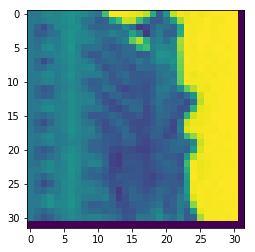

___


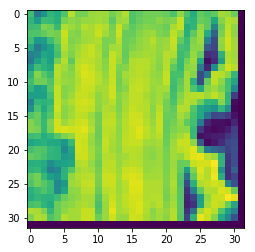

___


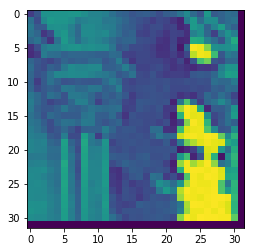

___


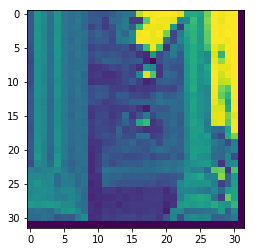

___


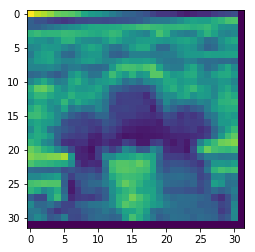

___


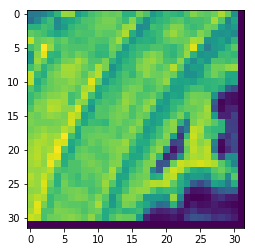

___


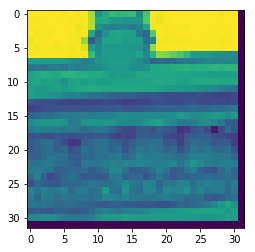

___


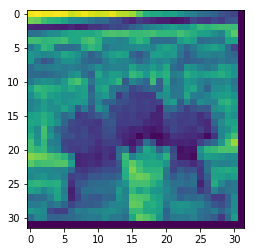

___


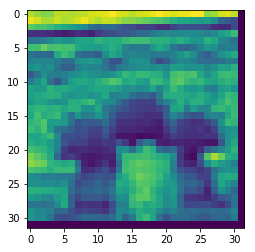

___


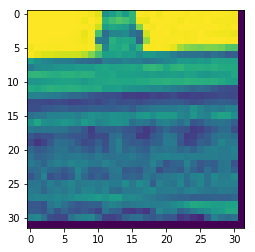

___


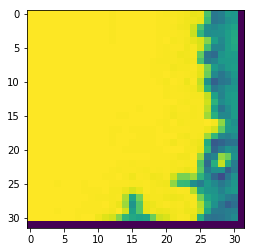

___


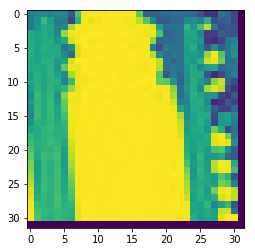

___


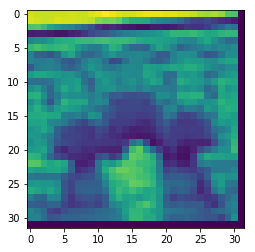

___


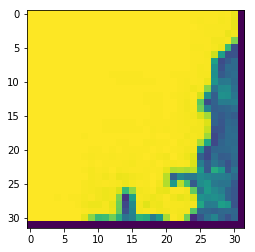

___


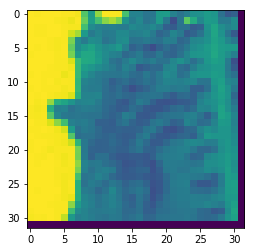

___


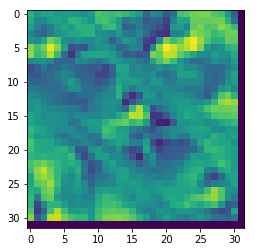

___


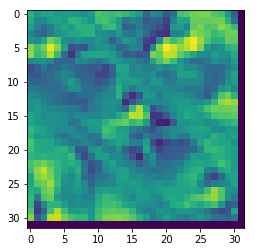

___


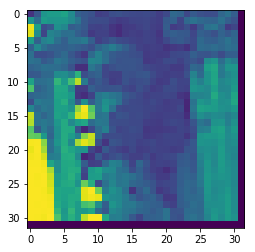

___


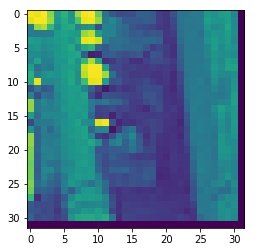

___


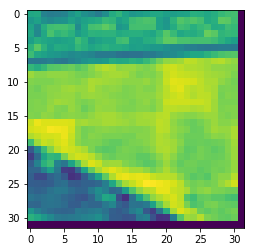

___


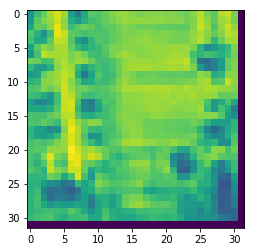

___


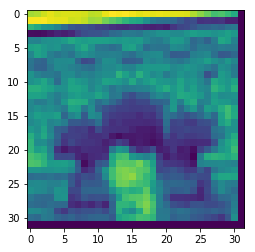

___


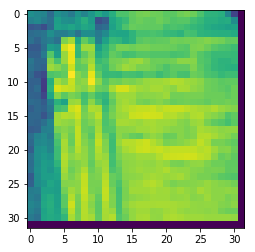

___


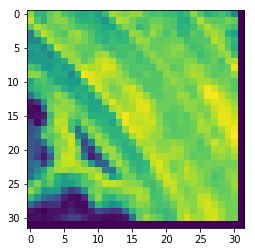

___


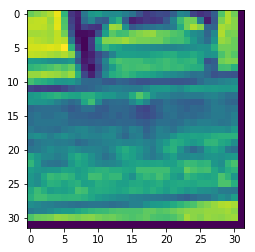

___


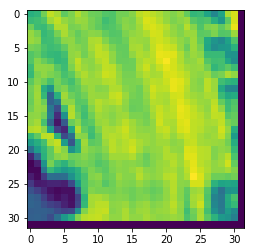

___


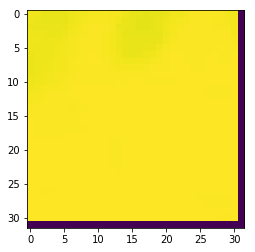

___


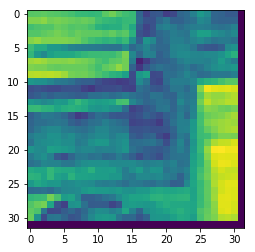

___


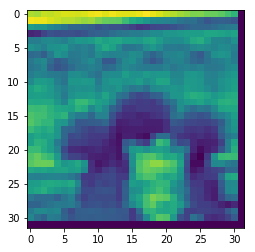

___


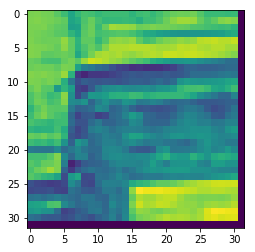

___


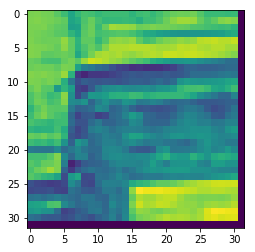

___


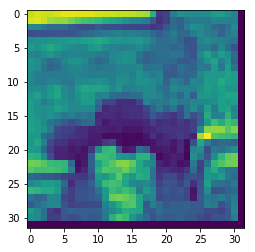

___


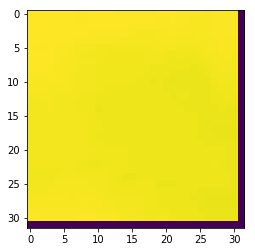

___


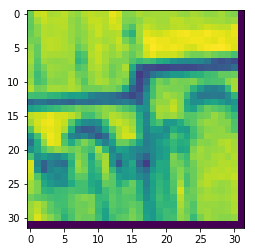

___


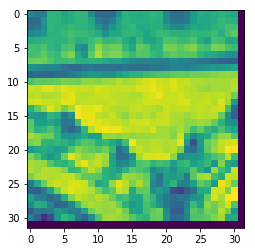

___


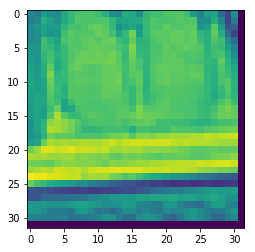

___


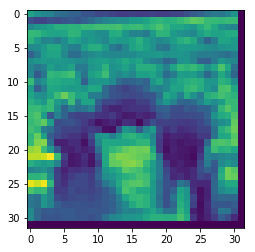

___


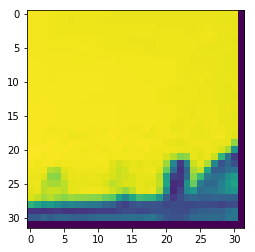

___


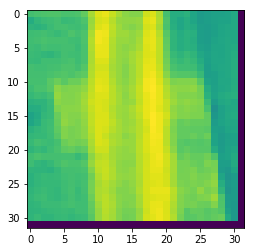

___


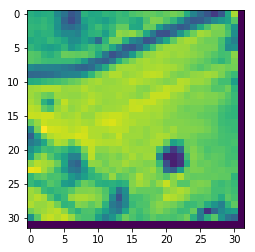

___


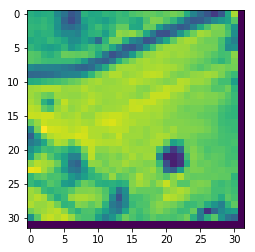

___


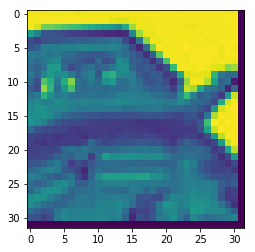

___


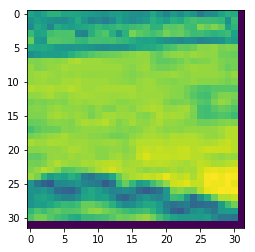

___


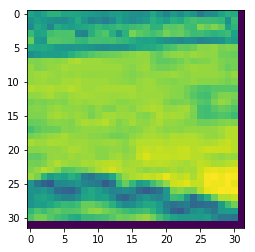

___


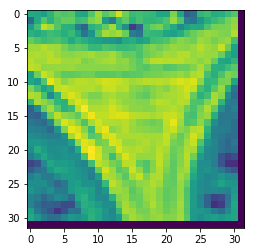

___


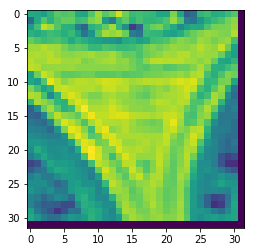

___


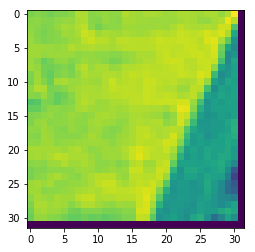

___


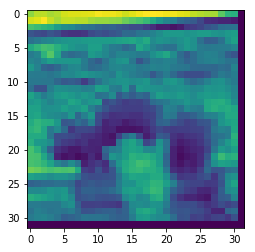

___


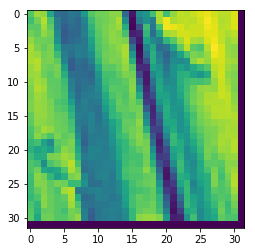

___


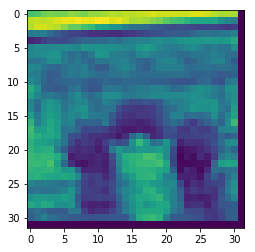

___


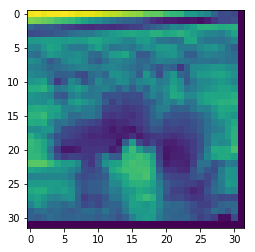

___


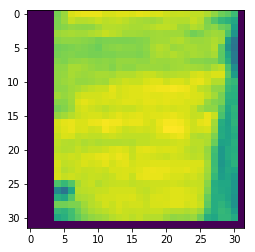

___


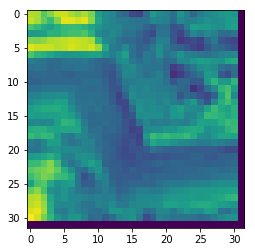

___


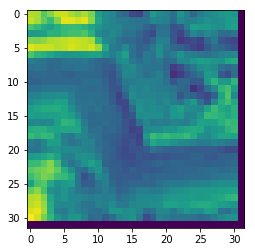

___


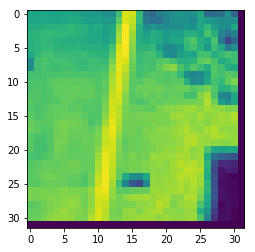

___


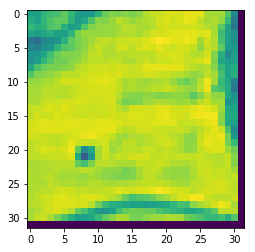

___


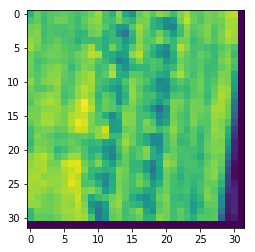

___


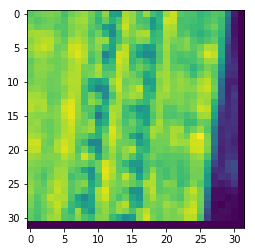

___


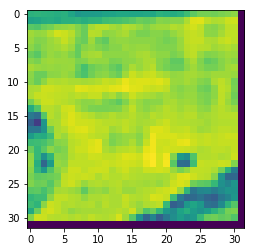

___


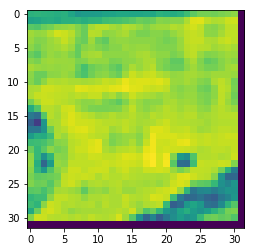

___


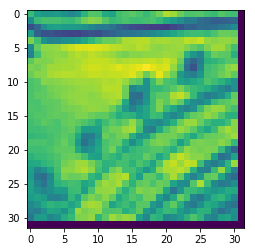

___


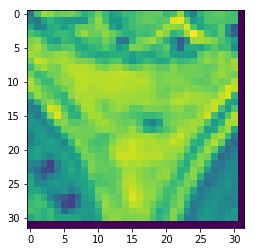

___


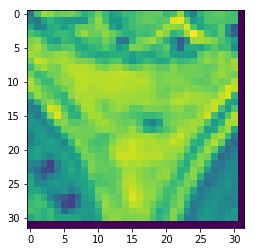

___


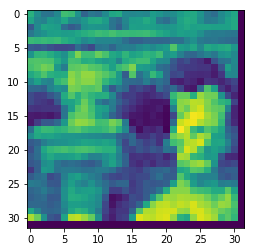

___


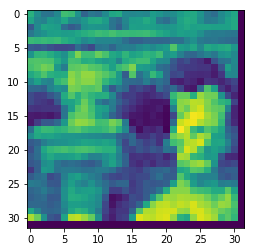

___


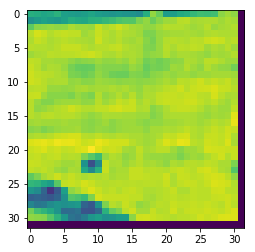

___


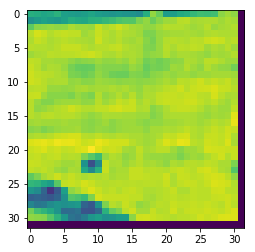

___


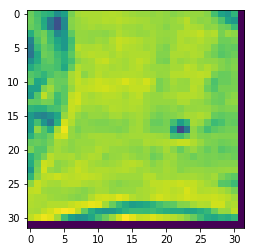

___


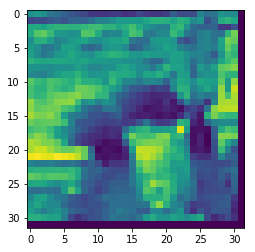

___


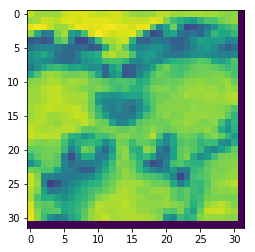

___


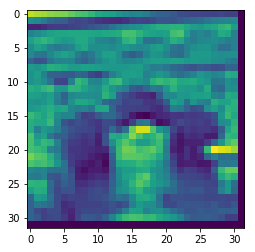

___


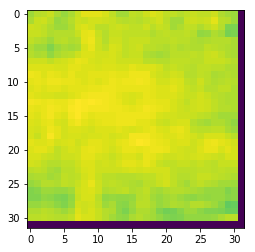

___


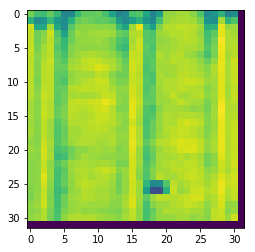

___


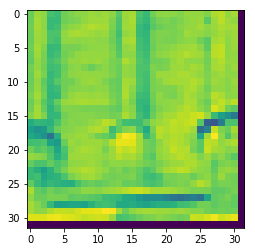

___


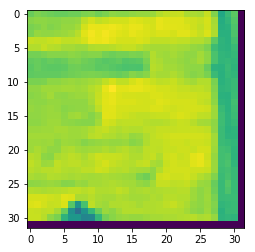

___


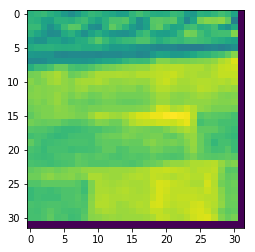

___


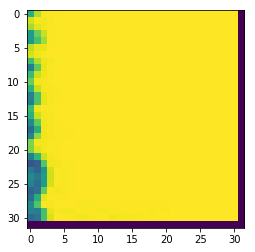

___


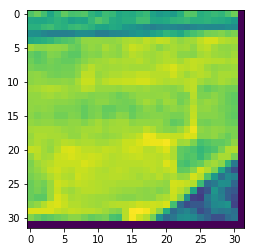

___


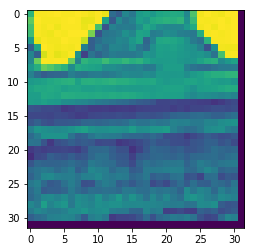

___


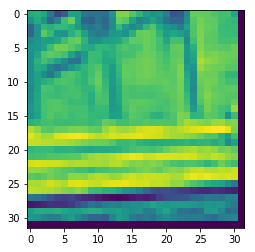

___


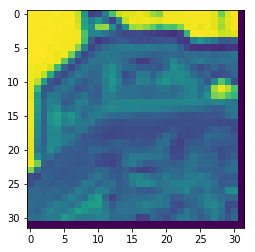

___


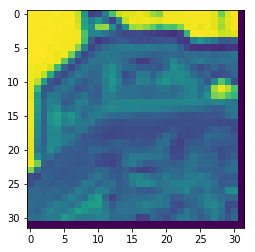

___


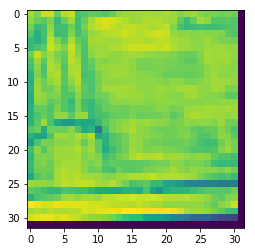

___


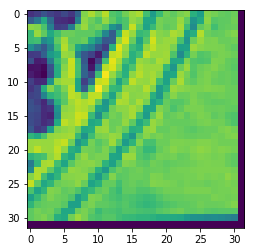

___


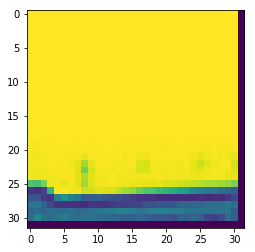

___


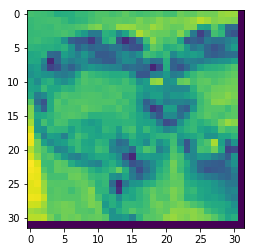

___


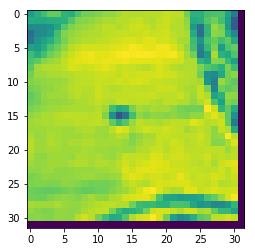

___


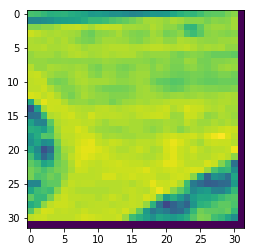

___


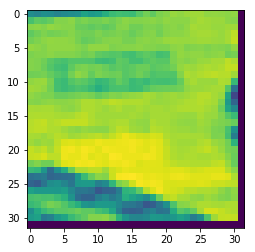

___


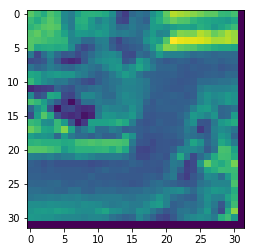

___


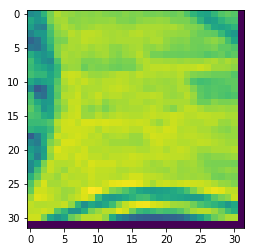

___


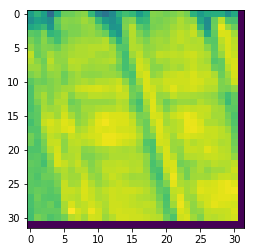

___


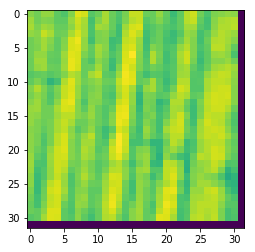

___


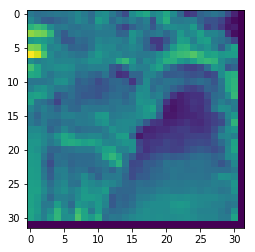

___


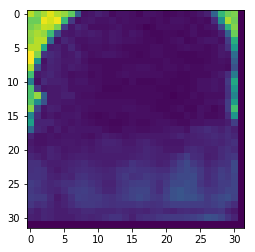

___


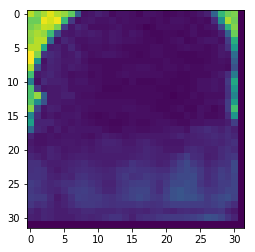

___


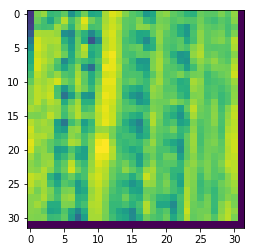

___


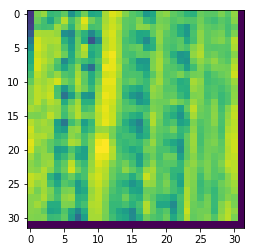

___


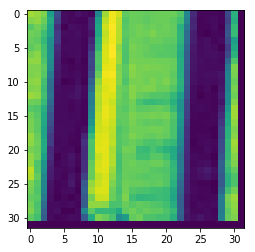

___


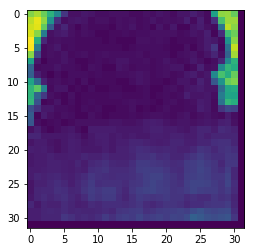

___


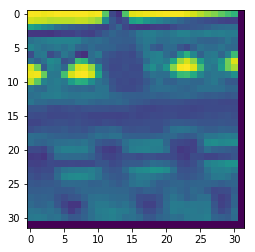

___


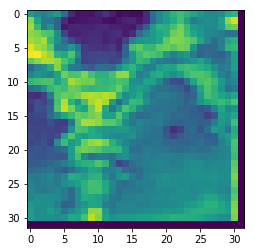

___


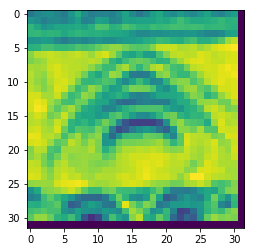

___


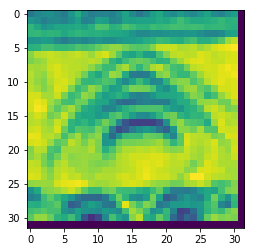

___


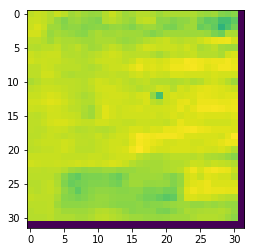

___


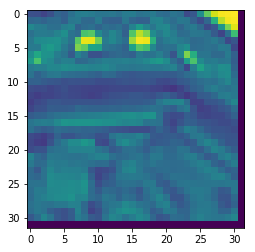

___


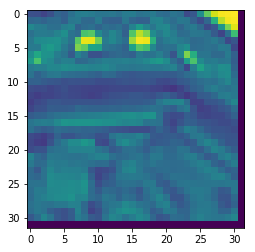

___


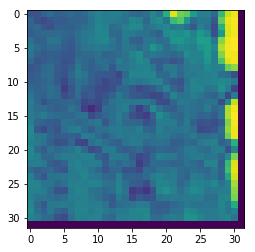

___


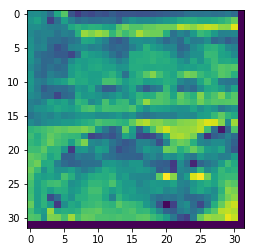

___


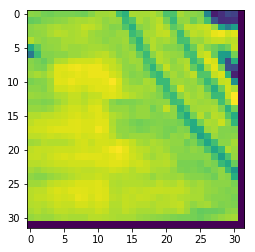

___


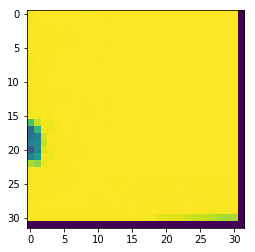

___


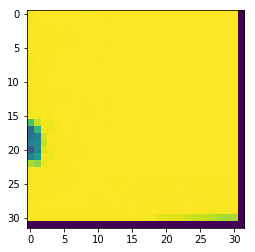

___


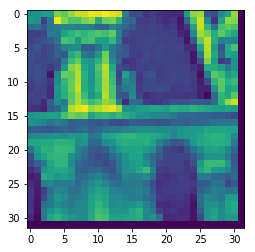

___


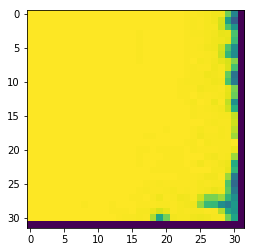

___


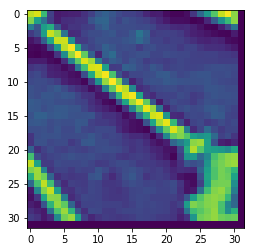

___


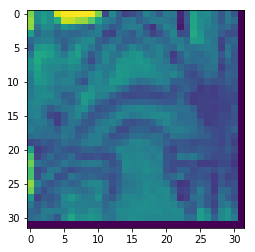

___


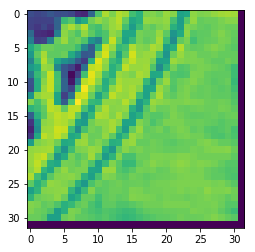

___


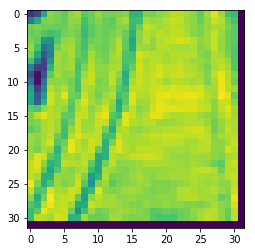

___


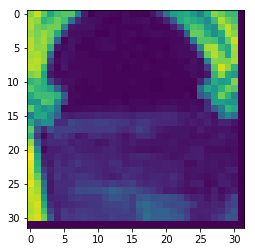

___


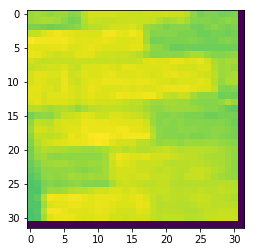

___


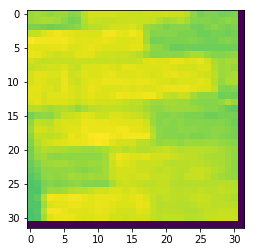

___


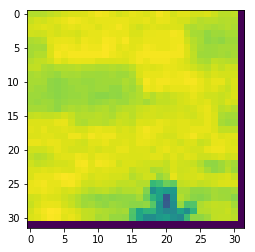

___


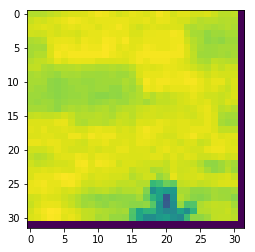

___


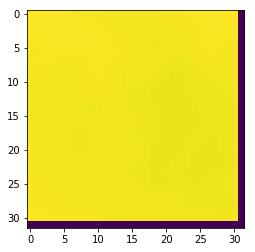

___


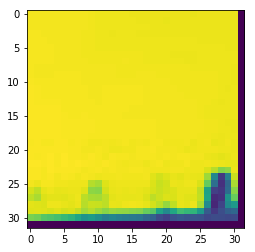

___


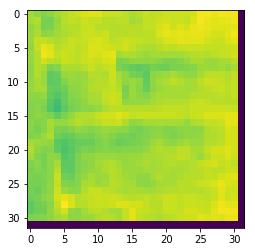

___


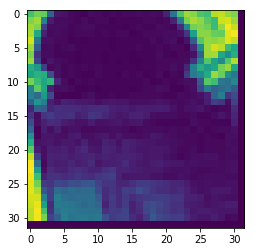

___


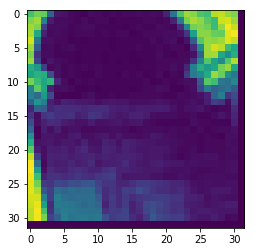

___


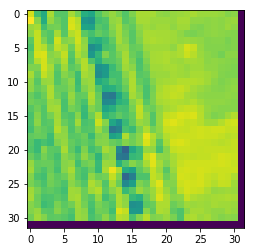

___


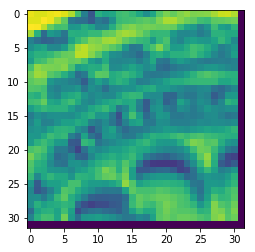

___


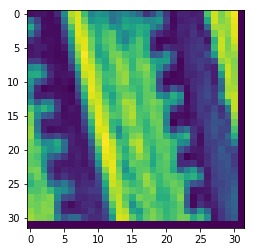

___


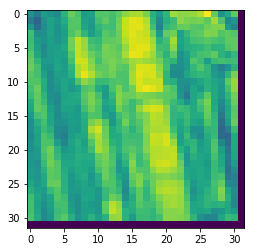

___


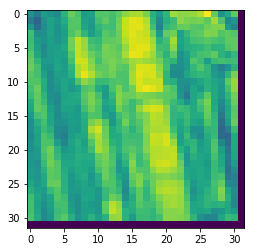

___


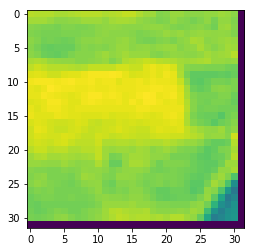

___


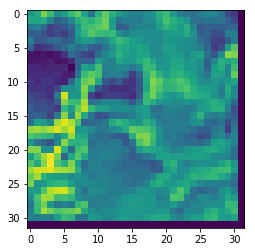

___


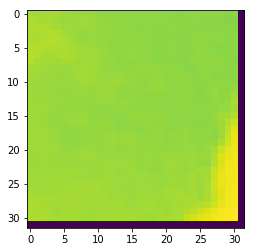

___


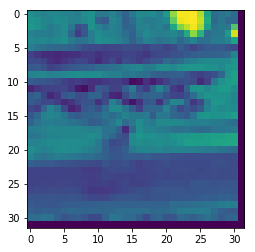

___


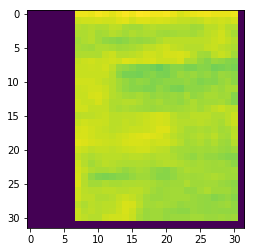

___


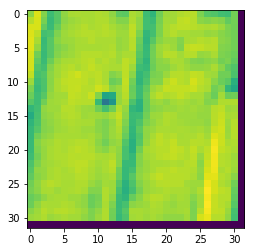

___


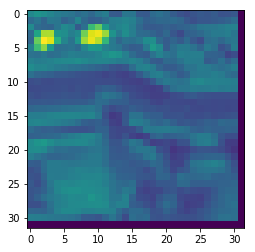

___


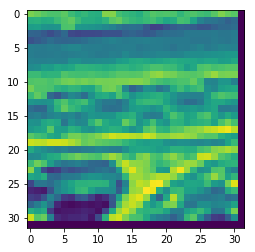

___


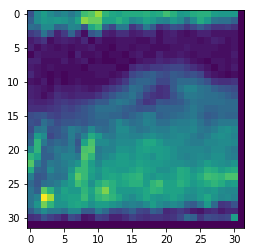

___


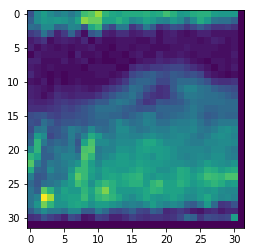

___


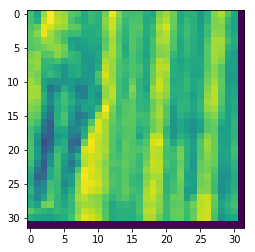

___


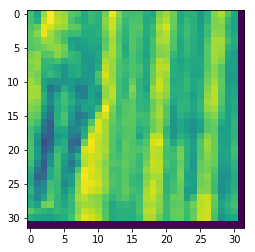

___


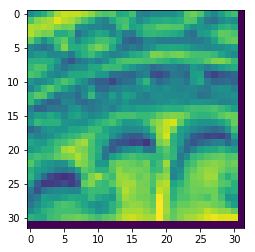

___


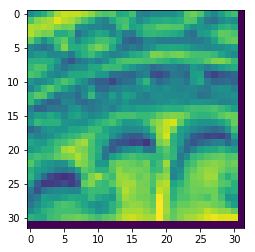

___


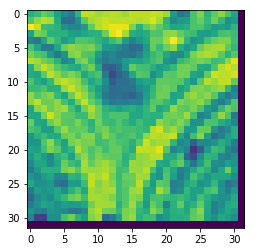

___


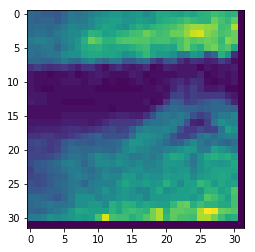

___


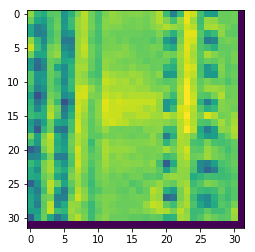

___


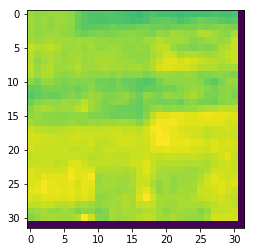

___


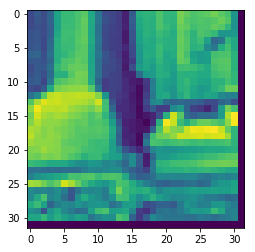

___


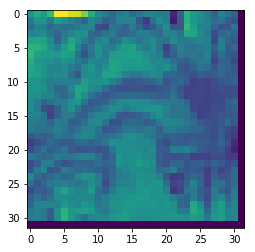

___


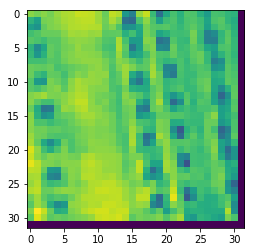

___


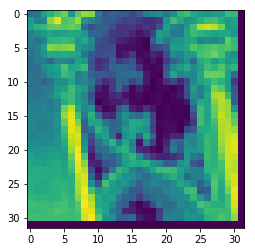

___


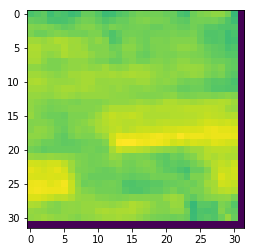

___


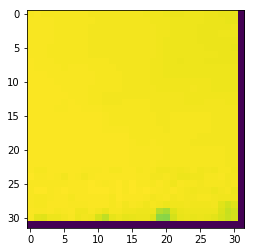

___


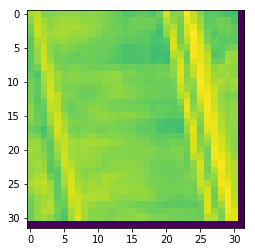

___


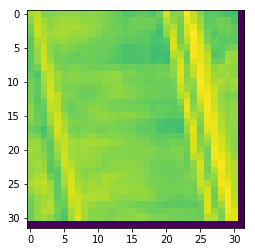

___


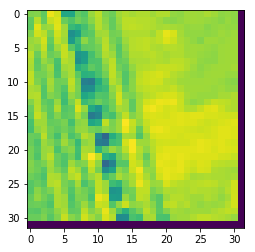

___


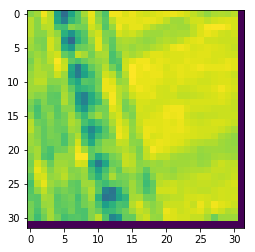

___


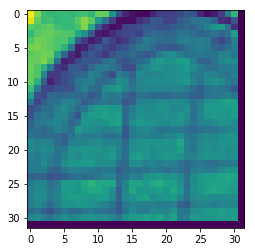

___


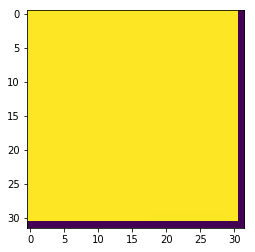

___


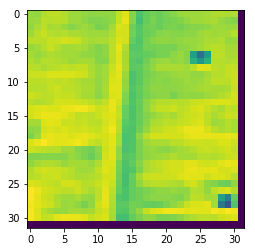

___


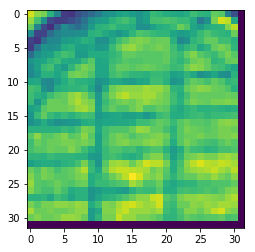

___


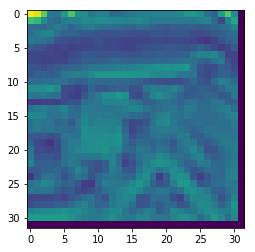

___


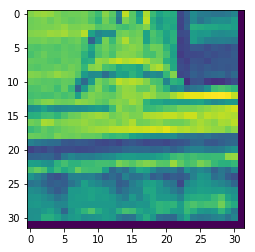

___


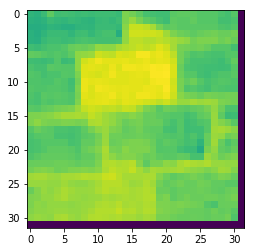

___


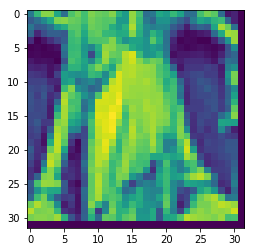

___


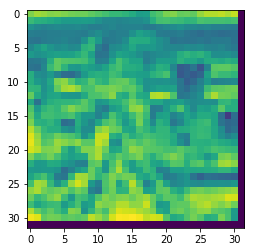

___


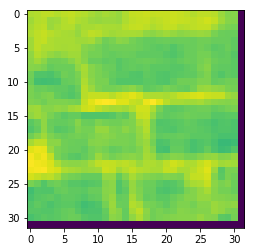

___


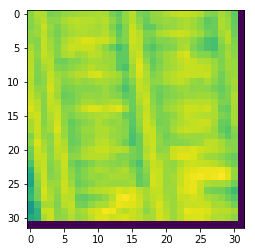

___


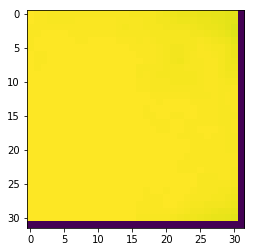

___


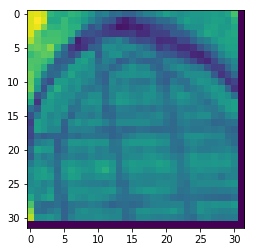

___


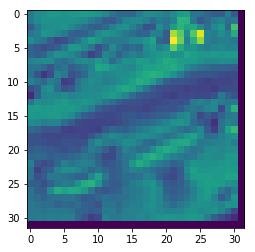

___


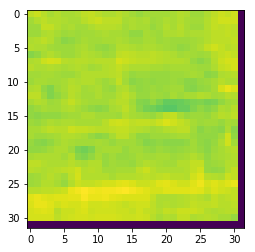

___


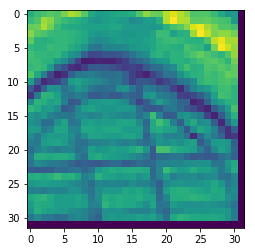

___


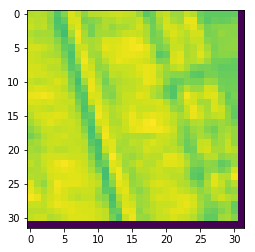

___


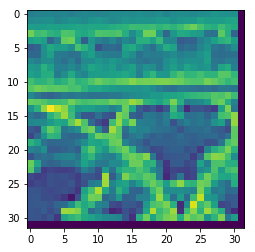

___


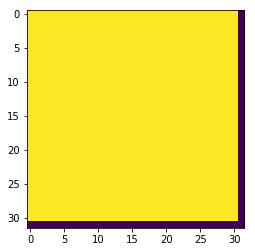

___


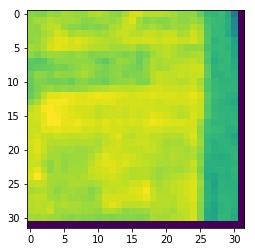

___


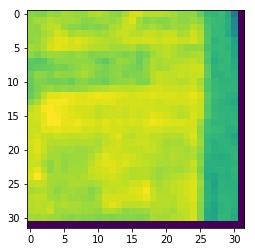

___


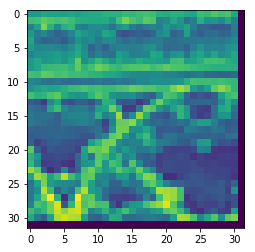

___


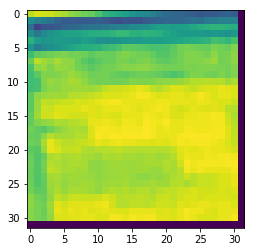

___


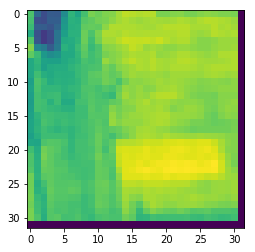

___


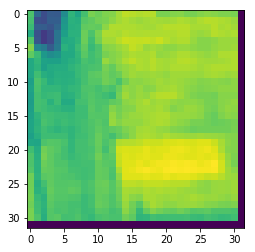

___


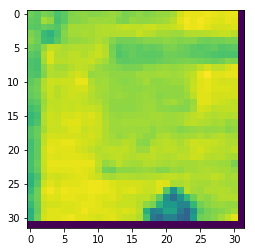

___


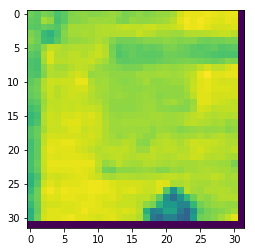

___


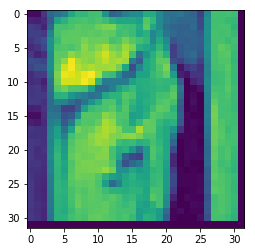

___


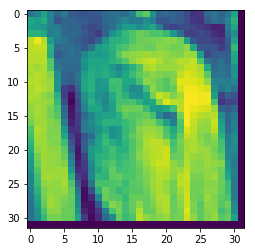

___


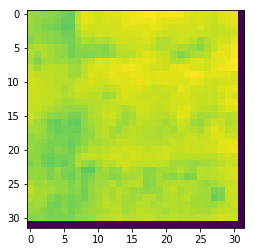

___


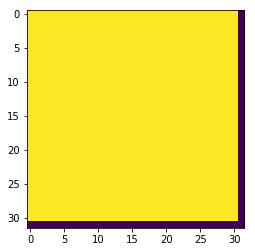

___


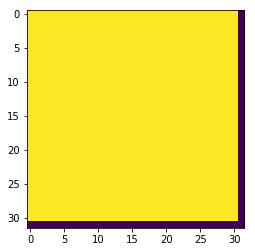

___


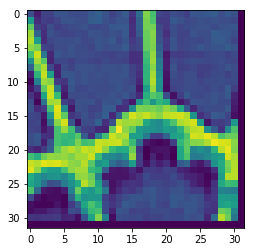

___


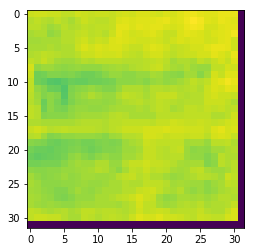

___


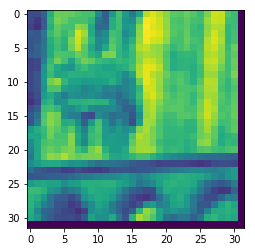

___


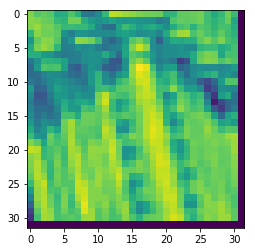

___


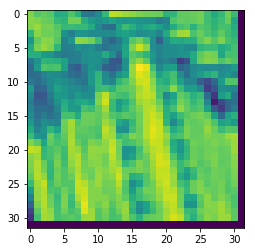

___


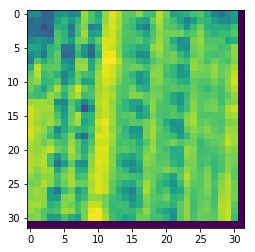

___


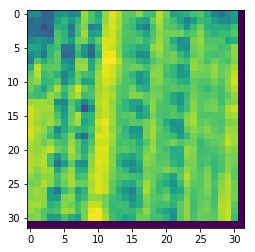

___
_________


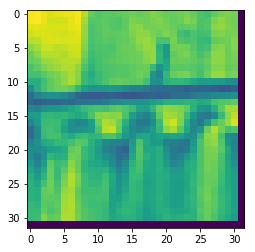

___


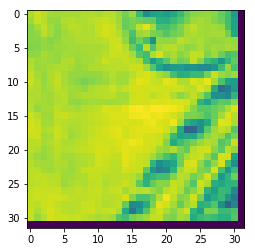

___


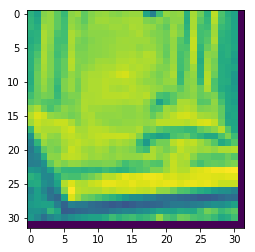

___


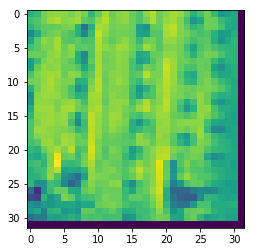

___


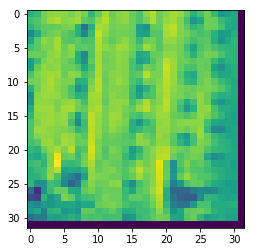

___


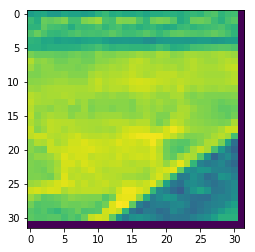

___


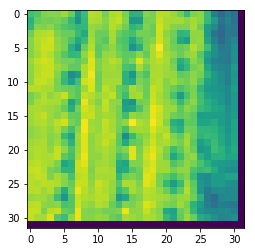

___


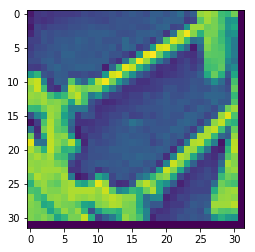

___


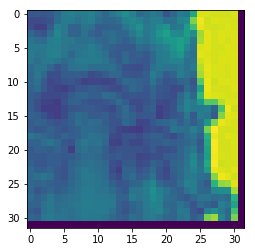

___


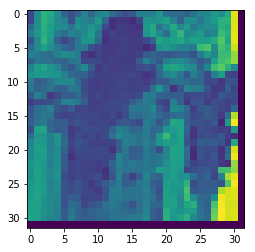

___


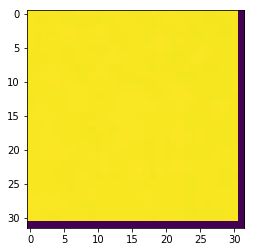

___


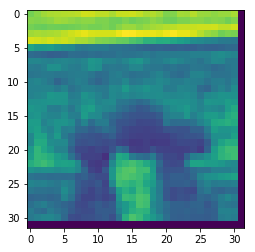

___


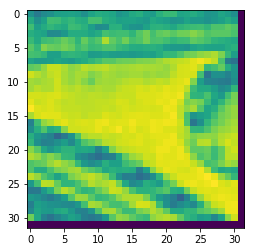

___


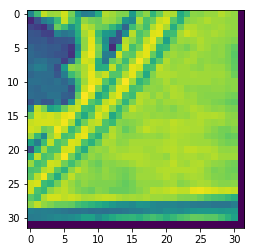

___


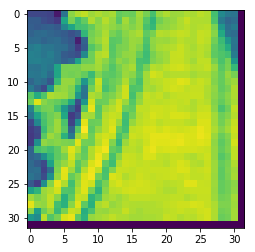

___


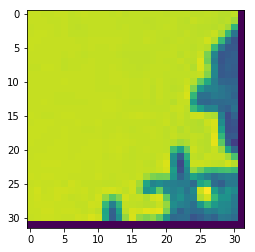

___


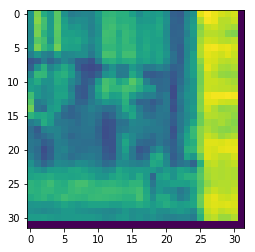

___


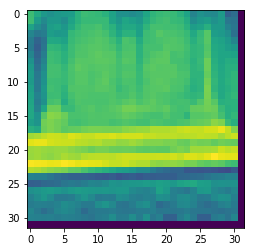

___


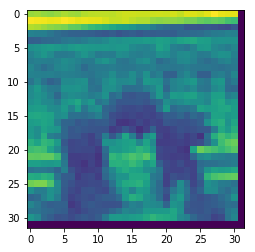

___


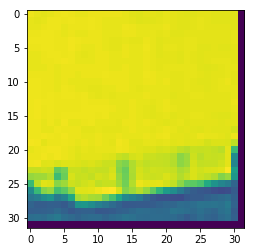

___


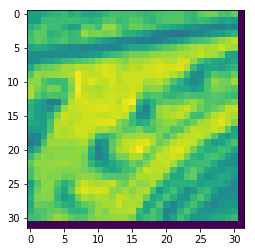

___


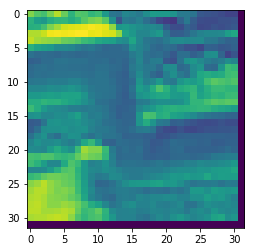

___


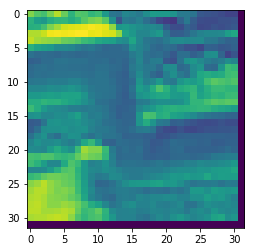

___


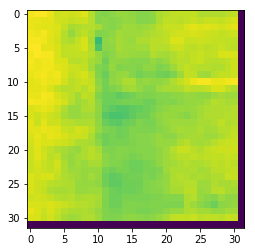

___


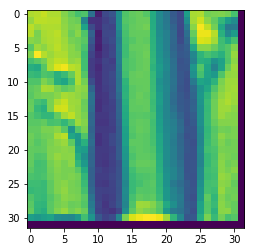

___


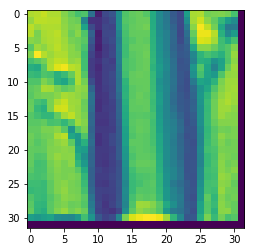

___


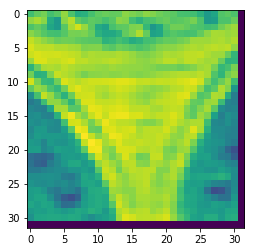

___


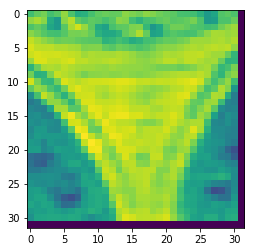

___


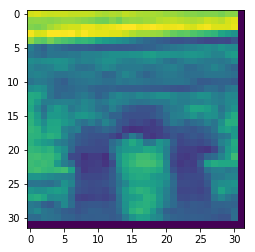

___


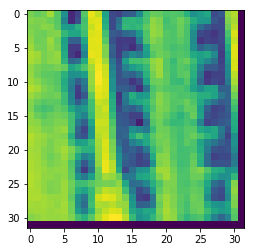

___


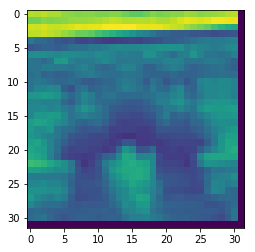

___


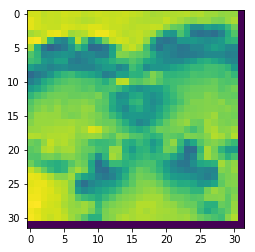

___


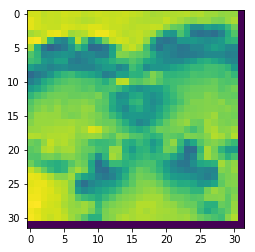

___


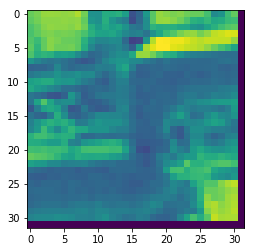

___


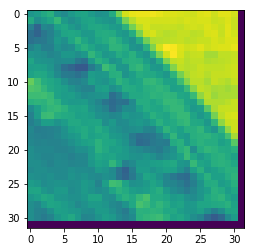

___


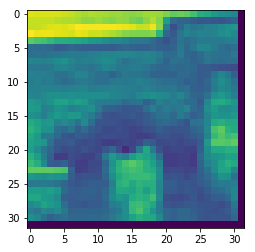

___


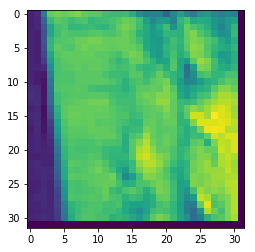

___


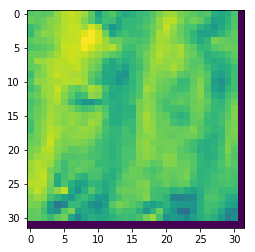

___


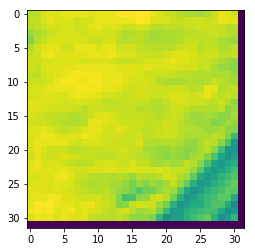

___


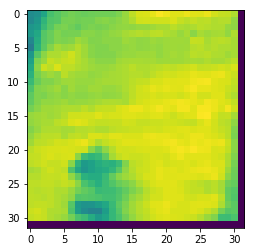

___


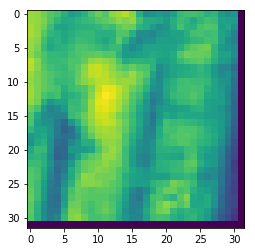

___


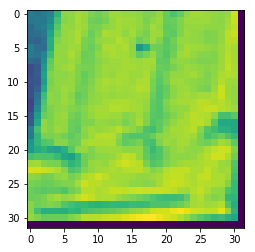

___


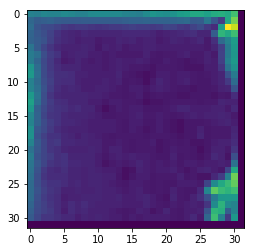

___


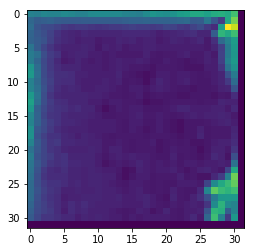

___


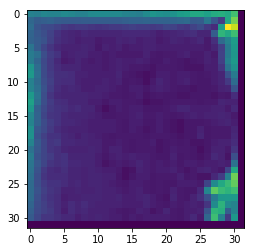

___


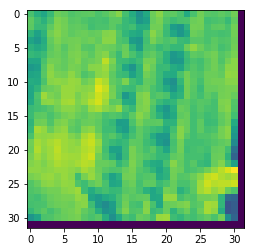

___


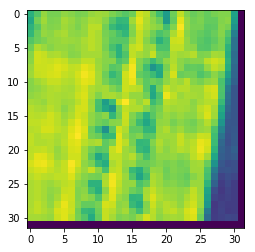

___


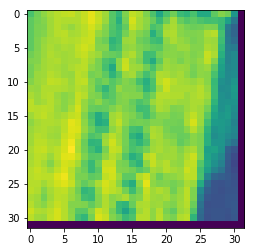

___


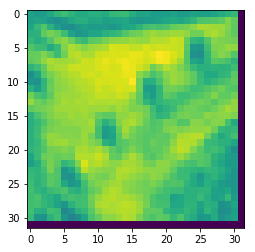

___


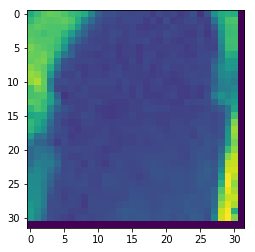

___


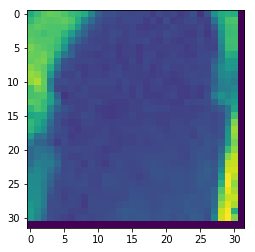

___


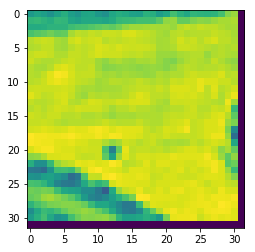

___


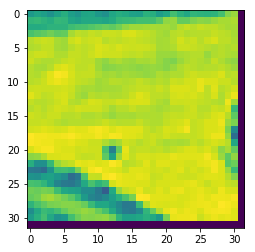

___


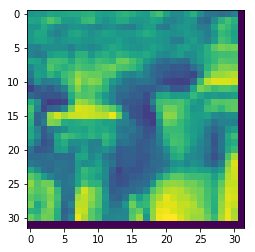

___


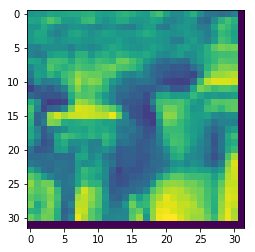

___


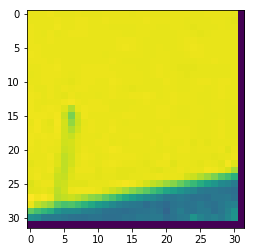

___


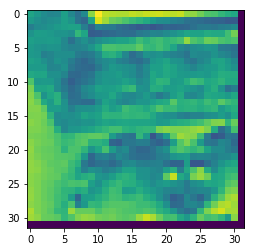

___


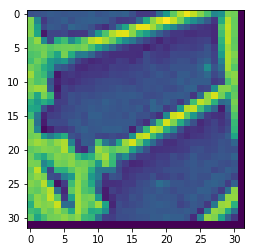

___


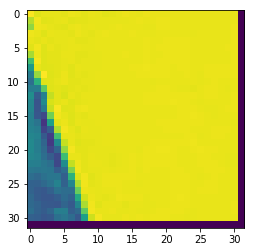

___


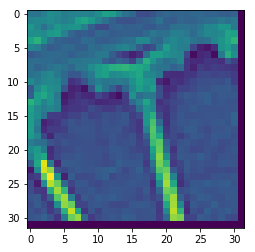

___


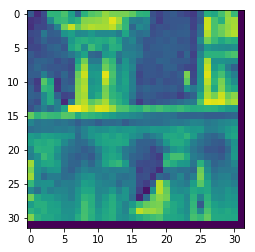

___


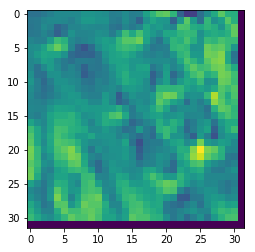

___


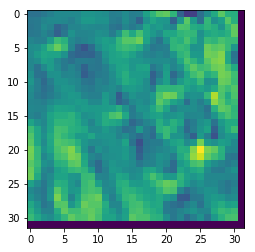

___


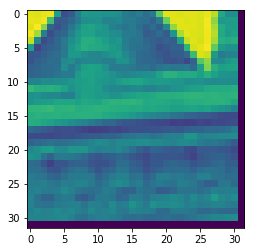

___


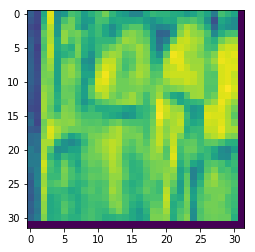

___


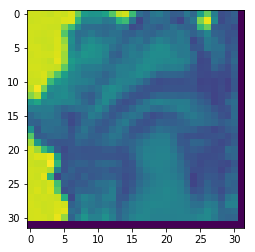

___


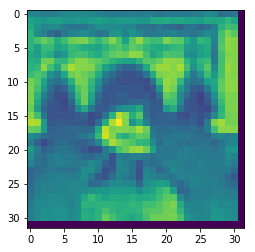

___


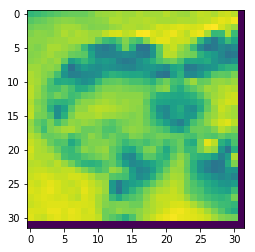

___


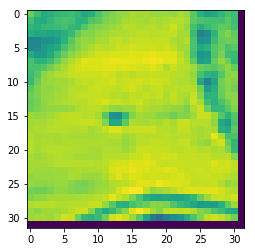

___


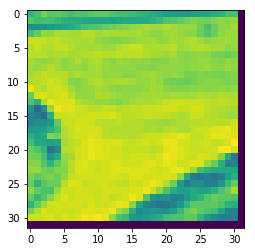

___


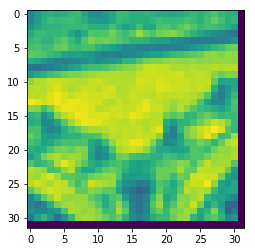

___


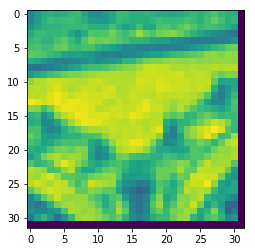

___


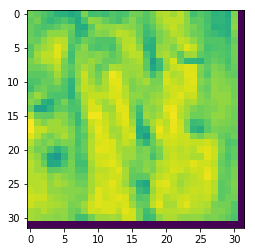

___


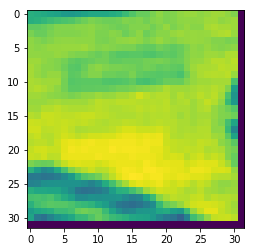

___


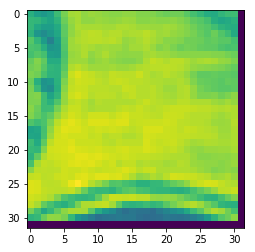

___


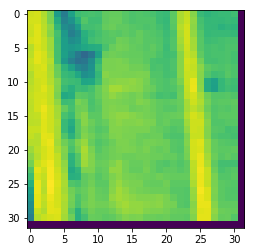

___


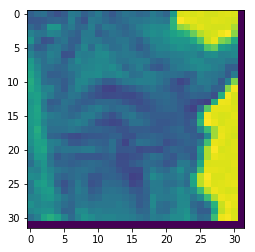

___


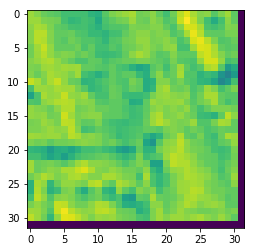

___


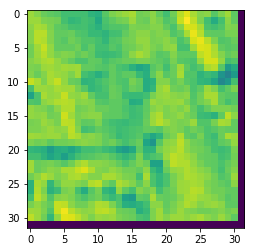

___


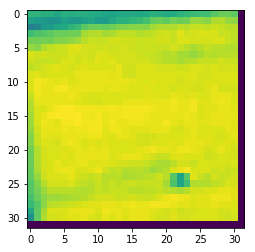

___


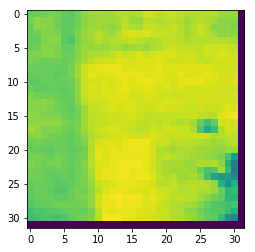

___


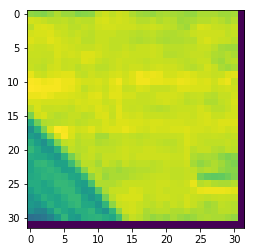

___


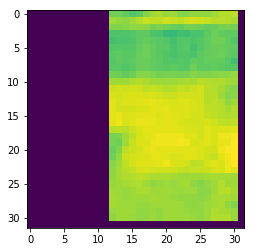

___


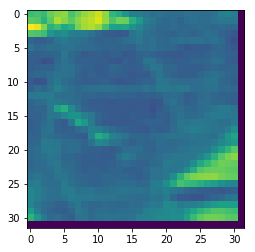

___


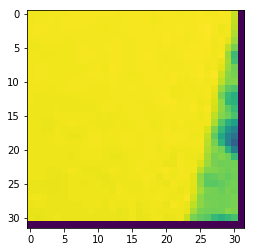

___


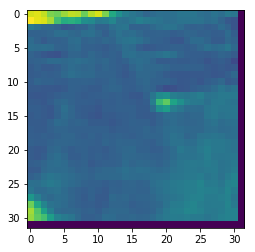

___


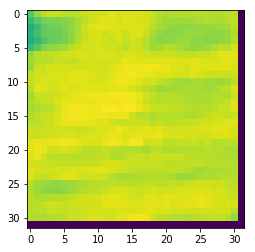

___


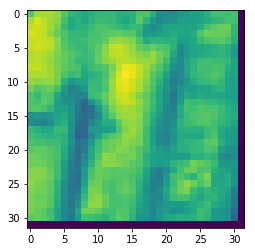

___


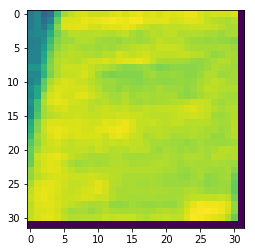

___


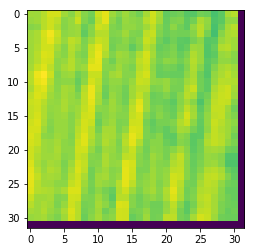

___


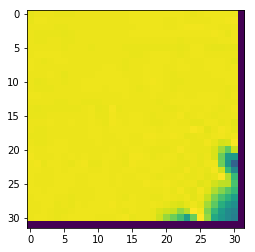

___


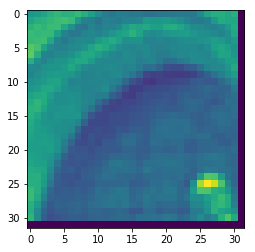

___


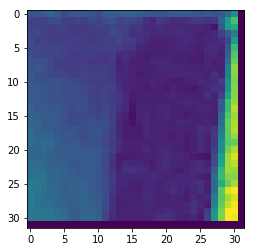

___


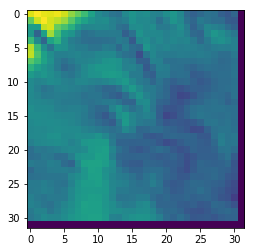

___


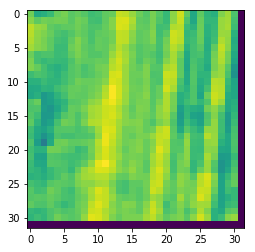

___


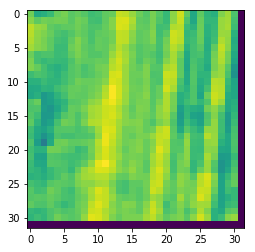

___


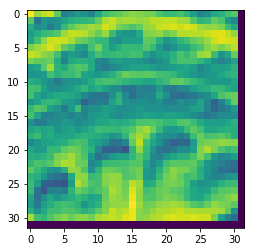

___


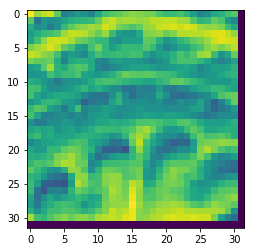

___


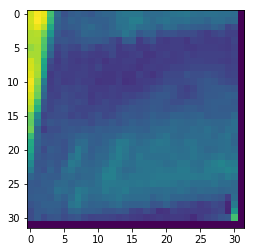

___


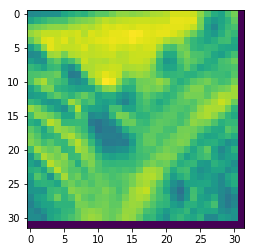

___


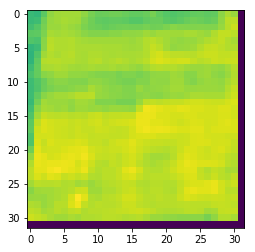

___


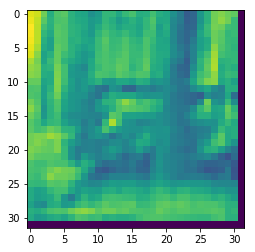

___


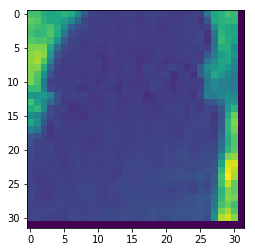

___


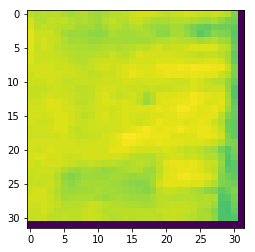

___


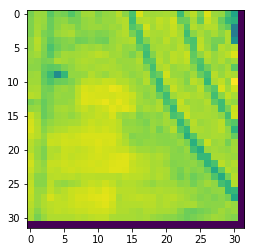

___


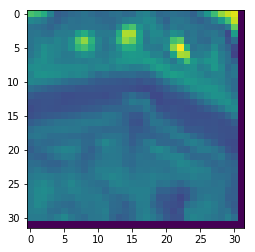

___


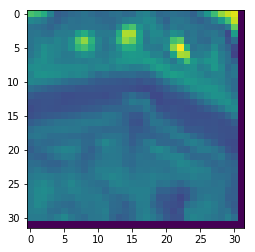

___


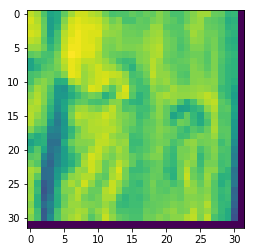

___


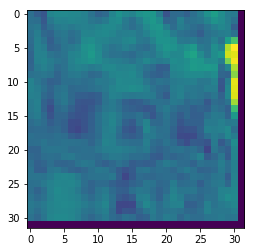

___


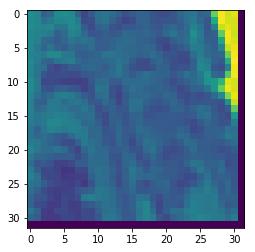

___


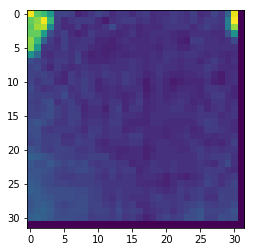

___


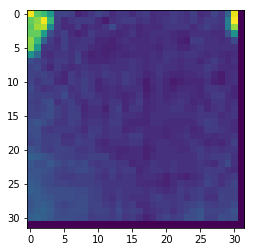

___


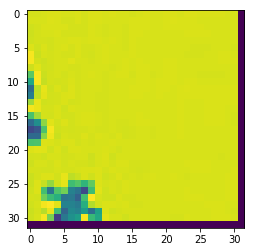

___


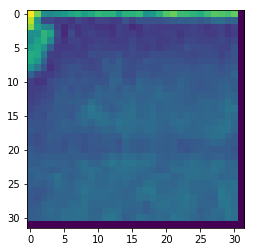

___


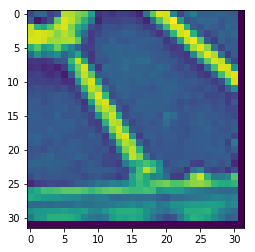

___


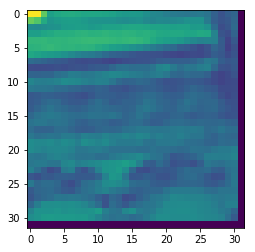

___


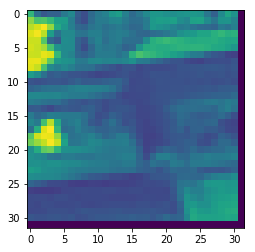

___


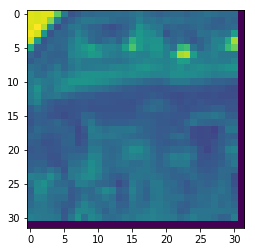

___


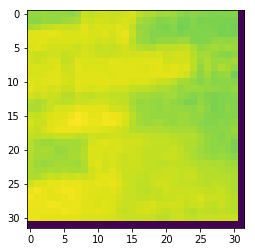

___


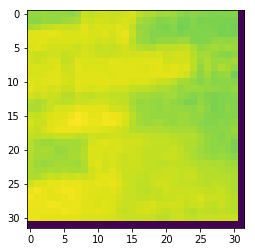

___


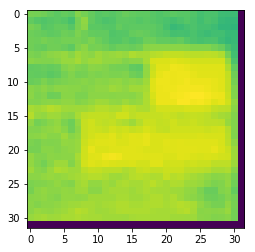

___


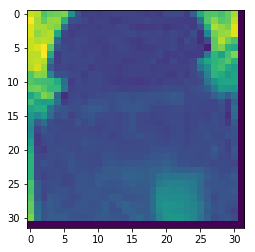

___


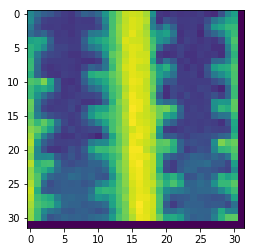

___


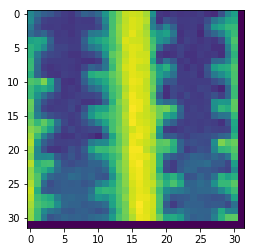

___


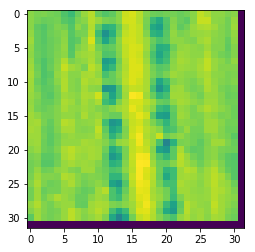

___


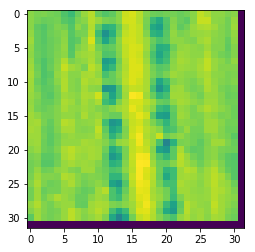

___


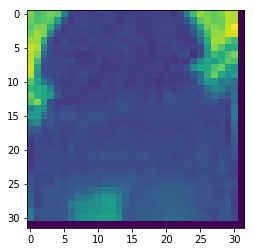

___


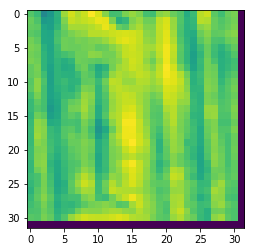

___


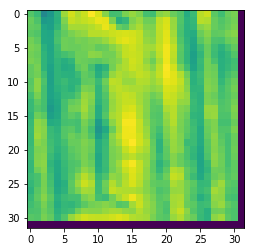

___


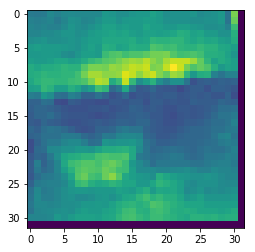

___


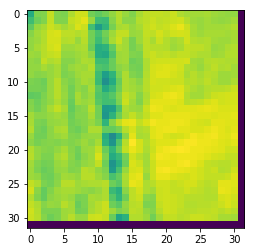

___


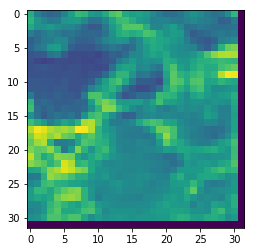

___


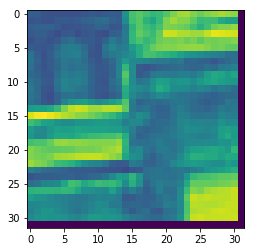

___


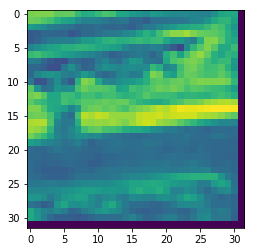

___


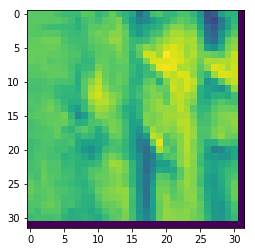

___


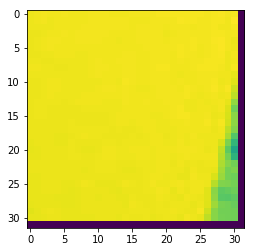

___


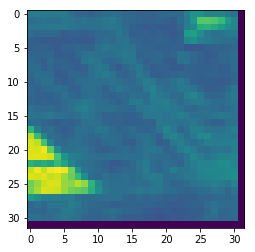

___


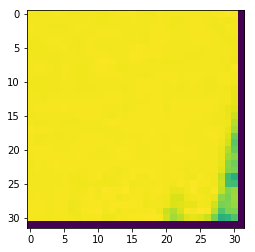

___


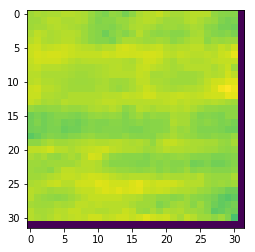

___


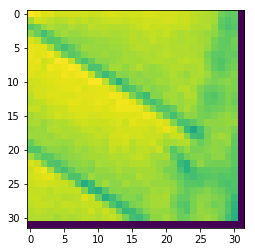

___


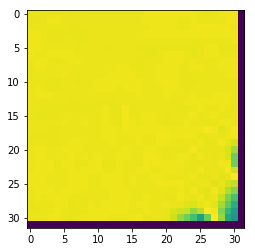

___


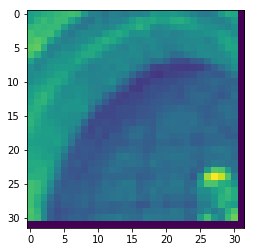

___


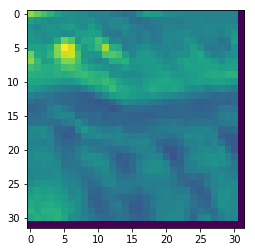

___


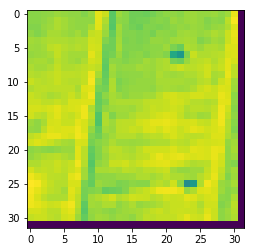

___


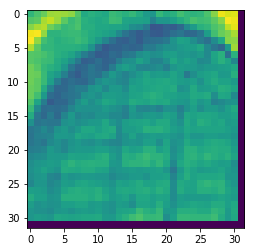

___


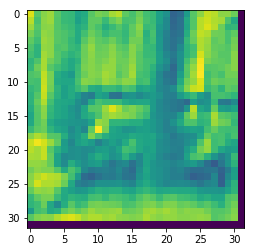

___


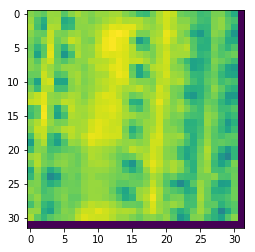

___


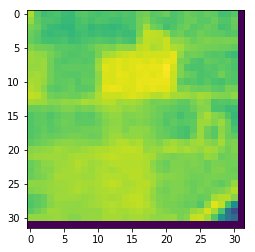

___


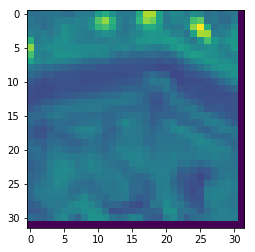

___


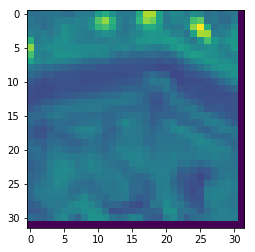

___


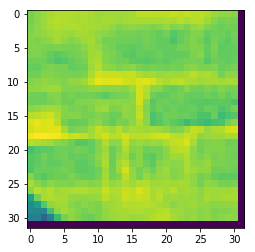

___


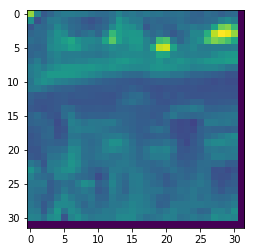

___


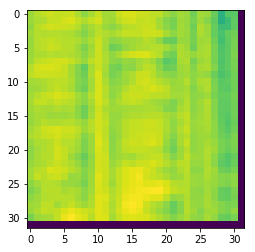

___


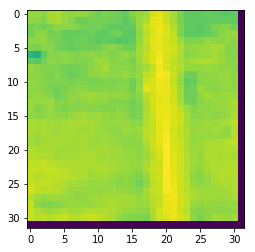

___


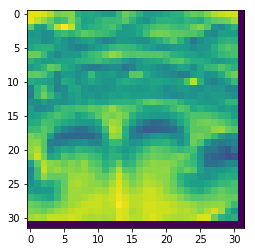

___


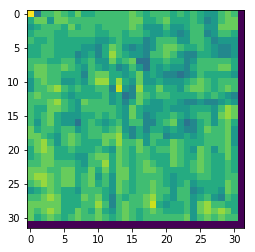

___


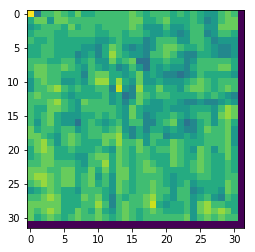

___


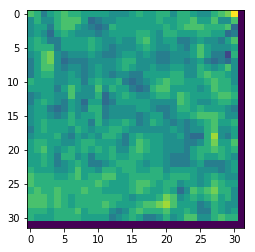

___


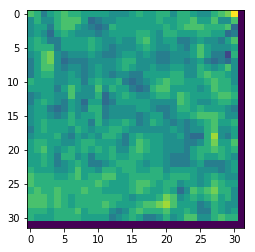

___


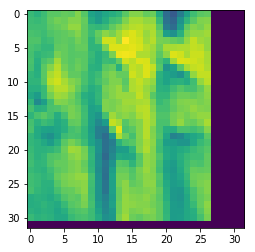

___


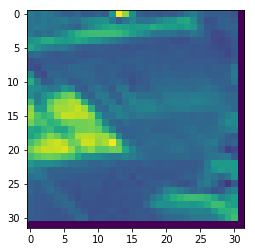

___


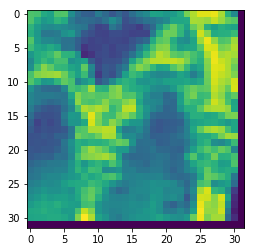

___


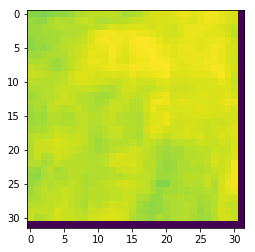

___


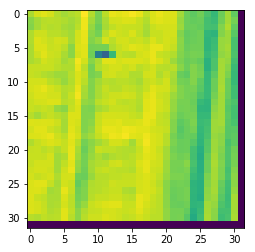

___


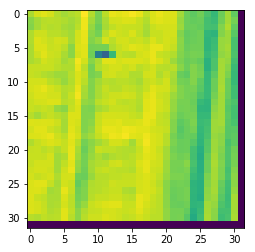

___


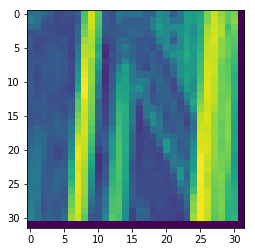

___


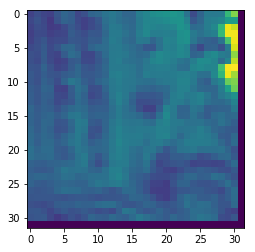

___


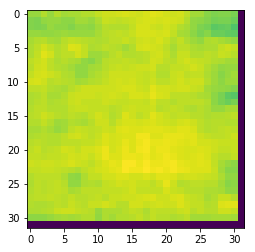

___


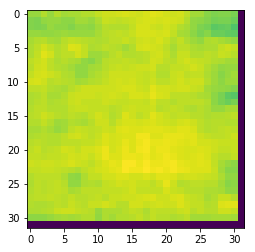

___


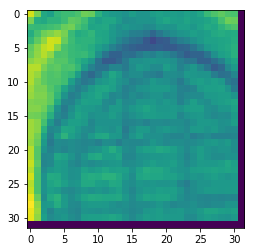

___


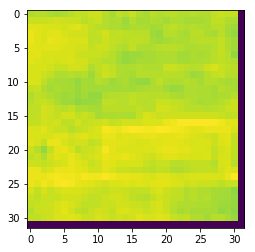

___


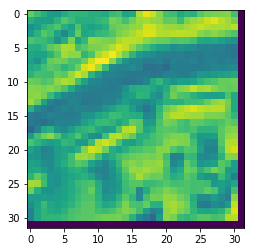

___


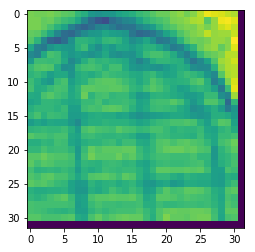

___


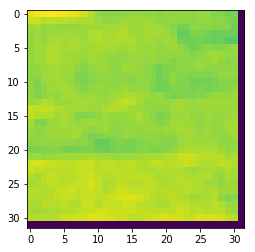

___


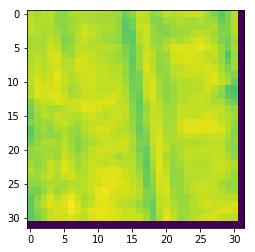

___


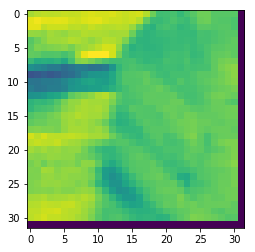

___


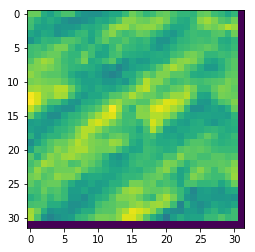

___


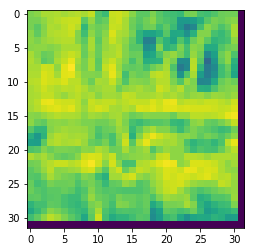

___


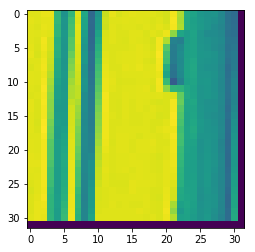

___


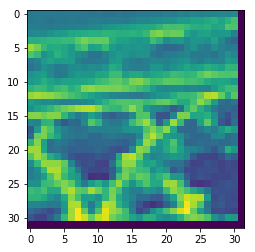

___


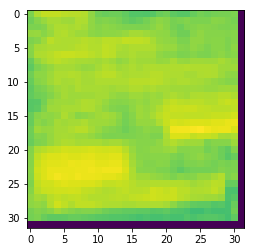

___


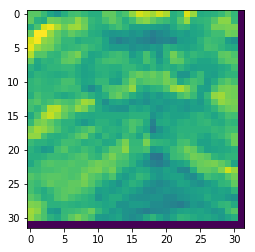

___


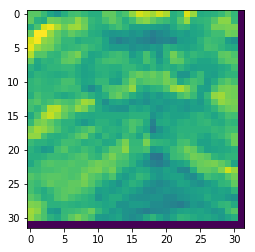

___


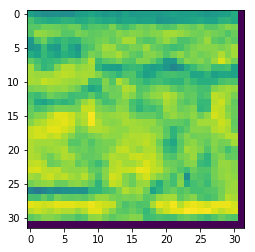

___


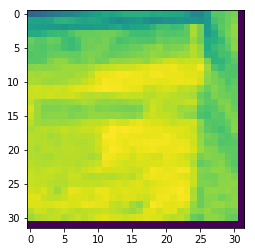

___


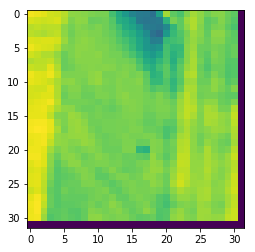

___


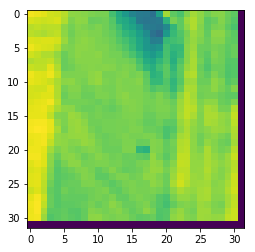

___


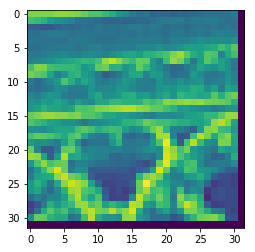

___


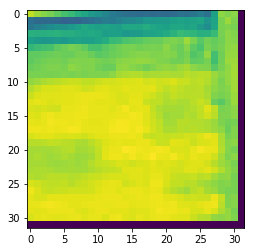

___


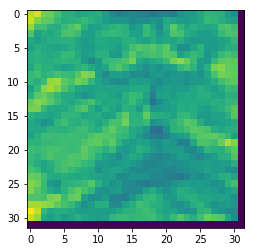

___


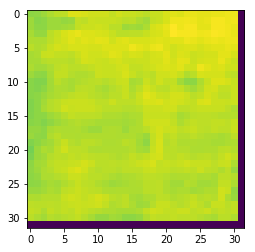

___


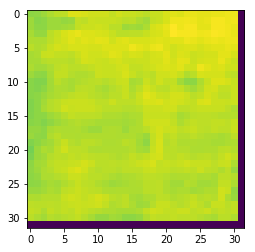

___


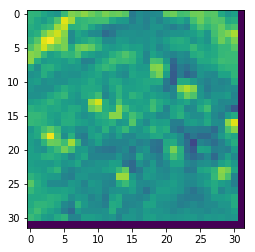

___


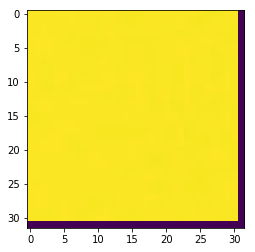

___


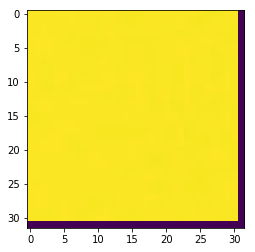

___


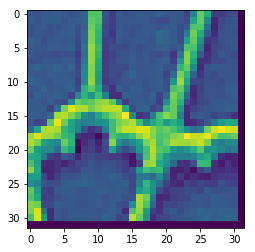

___


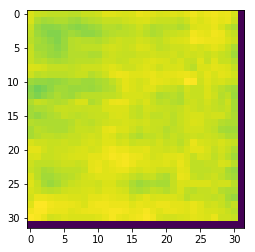

___


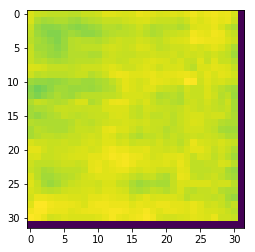

___


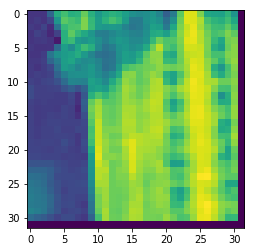

___


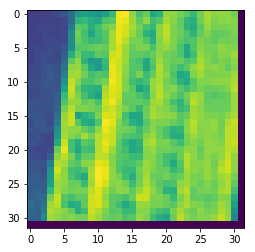

___
_________


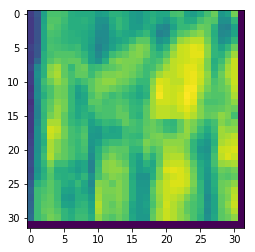

___


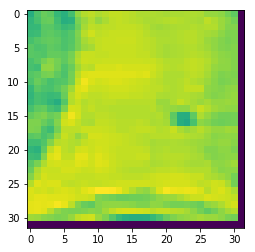

___


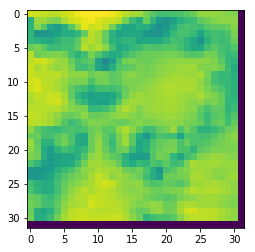

___


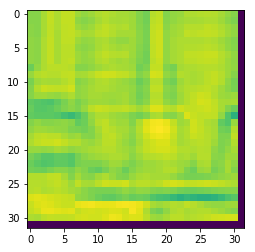

___


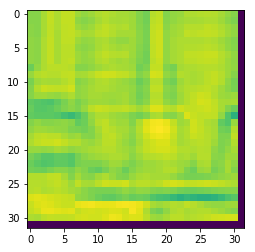

___


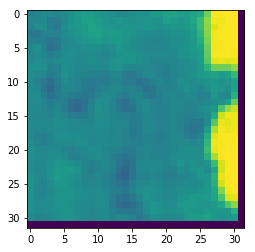

___


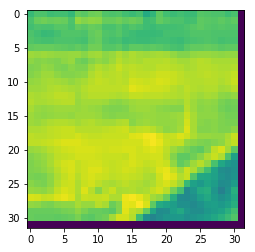

___


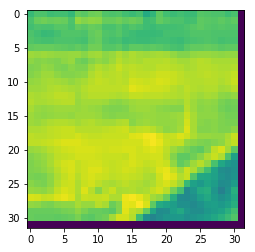

___


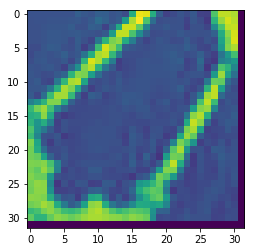

___


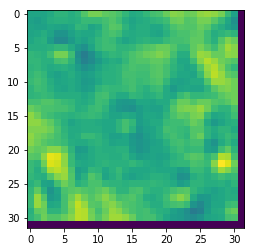

___


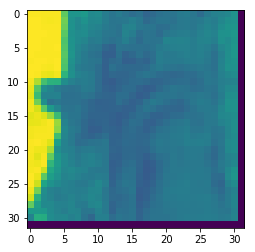

___


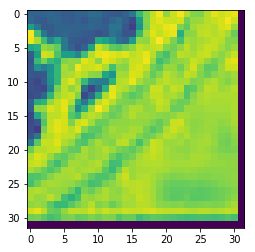

___


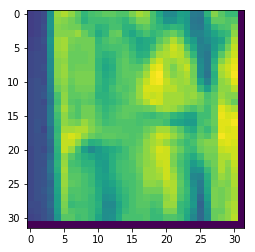

___


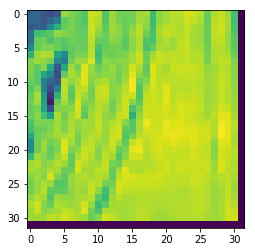

___


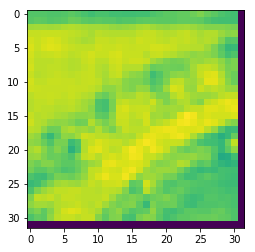

___


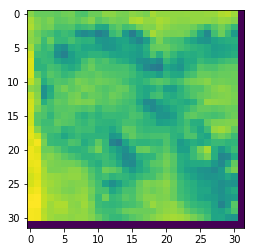

___


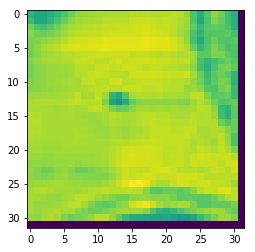

___


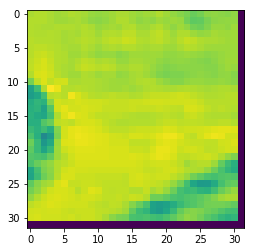

___


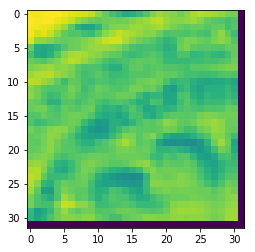

___


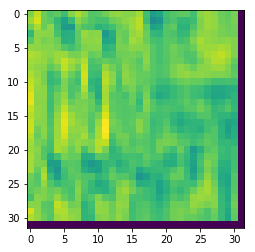

___


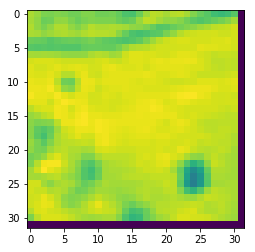

___


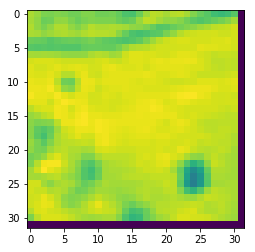

___


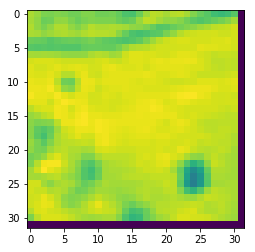

___


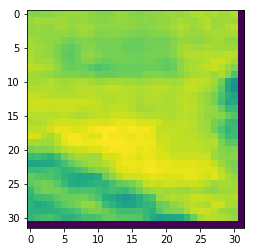

___


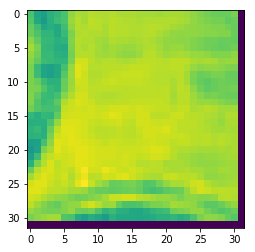

___


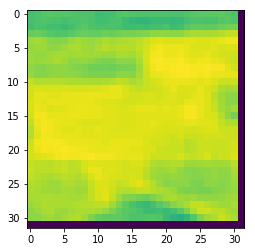

___


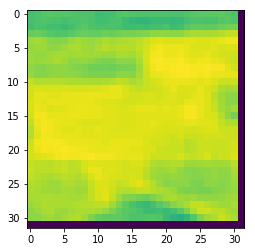

___


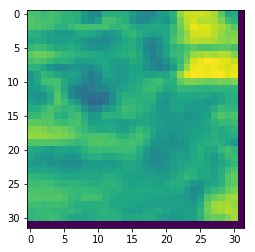

___


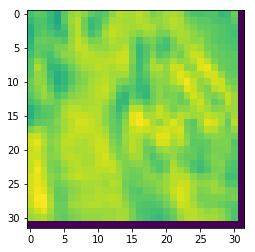

___


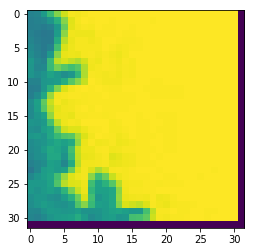

___


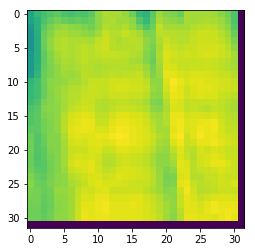

___


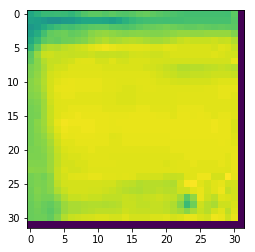

___


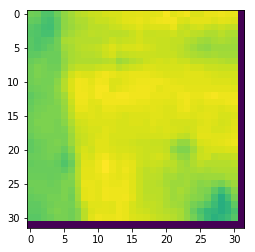

___


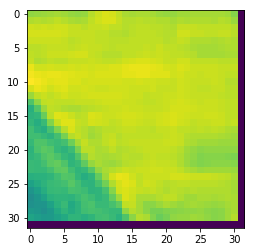

___


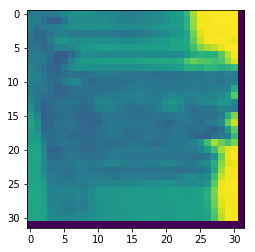

___


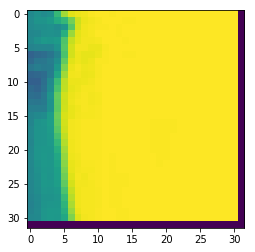

___


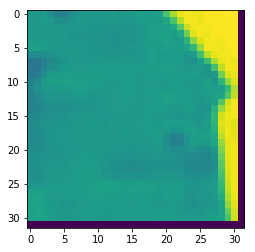

___


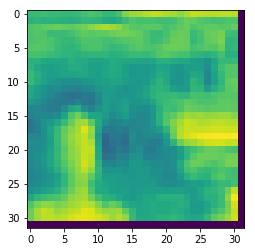

___


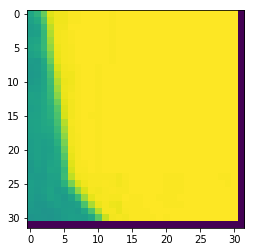

___


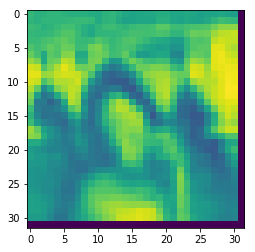

___


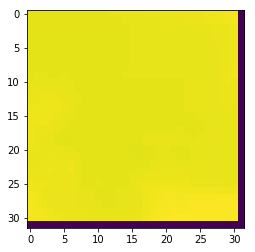

___


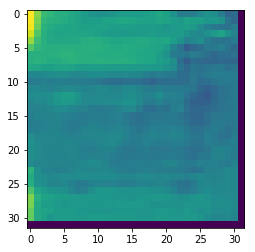

___


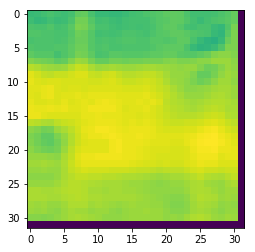

___


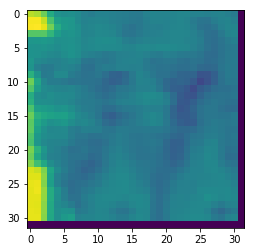

___


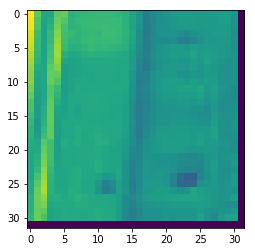

___


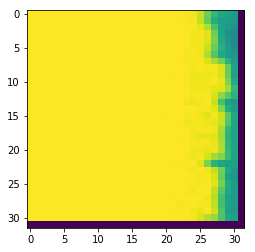

___


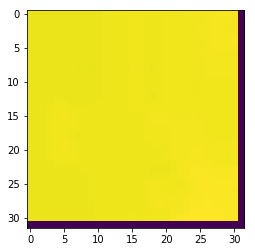

___


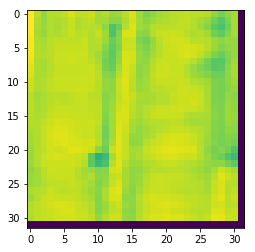

___


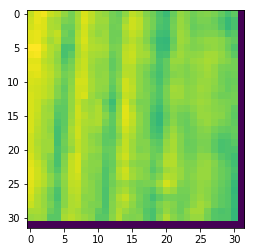

___


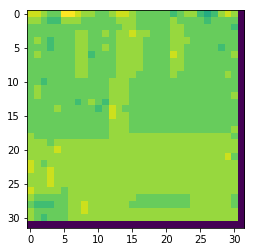

___


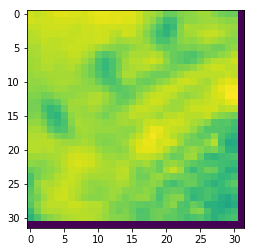

___


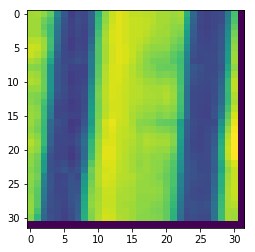

___


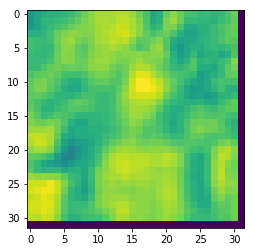

___


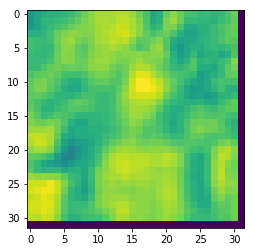

___


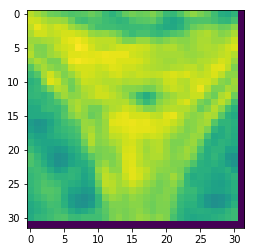

___


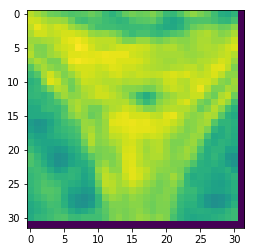

___


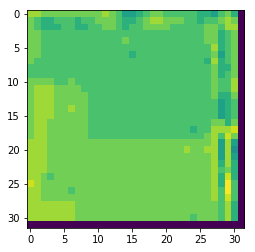

___


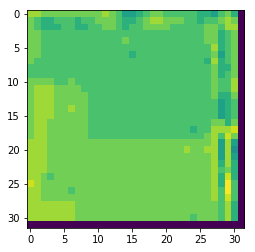

___


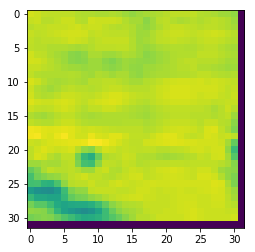

___


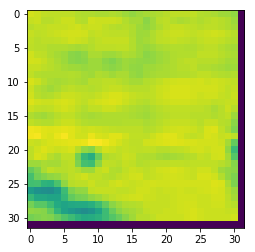

___


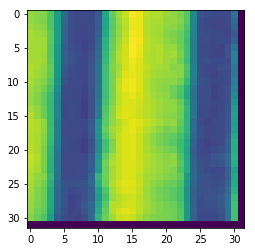

___


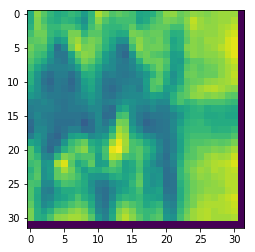

___


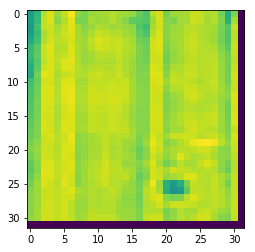

___


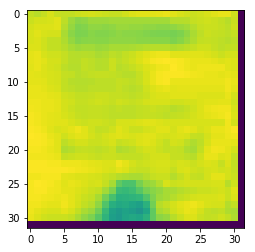

___


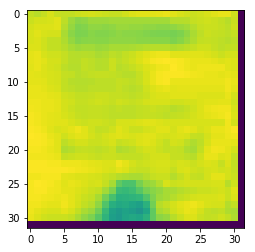

___


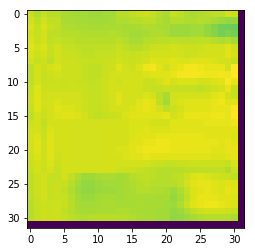

___


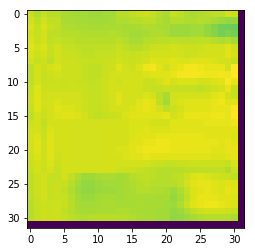

___


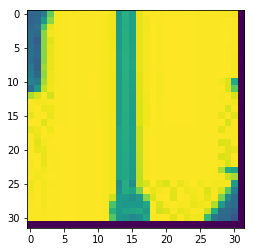

___


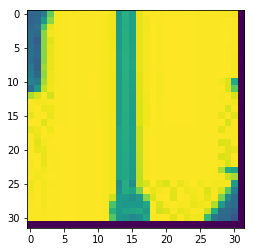

___


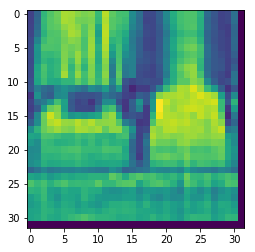

___


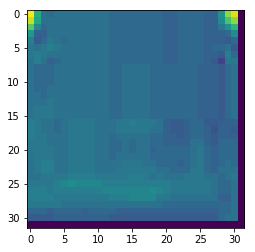

___


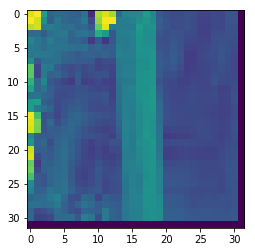

___


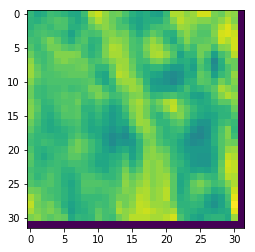

___


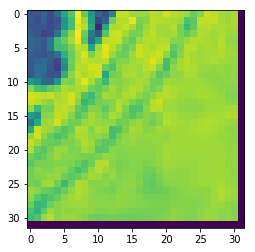

___


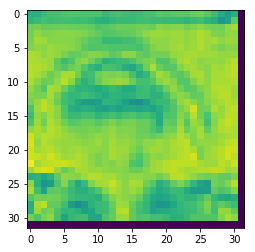

___


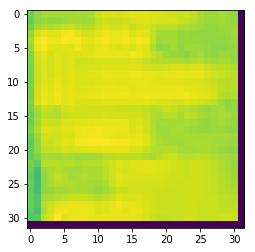

___


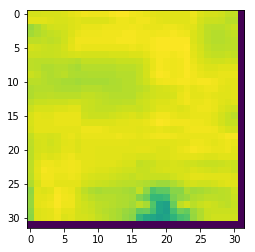

___


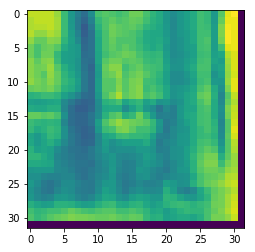

___


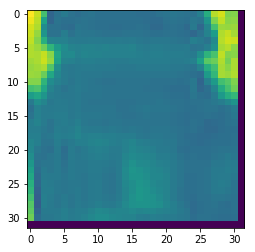

___


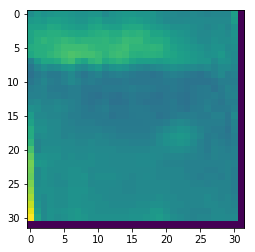

___


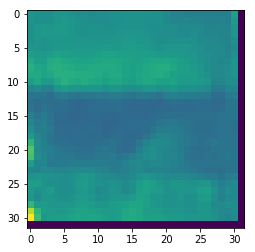

___


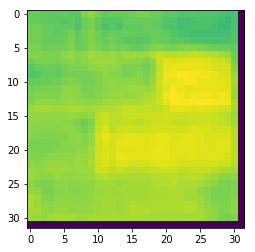

___


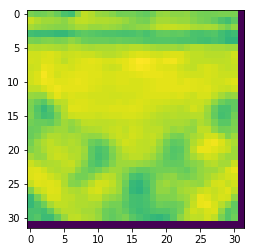

___


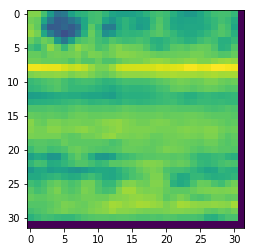

___


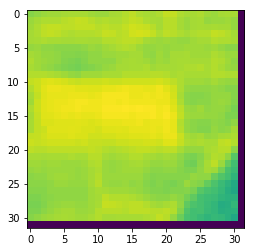

___


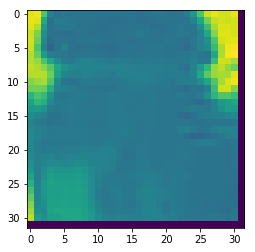

___


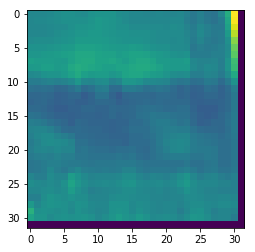

___


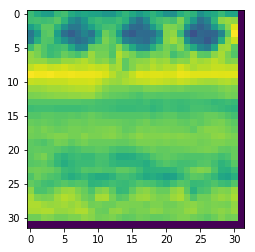

___


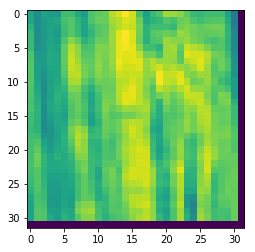

___


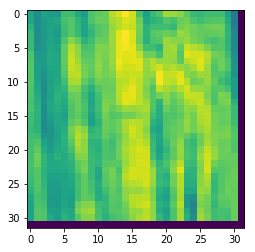

___


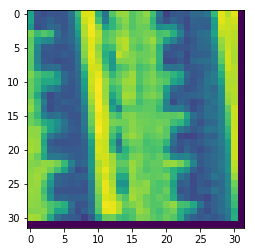

___


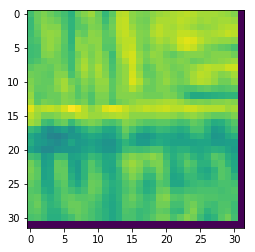

___


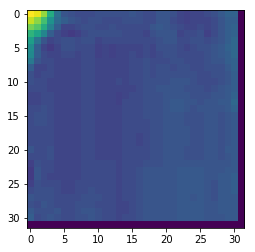

___


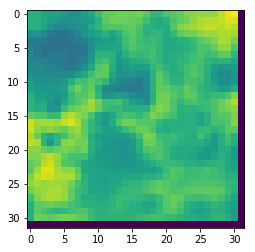

___


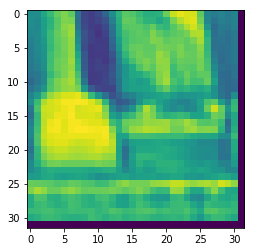

___


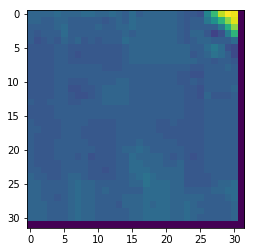

___


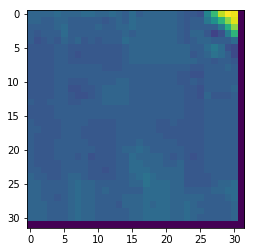

___


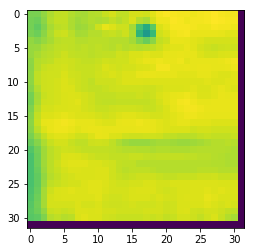

___


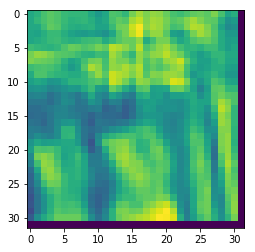

___


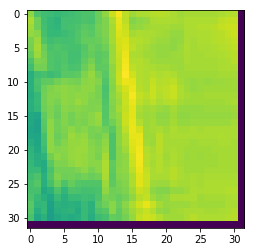

___


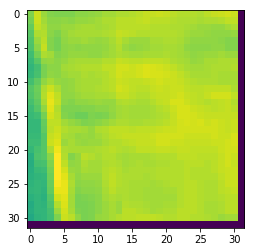

___


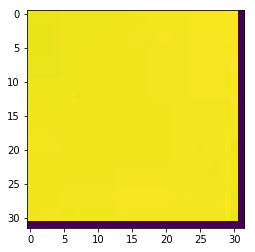

___


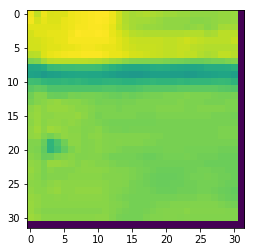

___


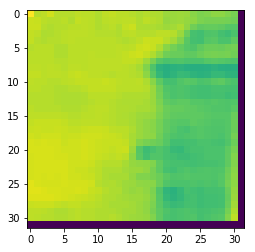

___


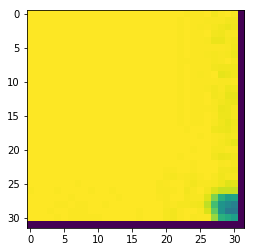

___


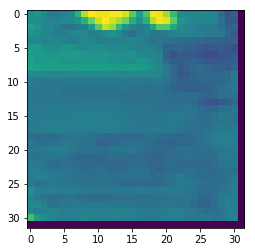

___


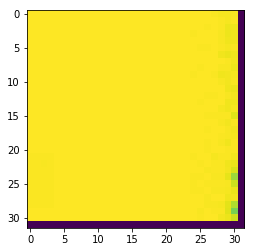

___


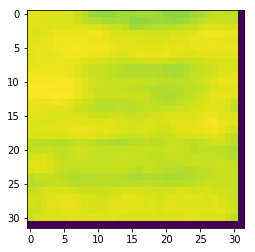

___


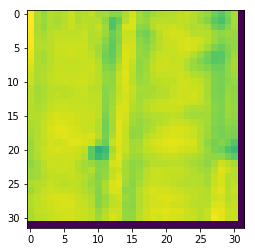

___


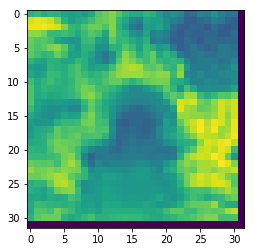

___


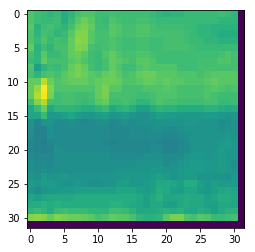

___


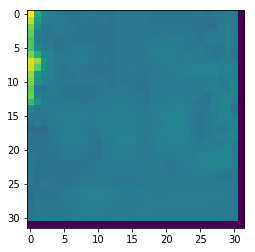

___


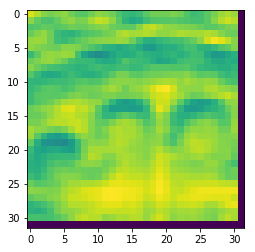

___


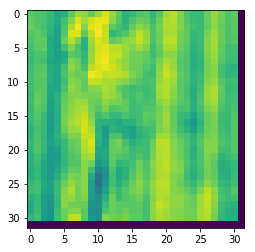

___


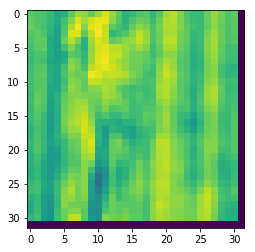

___


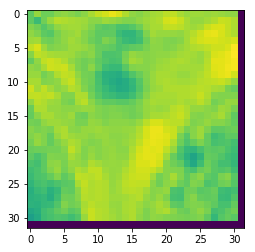

___


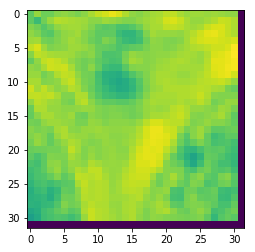

___


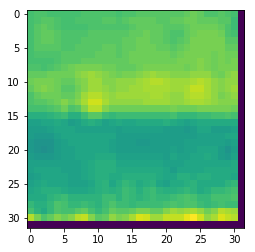

___


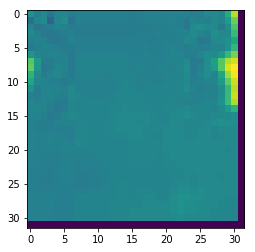

___


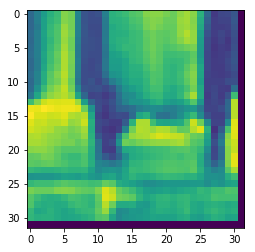

___


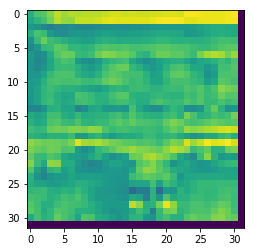

___


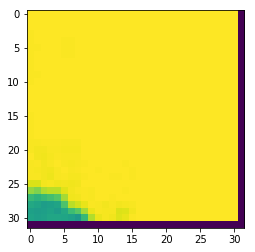

___


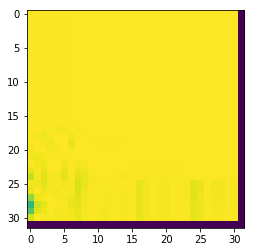

___


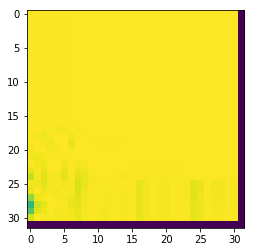

___


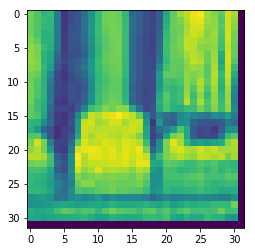

___


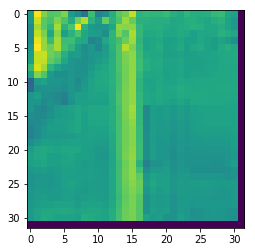

___


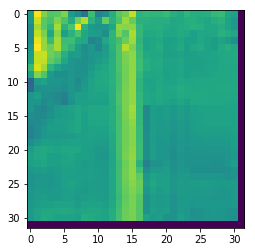

___


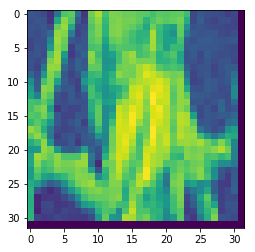

___


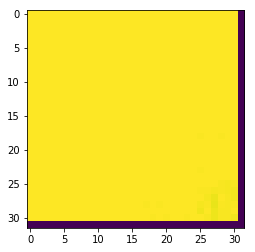

___


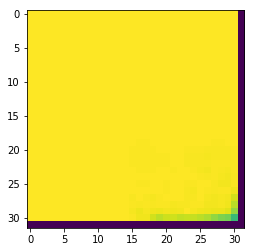

___


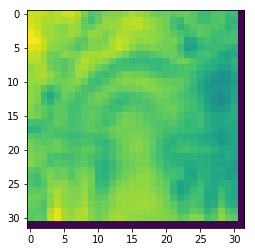

___


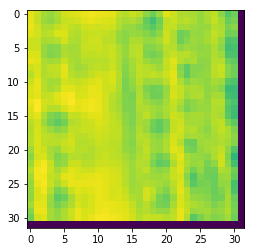

___


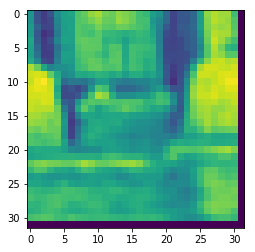

___


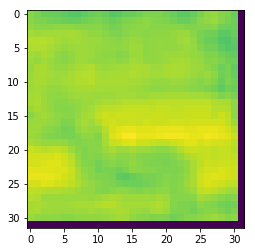

___


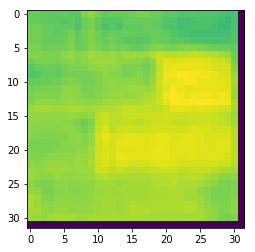

___


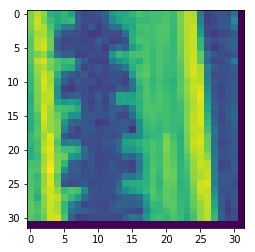

___


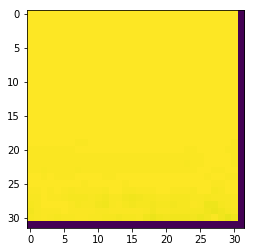

___


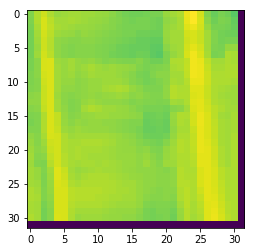

___


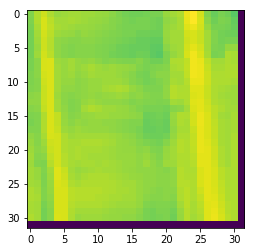

___


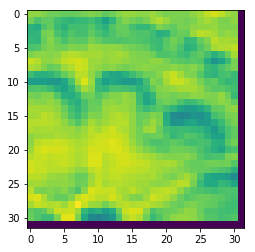

___


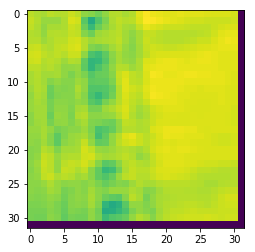

___


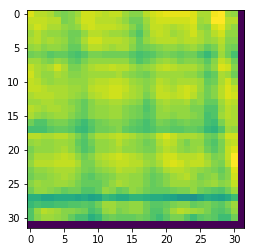

___


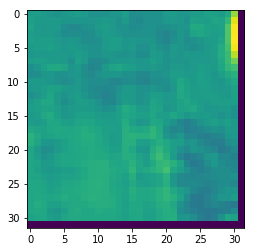

___


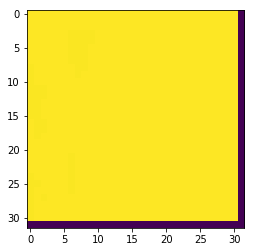

___


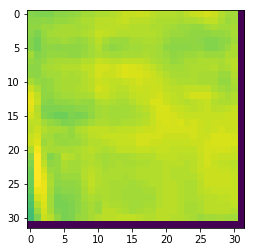

___


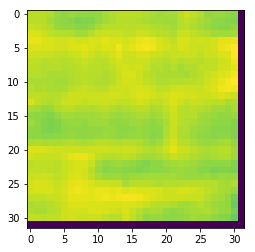

___


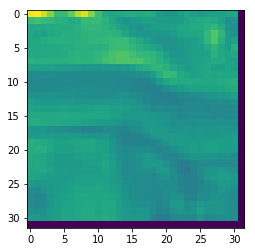

___


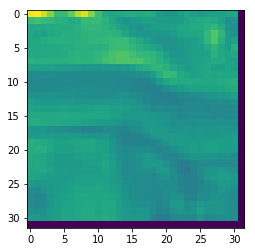

___


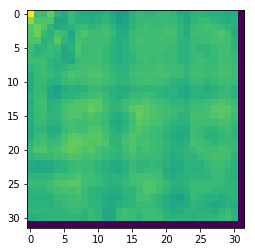

___


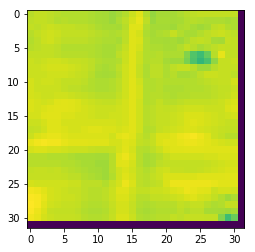

___


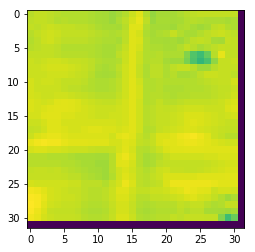

___


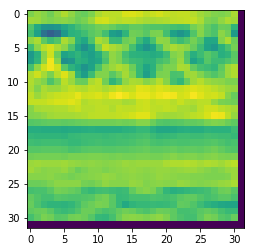

___


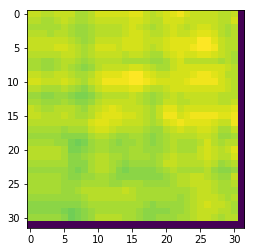

___


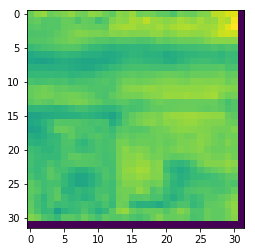

___


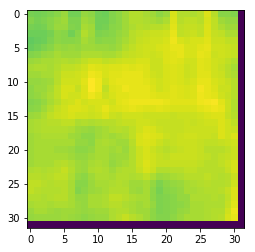

___


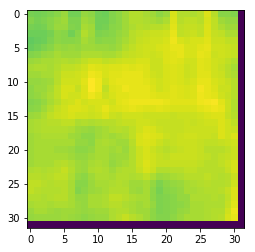

___


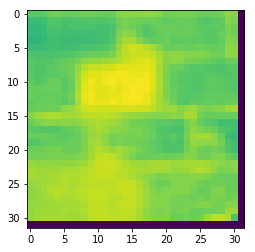

___


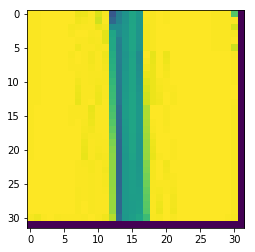

___


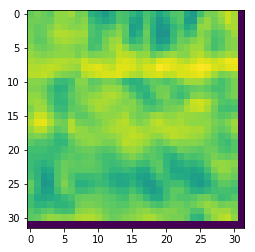

___


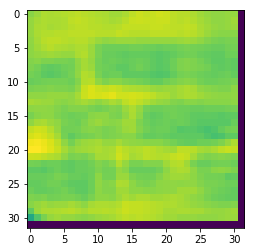

___


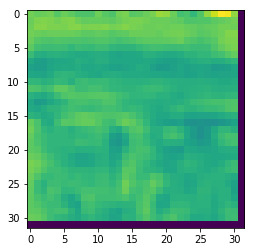

___


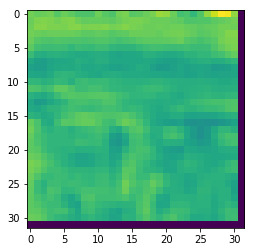

___


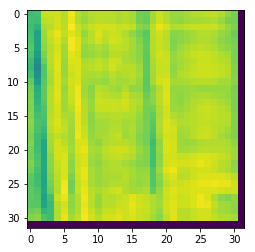

___


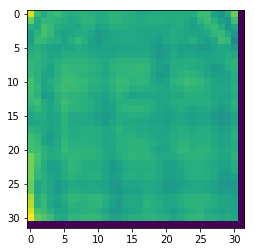

___


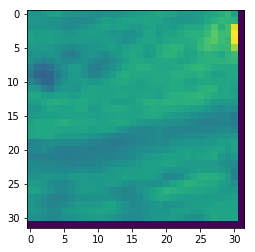

___


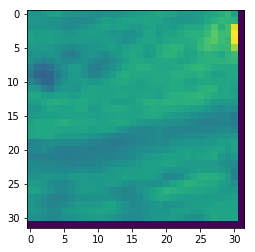

___


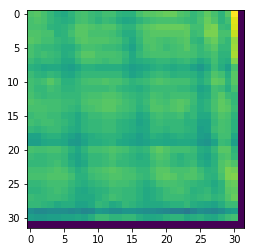

___


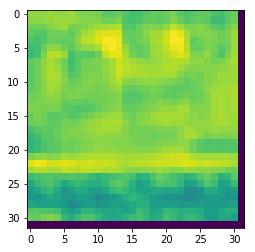

___


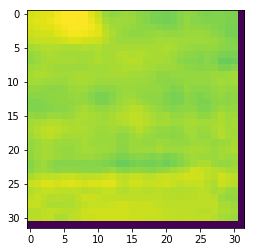

___


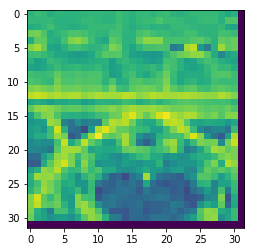

___


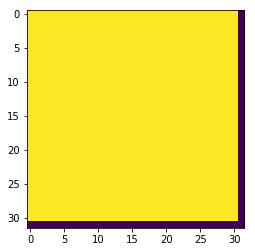

___


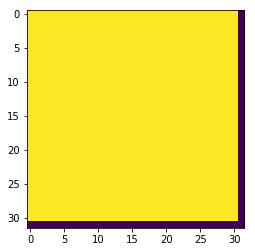

___


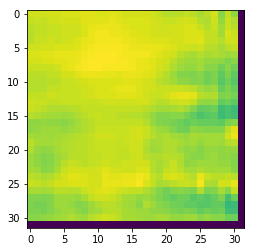

___


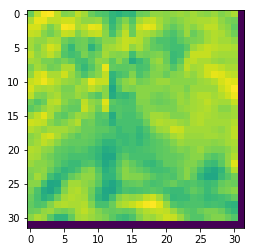

___


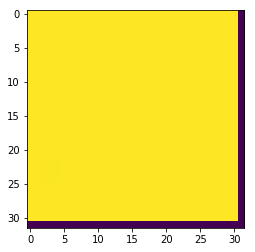

___


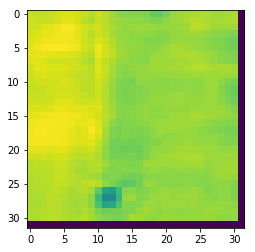

___


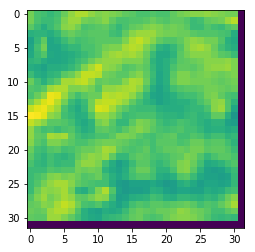

___


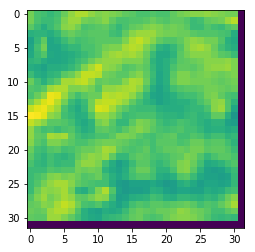

___


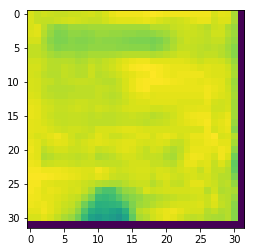

___


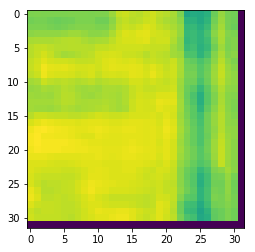

___


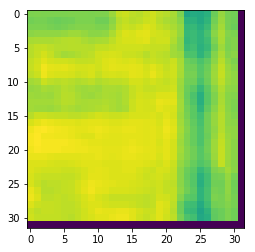

___


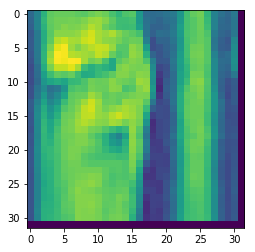

___


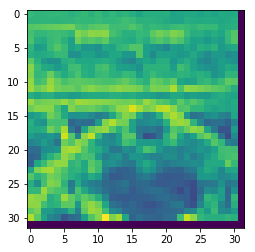

___


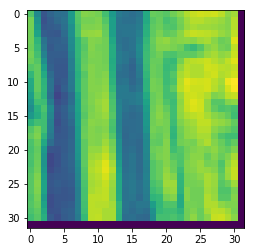

___


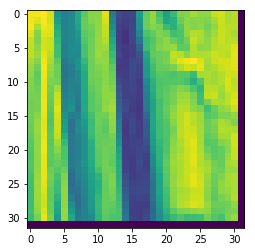

___


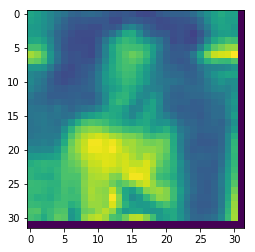

___


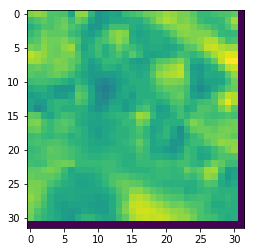

___


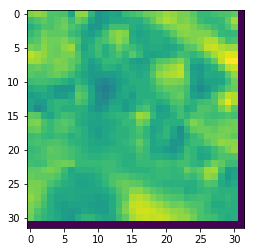

___


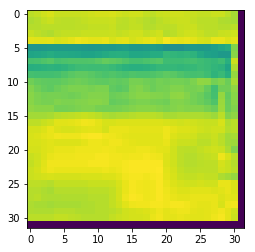

___


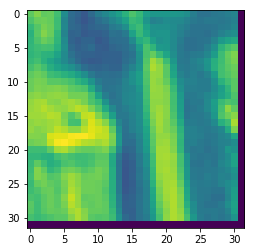

___


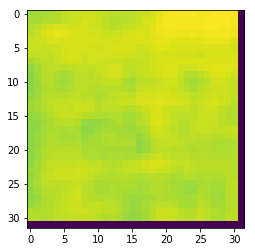

___


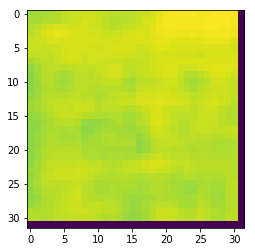

___


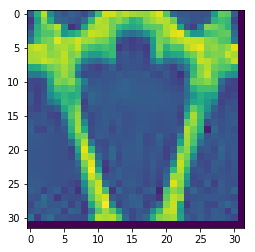

___


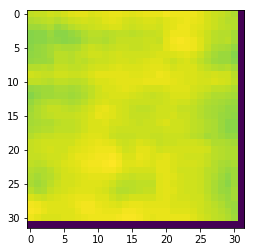

___


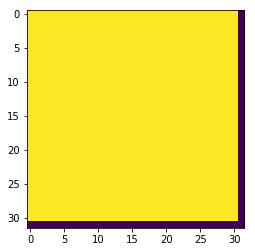

___


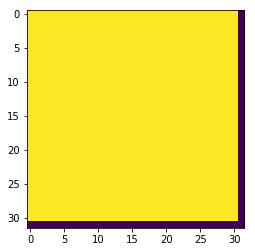

___


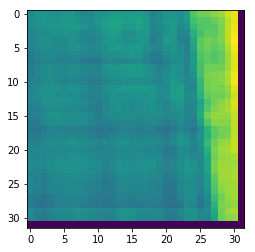

___


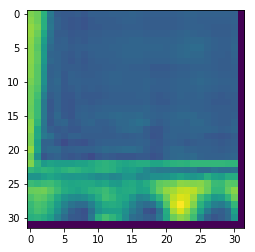

___


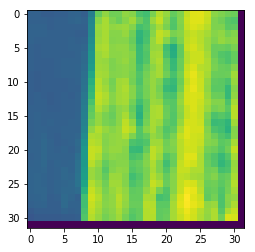

___


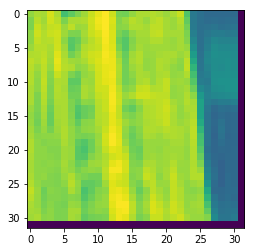

___
_________


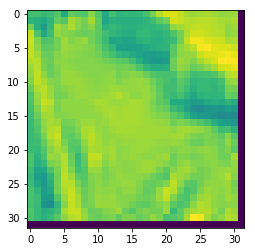

___


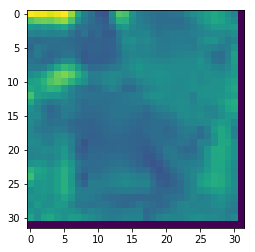

___


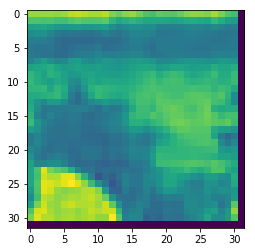

___


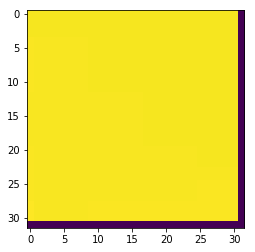

___


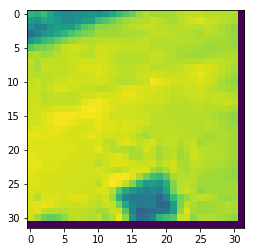

___


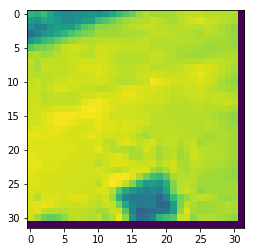

___


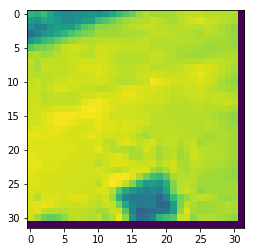

___


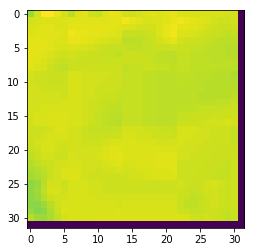

___


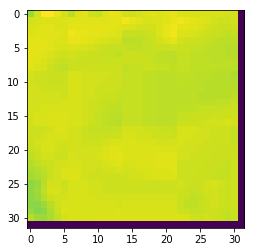

___


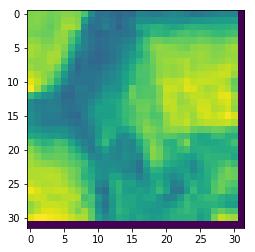

___


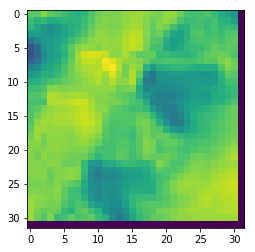

___


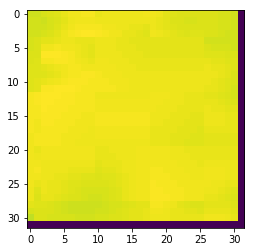

___


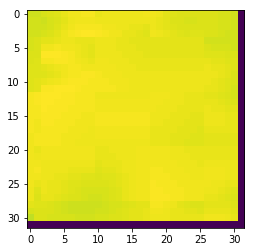

___


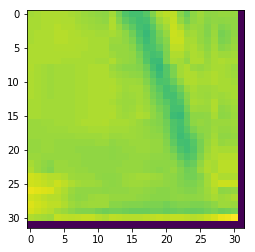

___


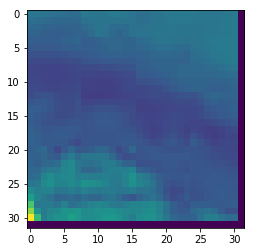

___


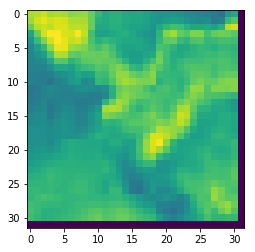

___


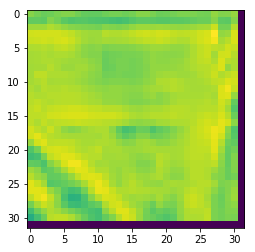

___


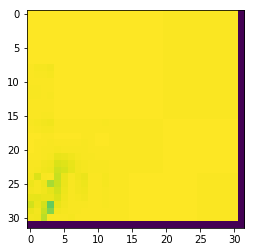

___


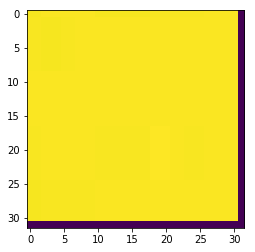

___


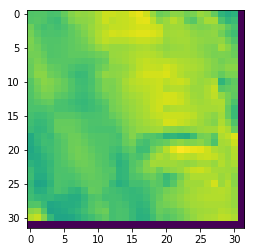

___


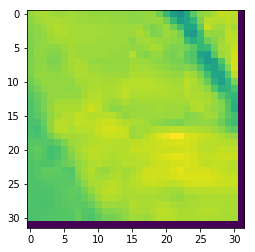

___


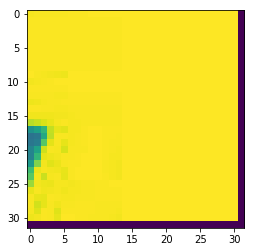

___


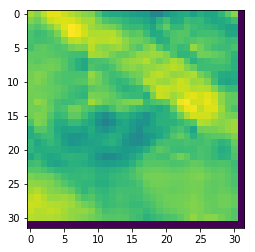

___


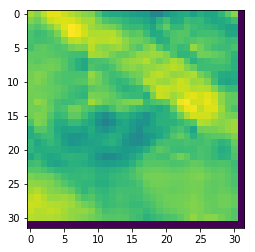

___


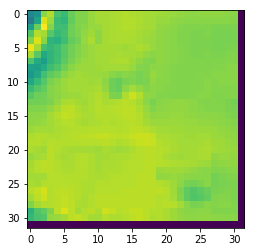

___


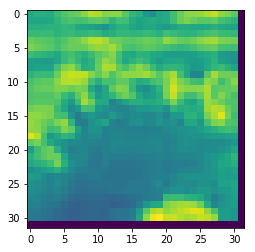

___


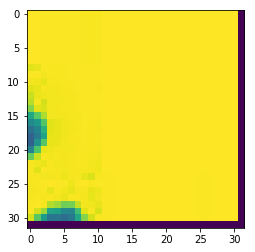

___


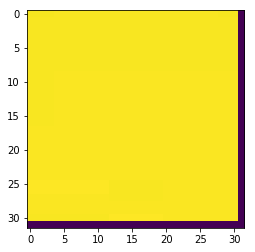

___


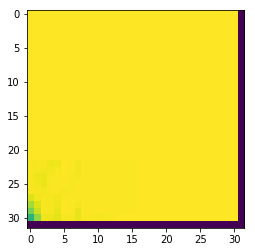

___


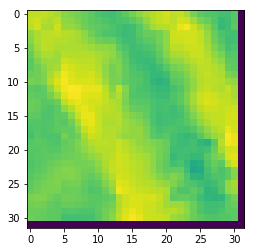

___


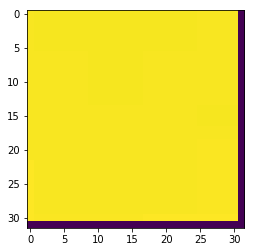

___


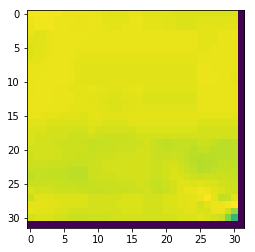

___


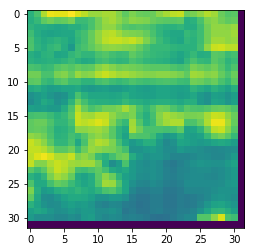

___


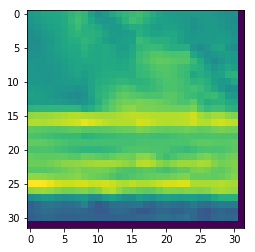

___


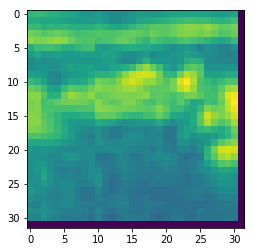

___


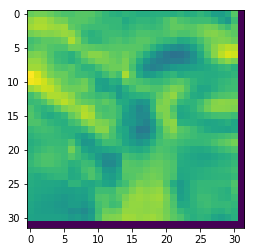

___


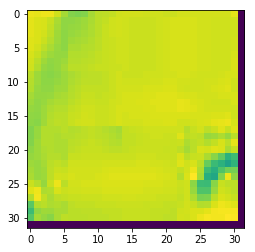

___


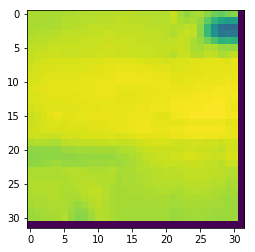

___


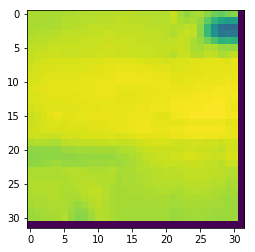

___


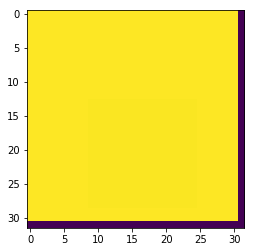

___


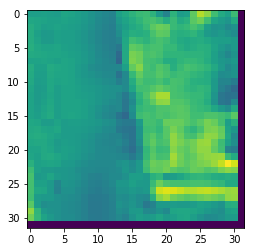

___


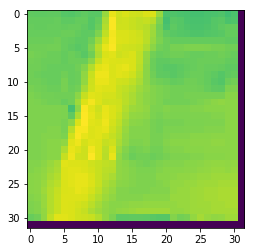

___


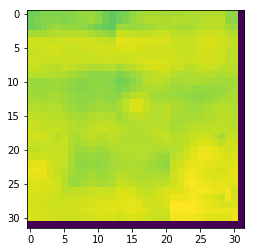

___


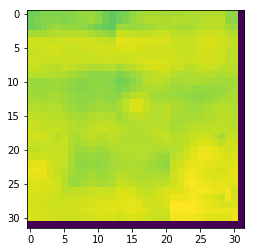

___


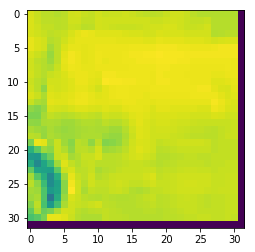

___


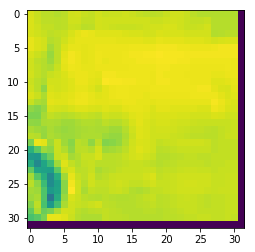

___


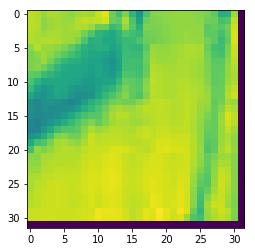

___


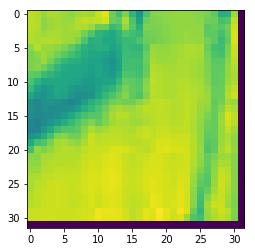

___


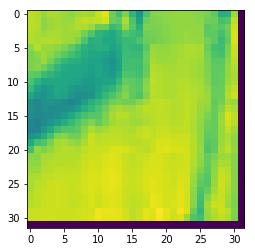

___


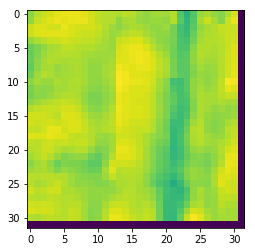

___


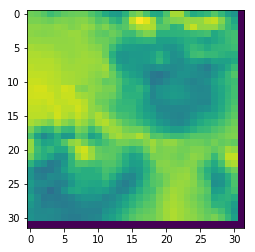

___


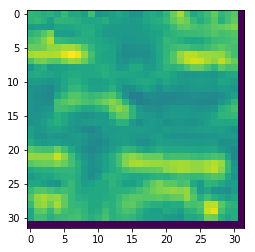

___


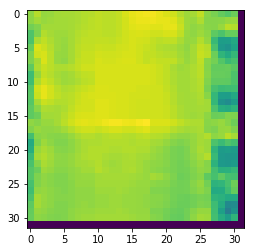

___


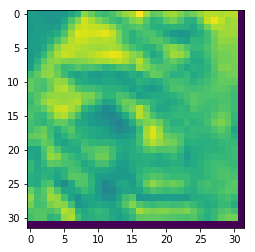

___


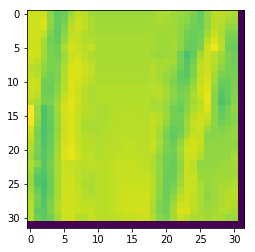

___


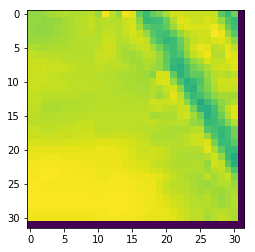

___


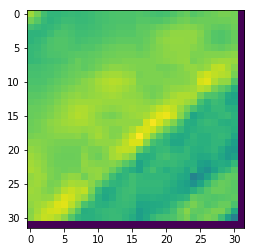

___


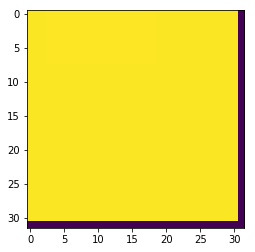

___


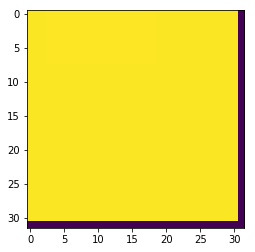

___


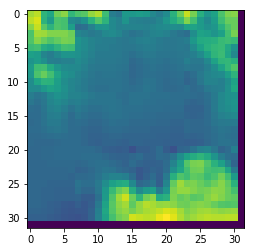

___


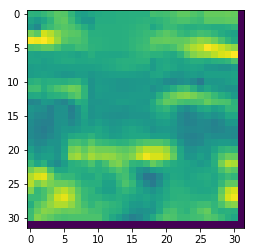

___


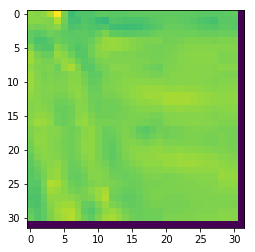

___


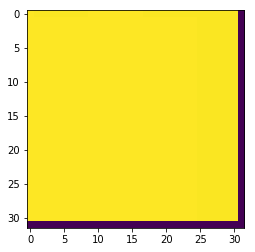

___


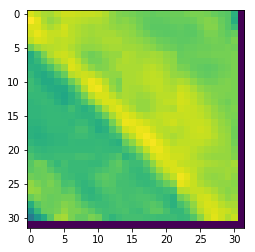

___


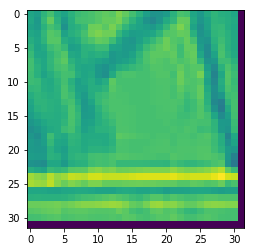

___


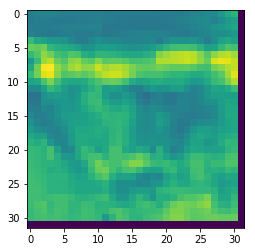

___


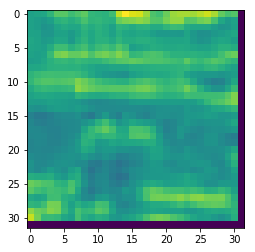

___


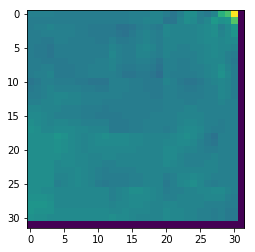

___


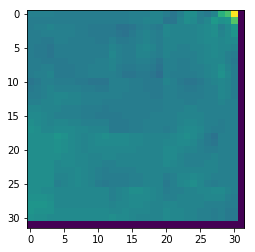

___


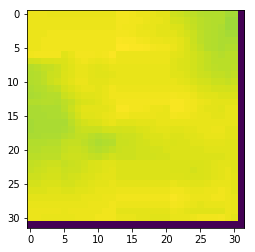

___


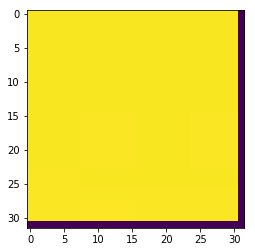

___


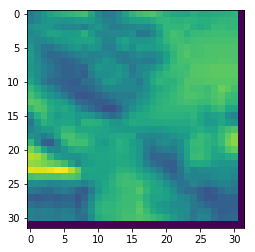

___


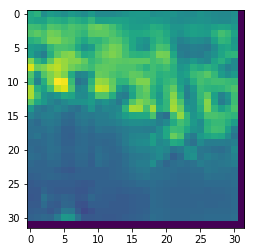

___


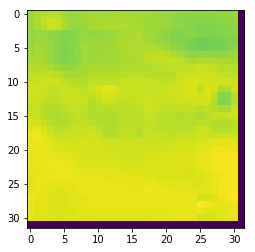

___


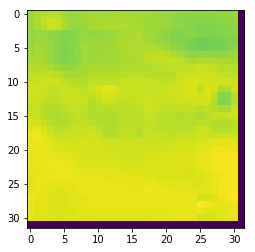

___


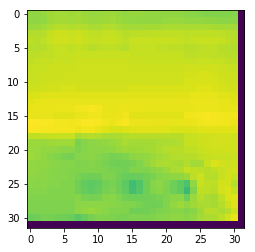

___


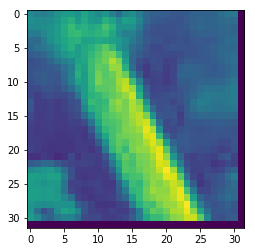

___


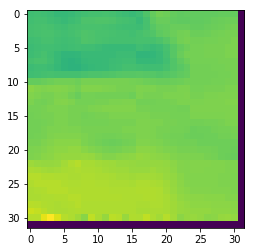

___


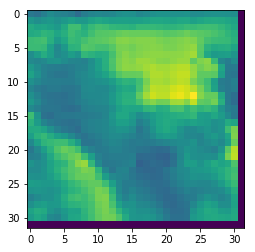

___


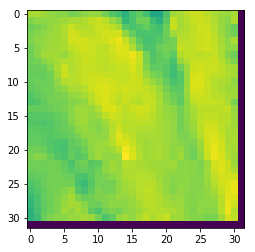

___


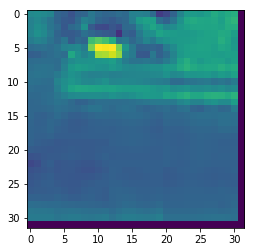

___


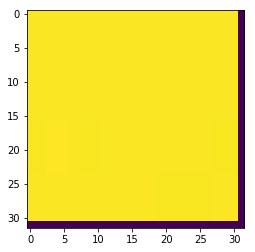

___


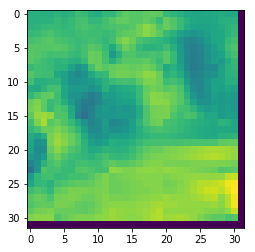

___


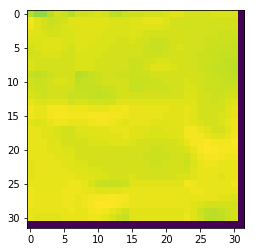

___


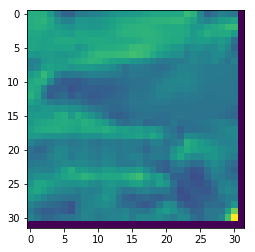

___


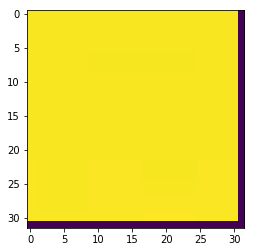

___


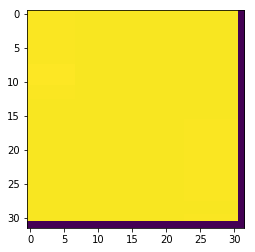

___


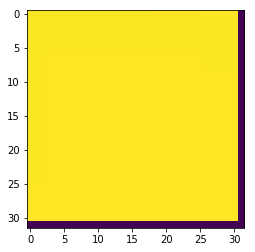

___


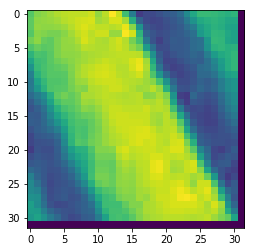

___


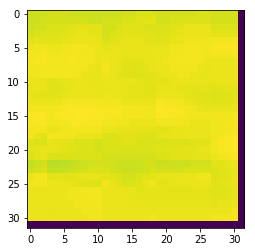

___


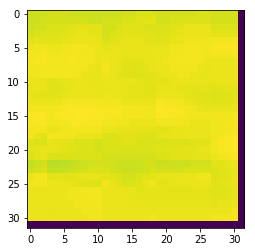

___


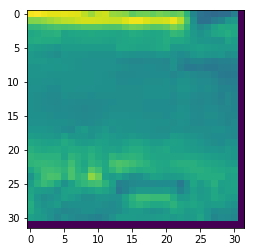

___


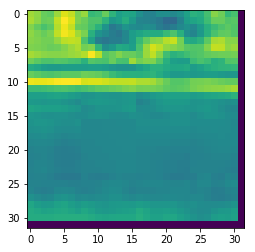

___


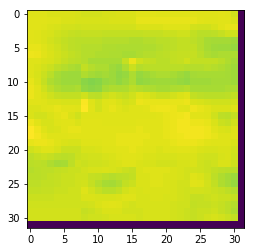

___


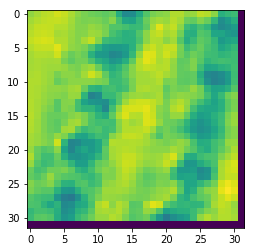

___


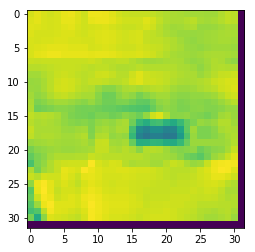

___


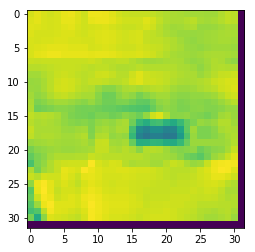

___


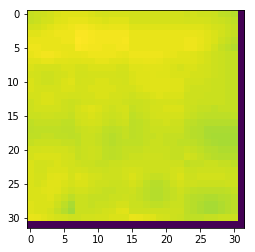

___


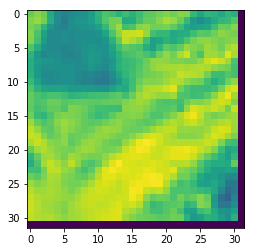

___


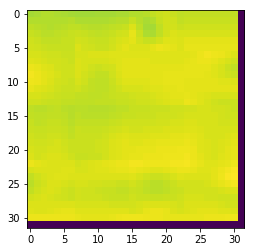

___


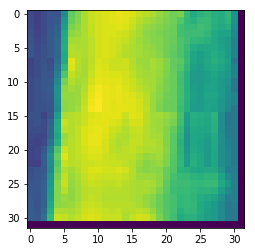

___


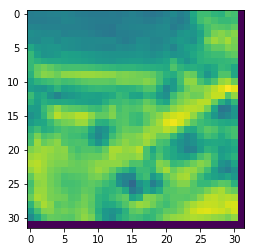

___


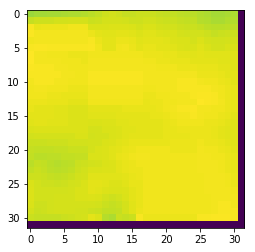

___


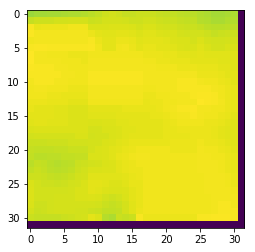

___


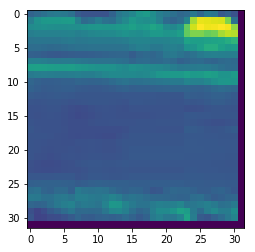

___


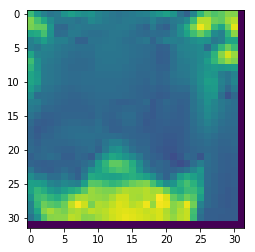

___


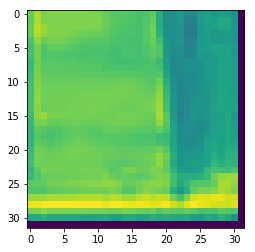

___


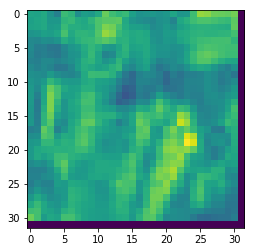

___


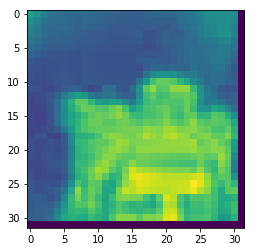

___


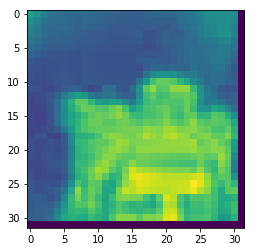

___


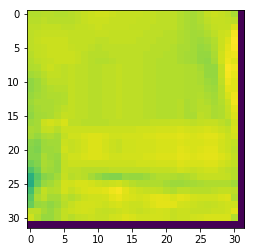

___


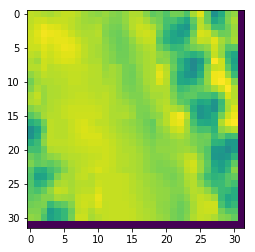

___


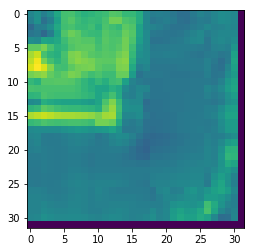

___


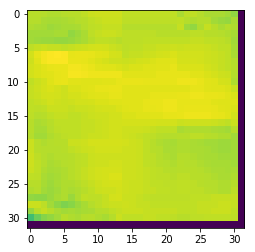

___


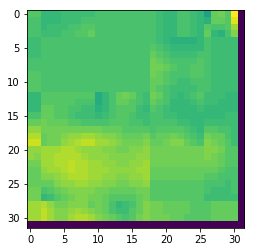

___


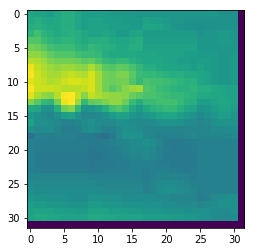

___


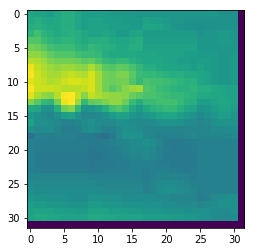

___


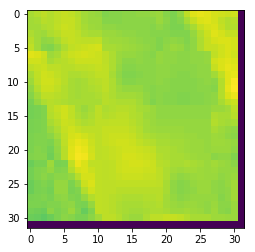

___


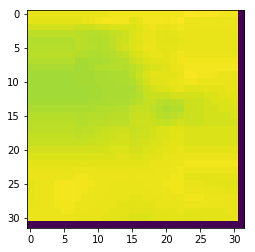

___


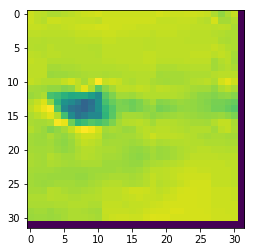

___


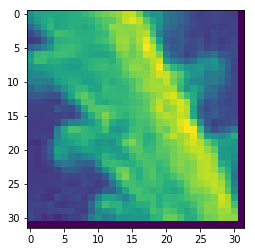

___


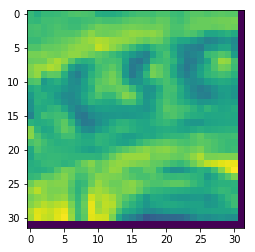

___


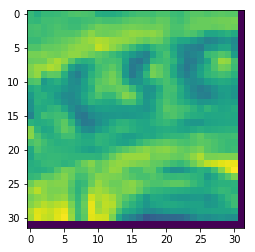

___


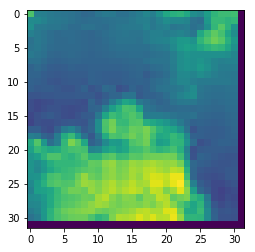

___


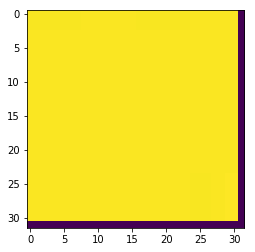

___


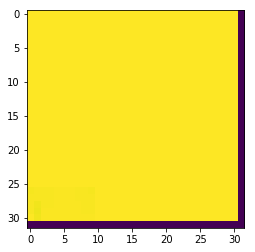

___


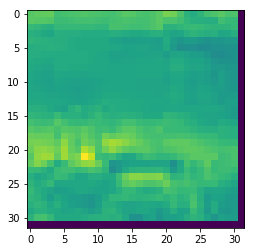

___


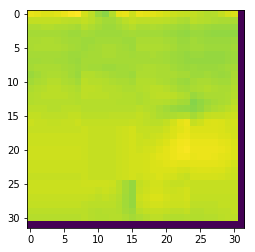

___


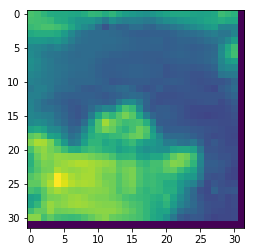

___


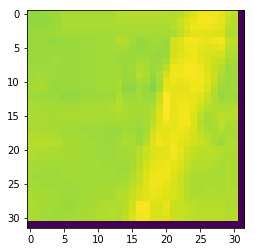

___


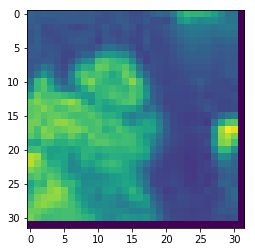

___


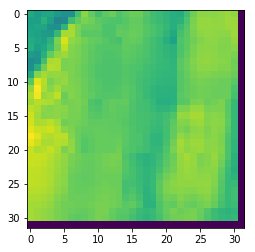

___


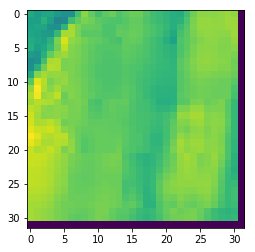

___


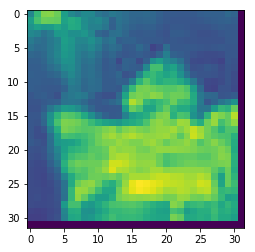

___


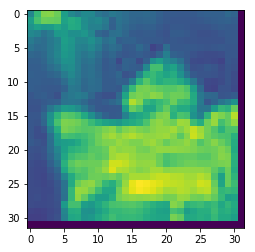

___


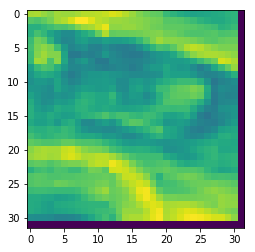

___


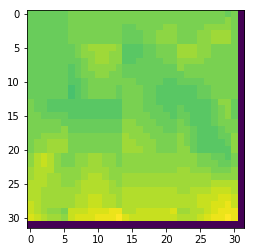

___


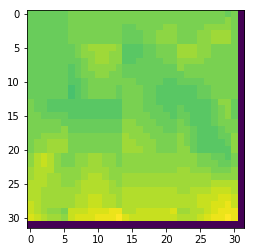

___


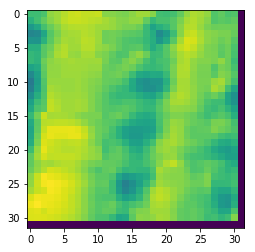

___


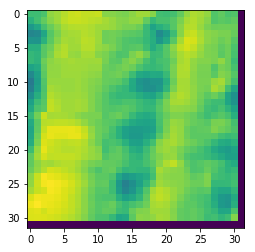

___


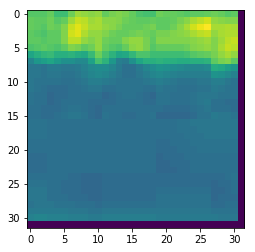

___


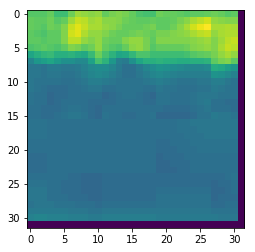

___


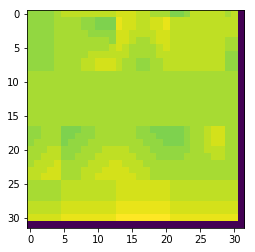

___


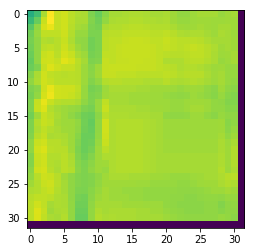

___


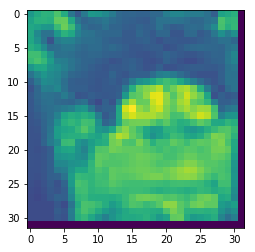

___


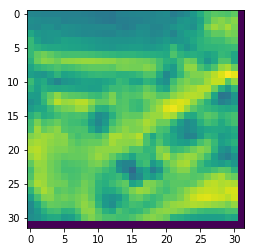

___


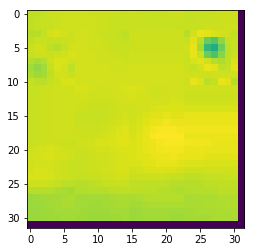

___


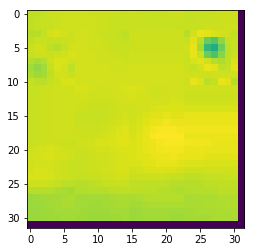

___


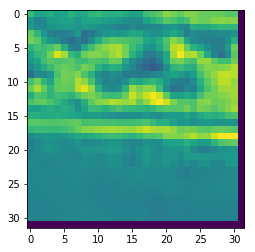

___


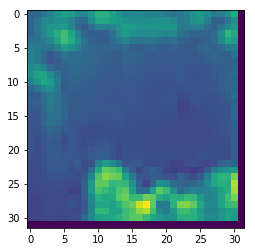

___


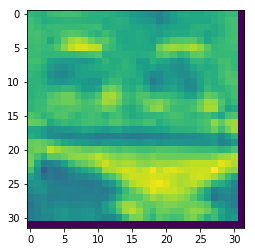

___


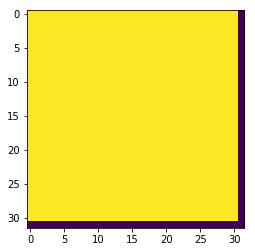

___


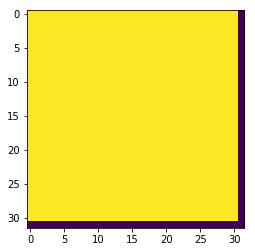

___


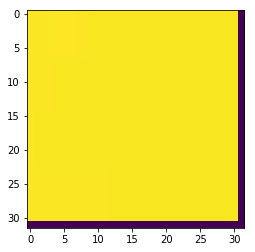

___


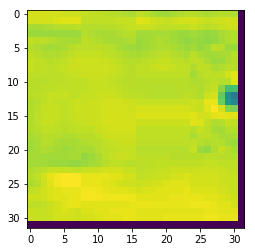

___


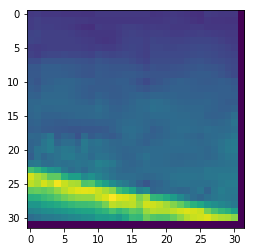

___


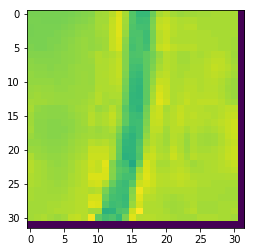

___


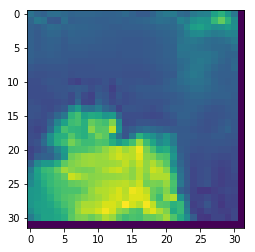

___


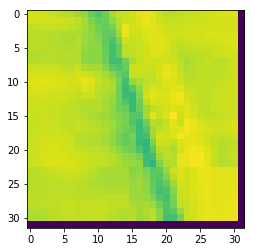

___


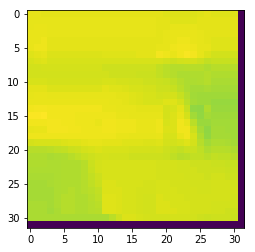

___


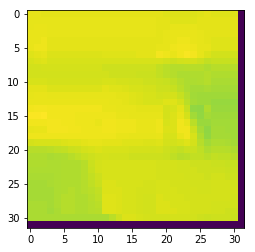

___


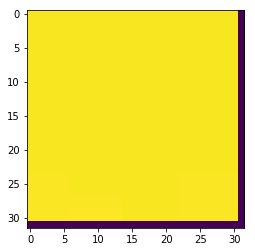

___


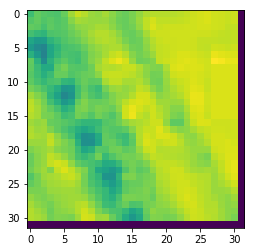

___


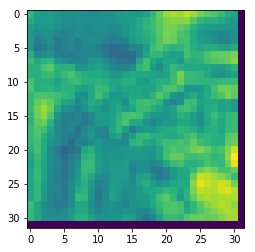

___


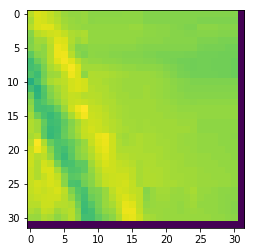

___


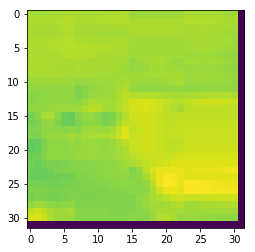

___


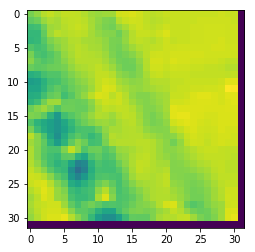

___


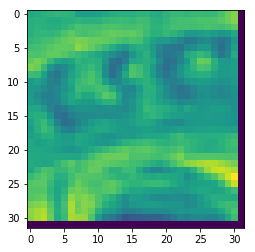

___


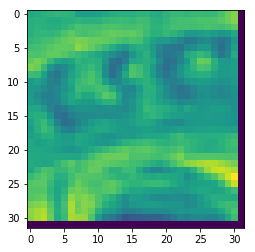

___


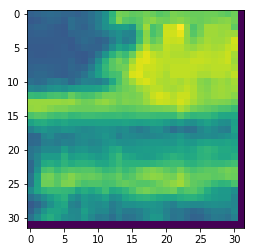

___


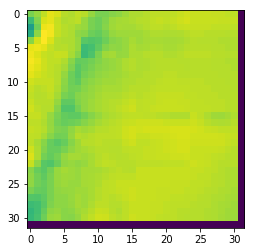

___


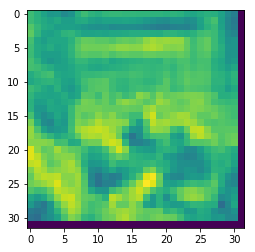

___


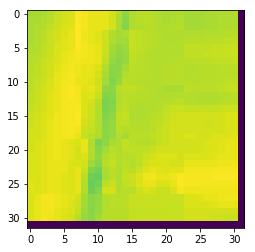

___


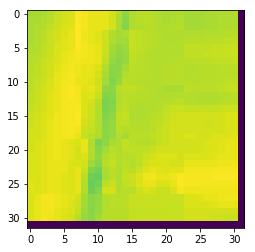

___


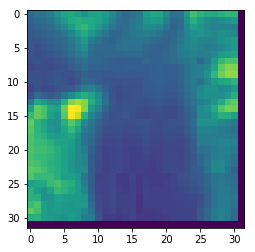

___


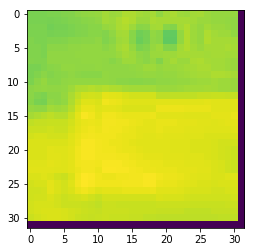

___


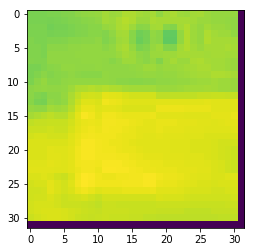

___


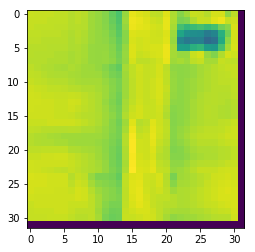

___


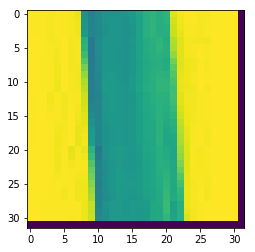

___


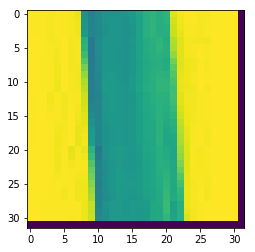

___


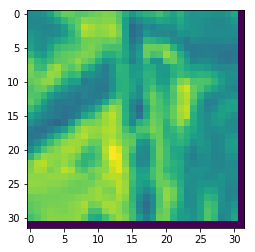

___


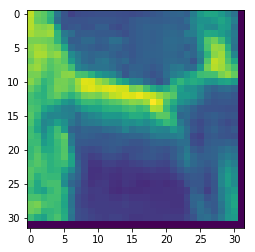

___


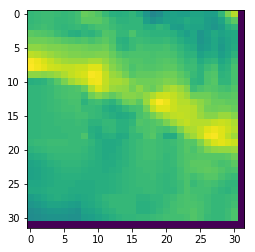

___


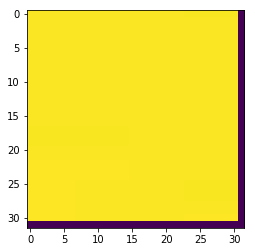

___


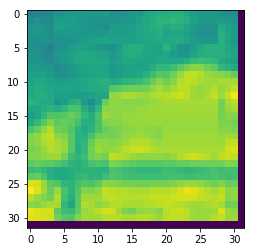

___


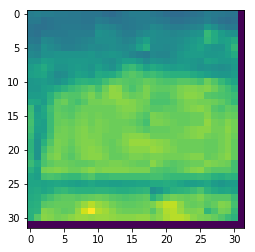

___


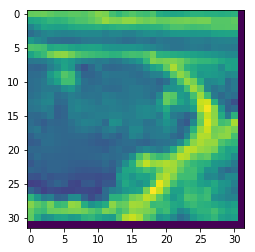

___


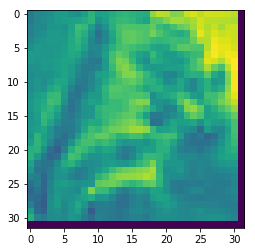

___


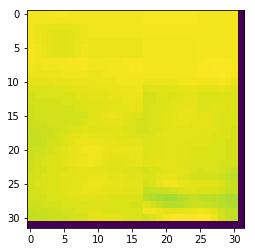

___


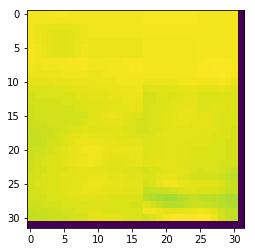

___


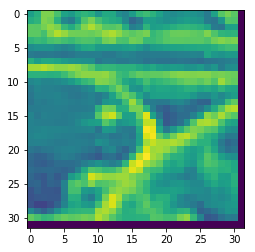

___


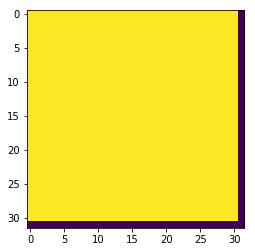

___


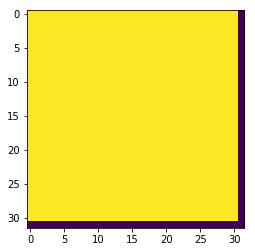

___


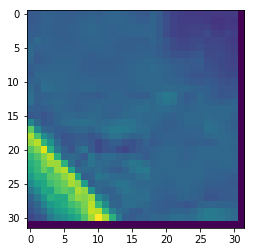

___


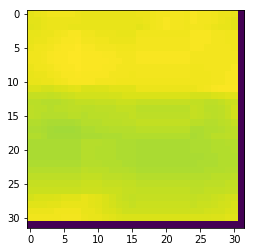

___


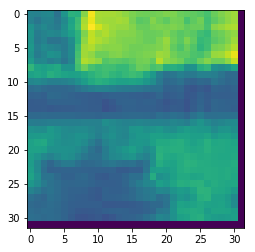

___


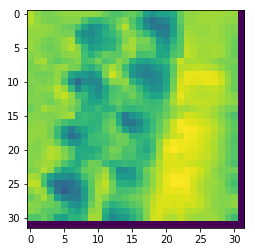

___


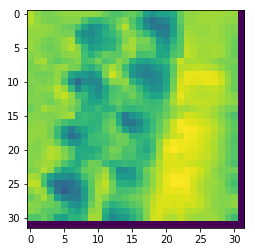

___


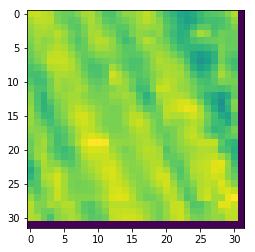

___


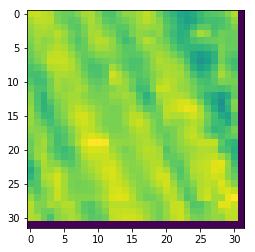

___
_________


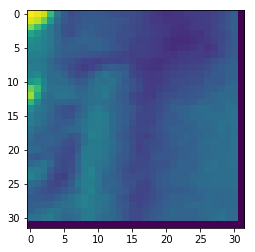

___


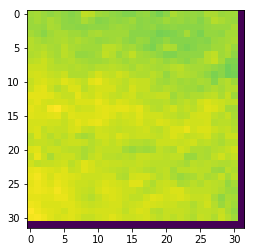

___


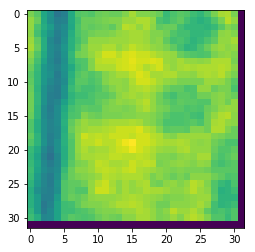

___


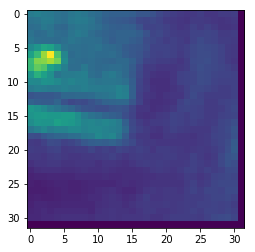

___


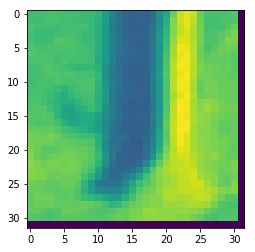

___


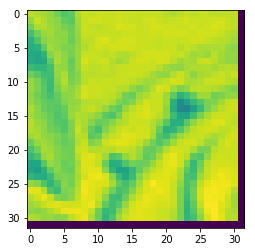

___


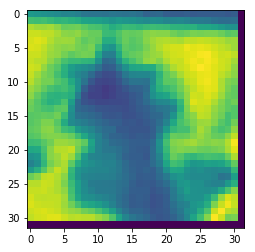

___


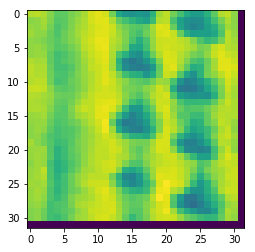

___


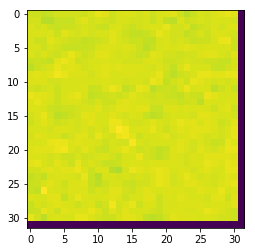

___


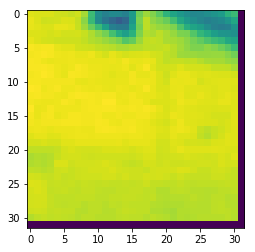

___


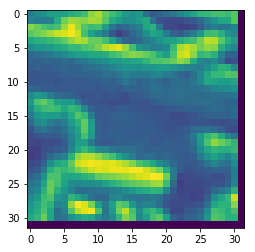

___


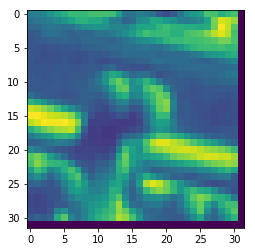

___


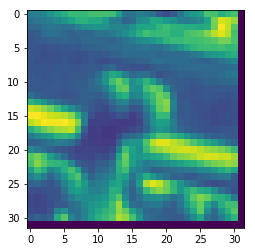

___


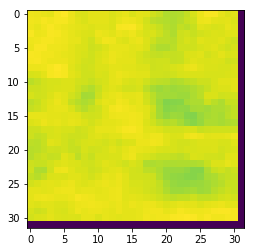

___


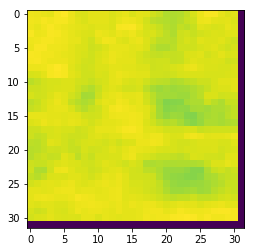

___


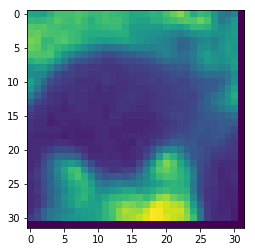

___


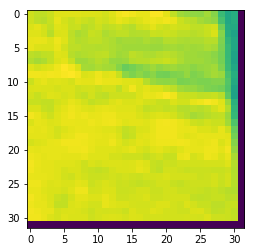

___


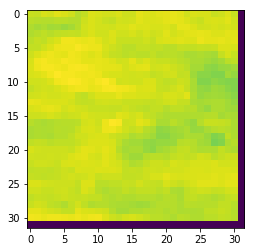

___


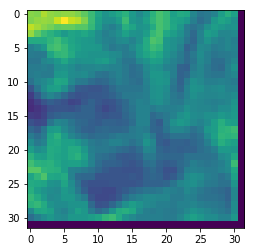

___


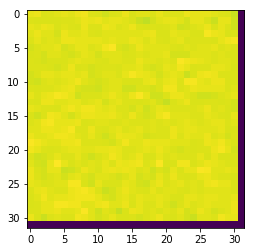

___


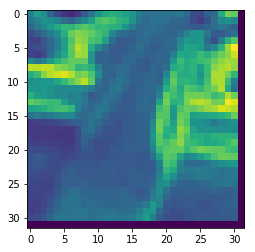

___


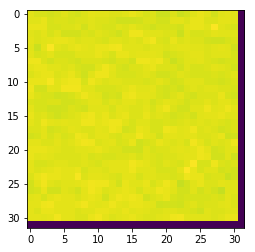

___


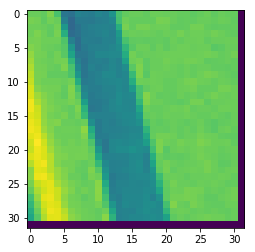

___


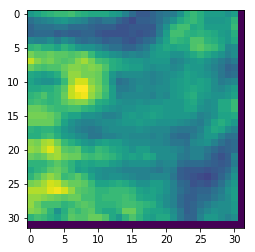

___


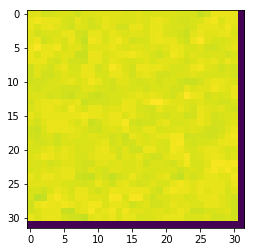

___


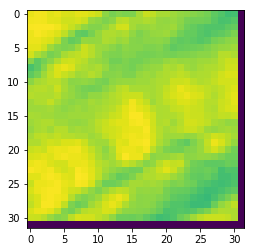

___


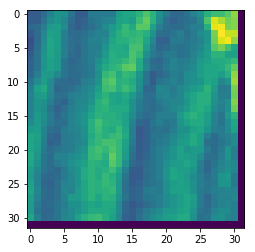

___


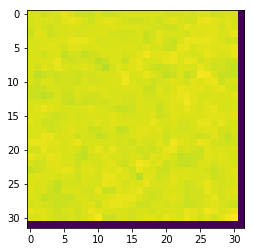

___


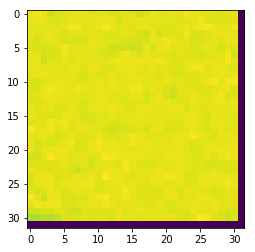

___


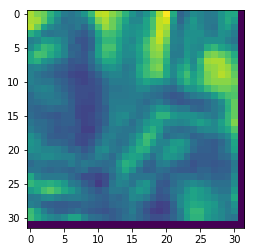

___


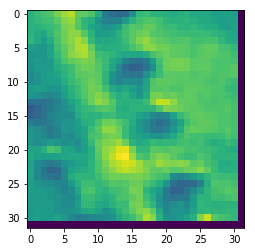

___


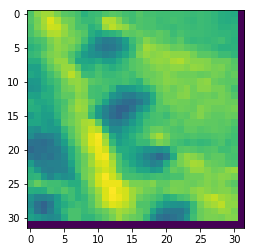

___


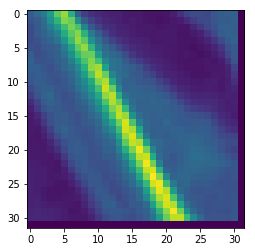

___


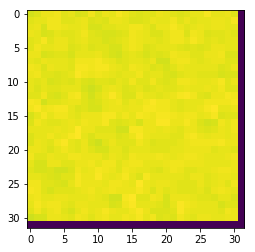

___


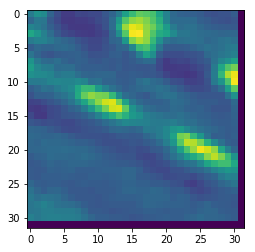

___


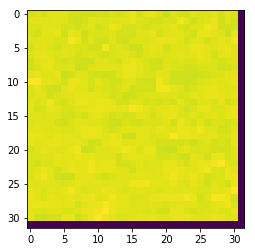

___


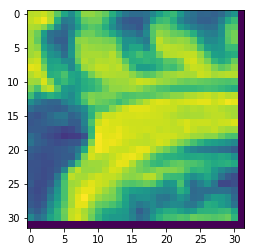

___


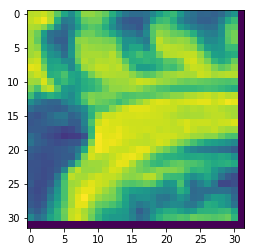

___


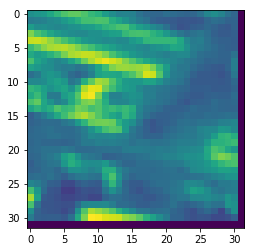

___


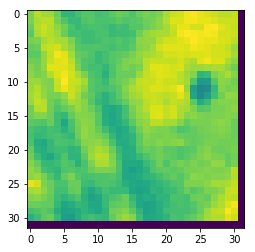

___


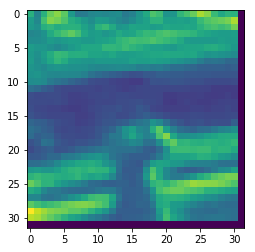

___


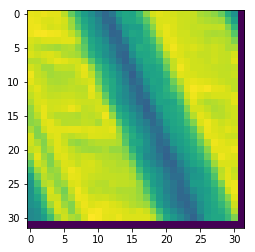

___


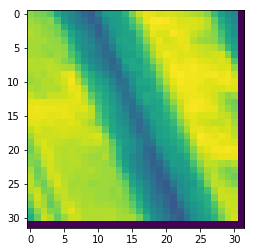

___


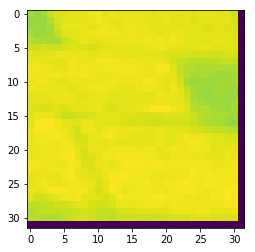

___


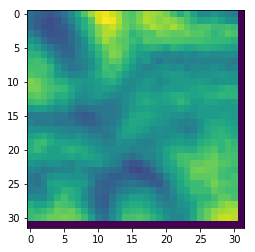

___


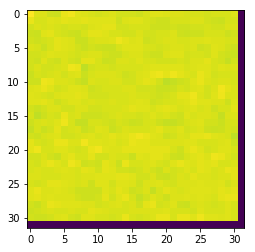

___


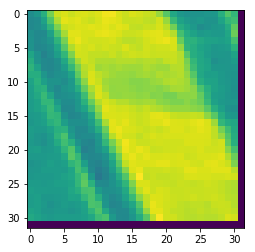

___


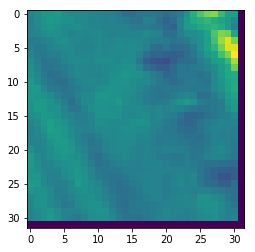

___


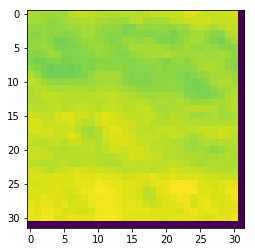

___


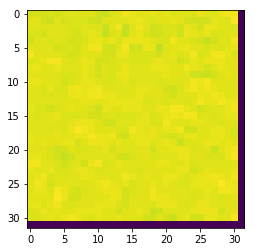

___


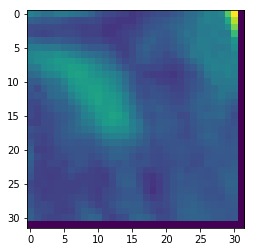

___


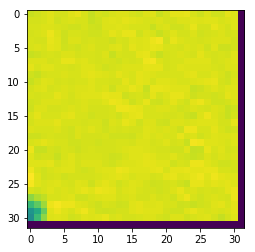

___


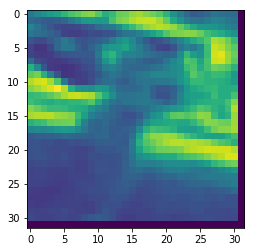

___


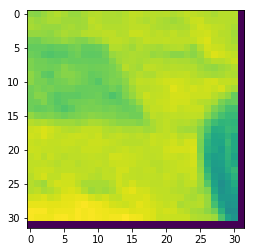

___


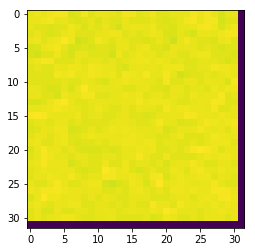

___


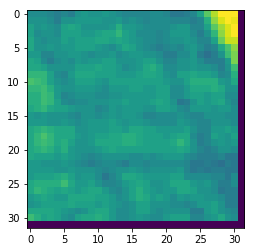

___


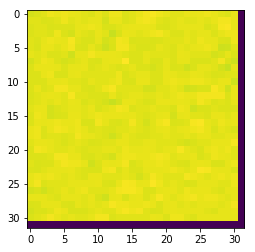

___


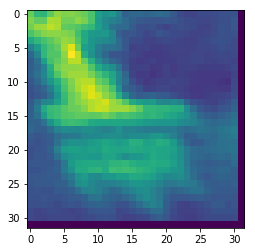

___


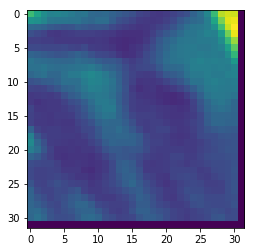

___


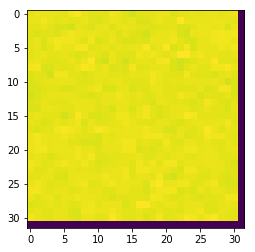

___


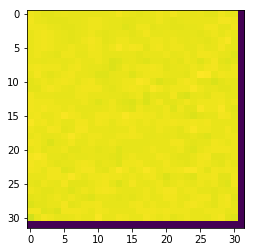

___


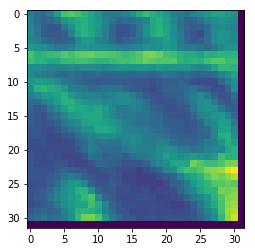

___


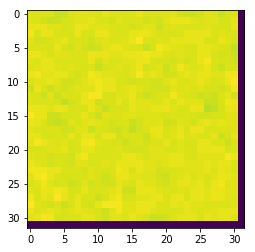

___


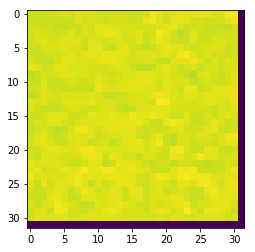

___


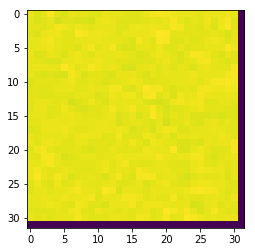

___


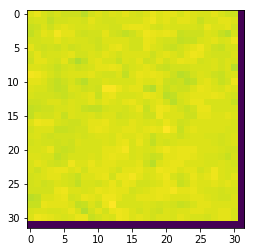

___


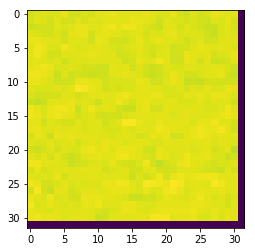

___


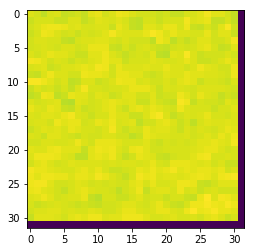

___


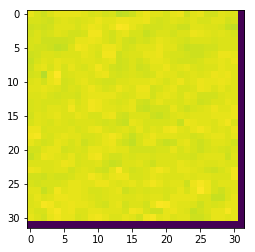

___


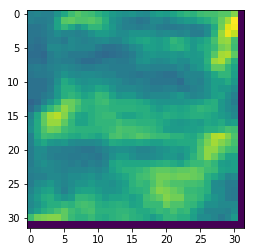

___


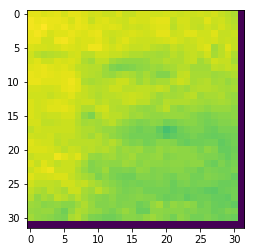

___


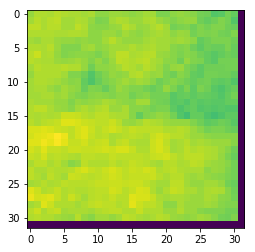

___


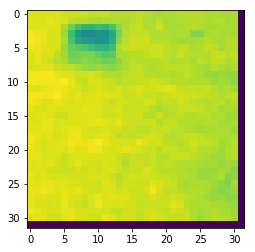

___


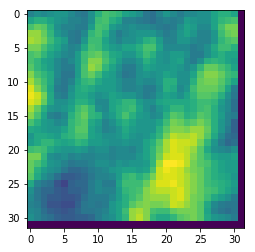

___


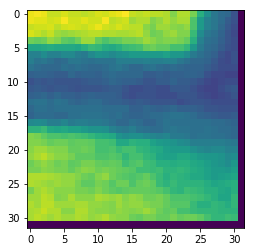

___


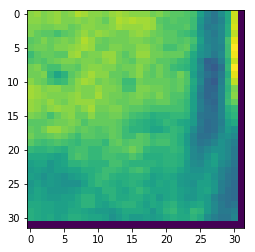

___


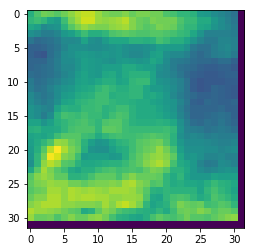

___


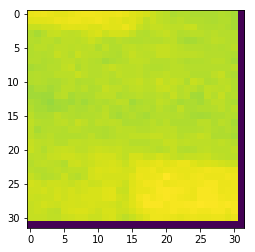

___


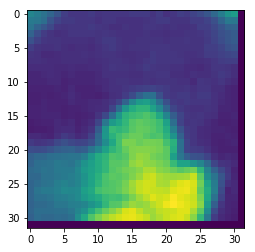

___


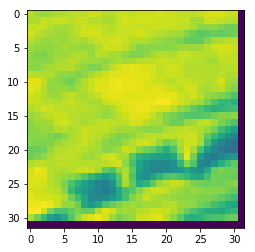

___


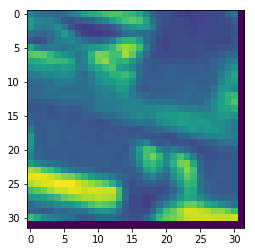

___


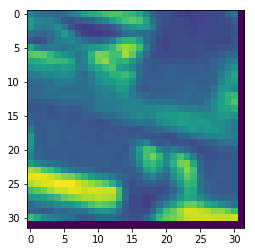

___


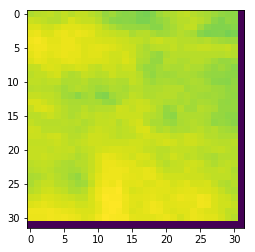

___


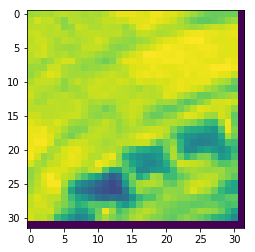

___


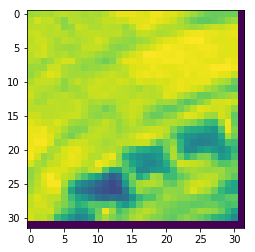

___


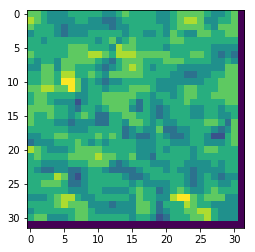

___


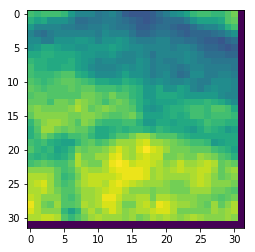

___


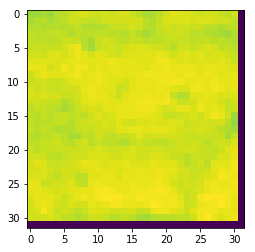

___


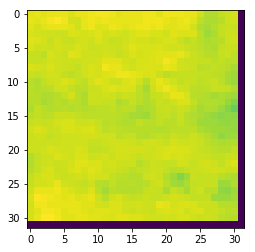

___


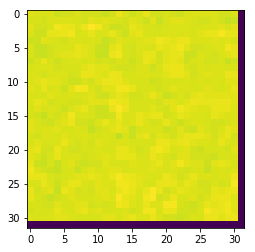

___


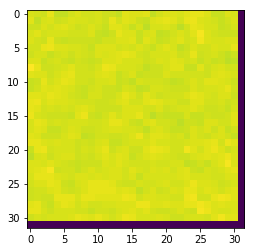

___


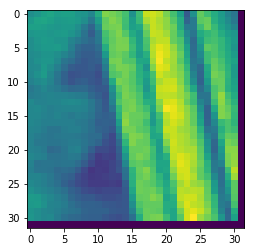

___


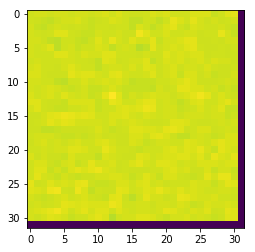

___


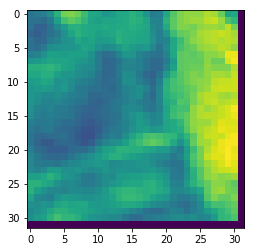

___


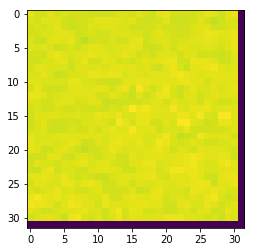

___


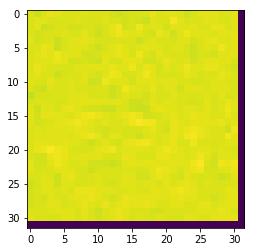

___


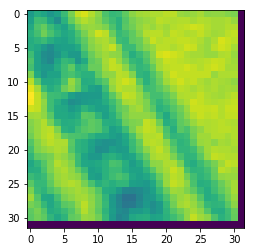

___


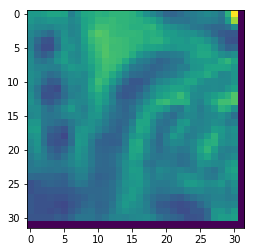

___


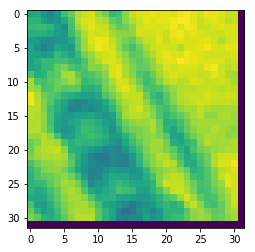

___


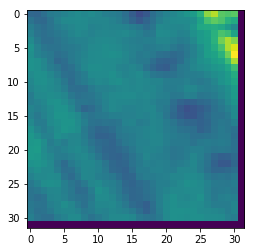

___


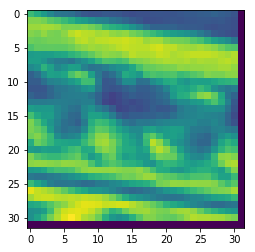

___


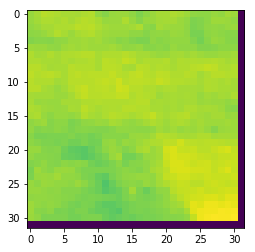

___


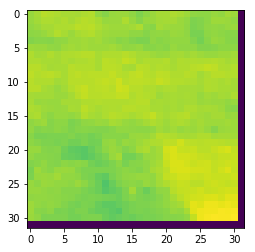

___


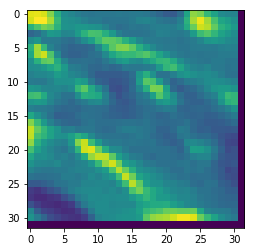

___


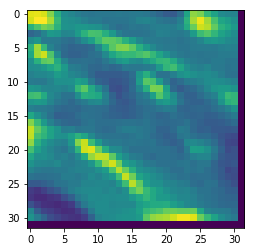

___


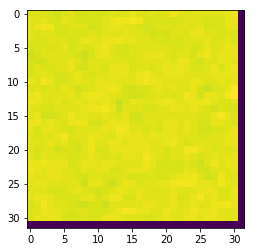

___


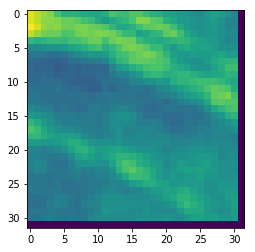

___


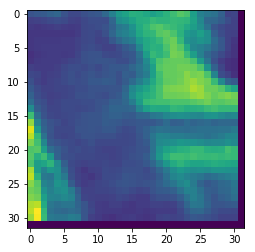

___


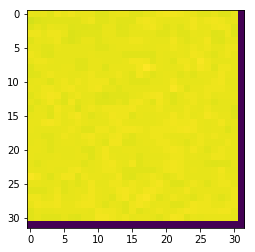

___


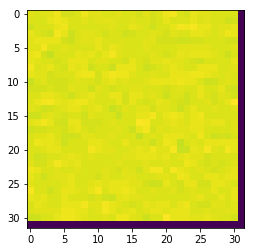

___


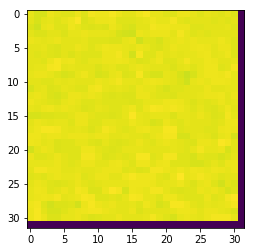

___


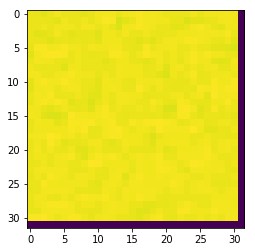

___


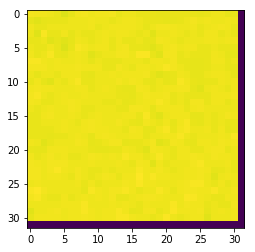

___


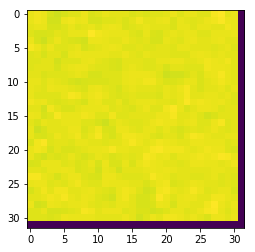

___


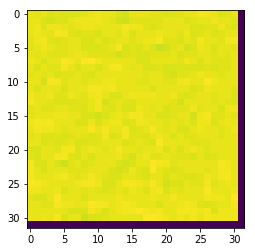

___


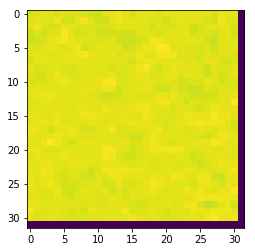

___


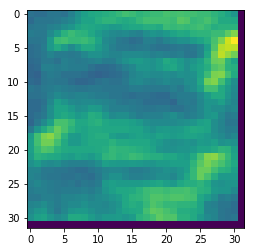

___


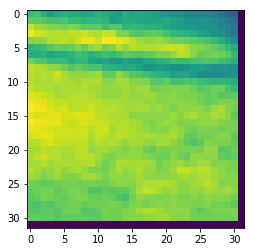

___


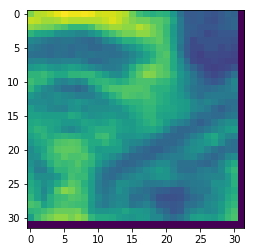

___


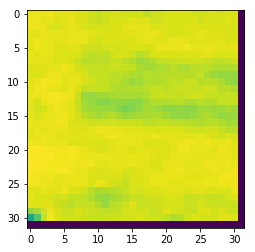

___


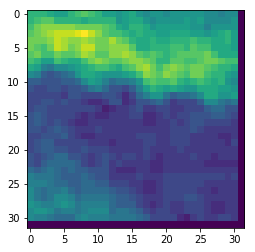

___


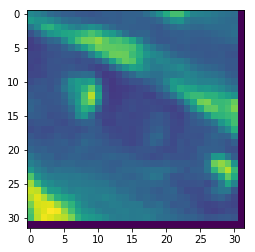

___


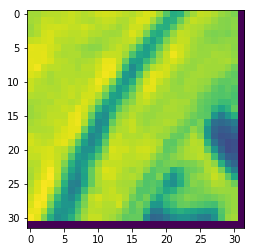

___


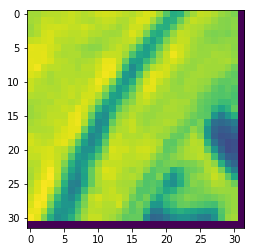

___


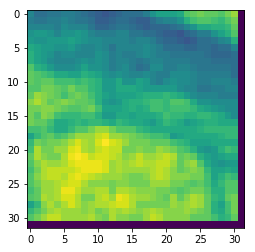

___


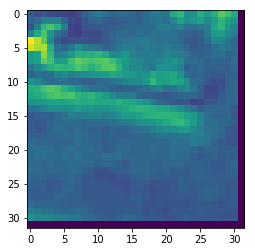

___


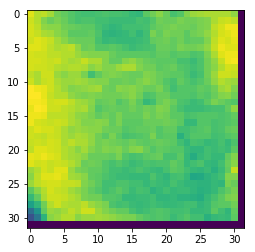

___


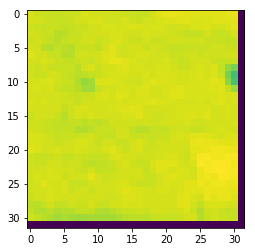

___


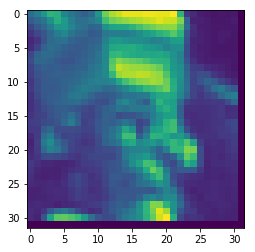

___


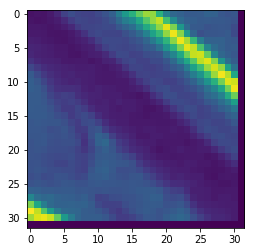

___


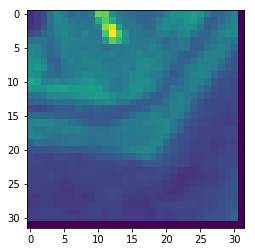

___


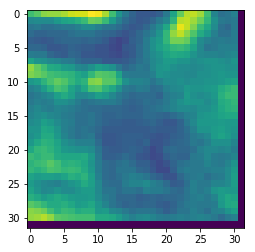

___


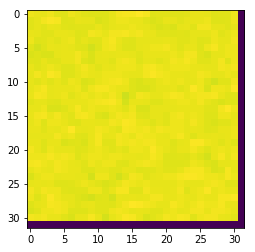

___


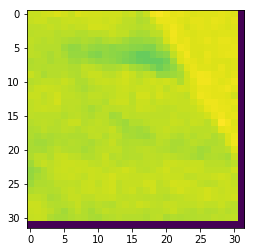

___


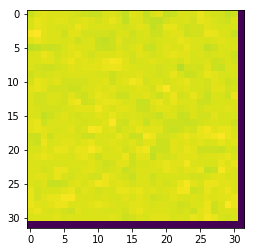

___


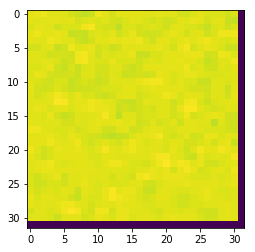

___


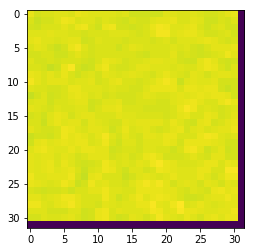

___


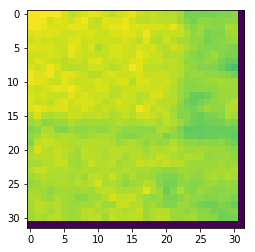

___


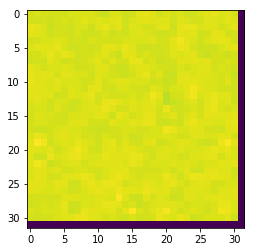

___


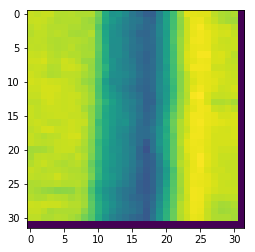

___


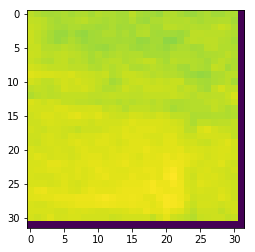

___


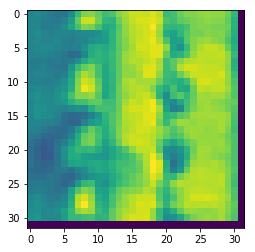

___


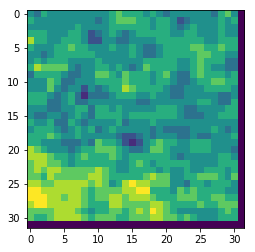

___


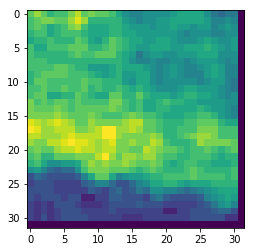

___


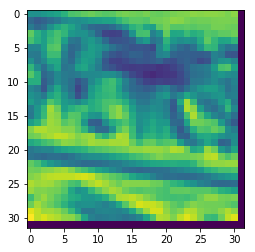

___


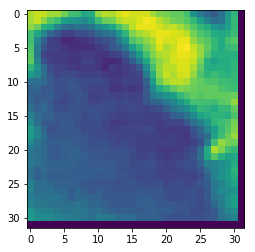

___


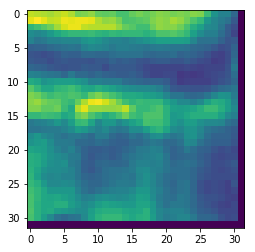

___


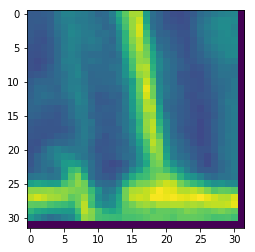

___


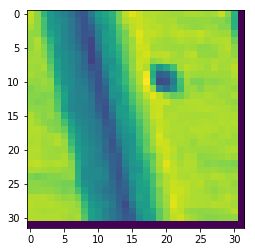

___


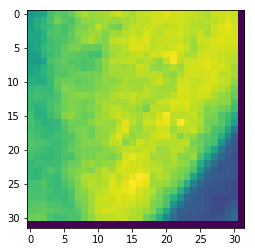

___


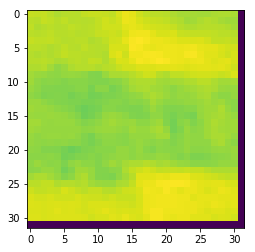

___


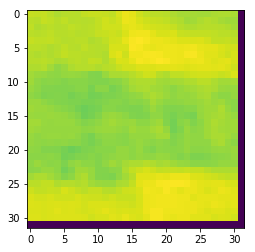

___


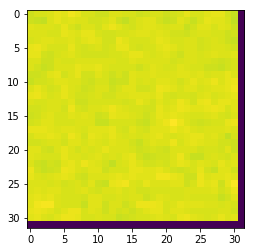

___


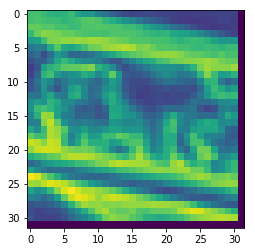

___


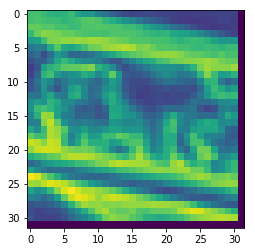

___


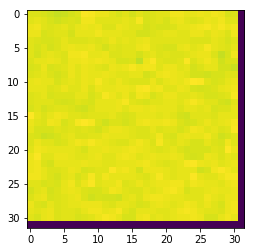

___


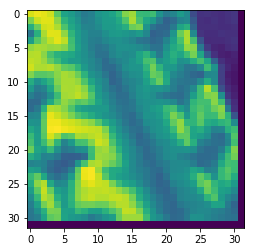

___


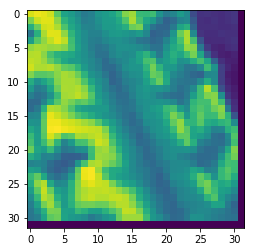

___


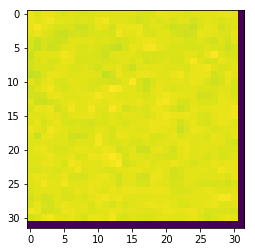

___


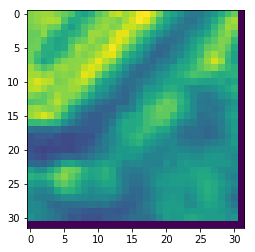

___


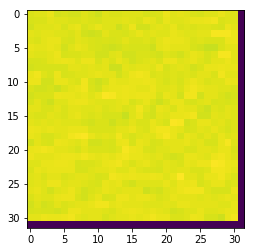

___


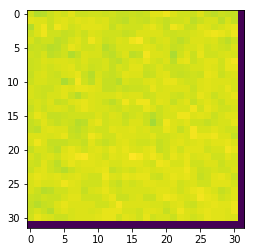

___


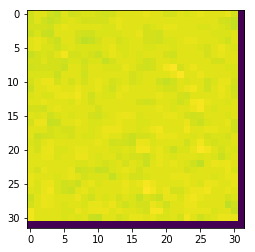

___


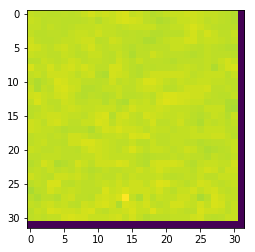

___


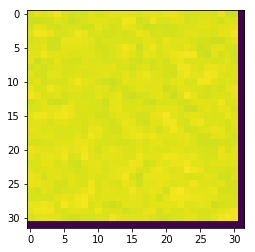

___


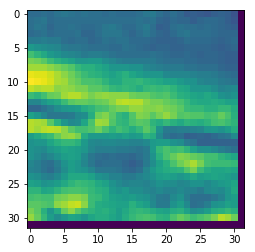

___


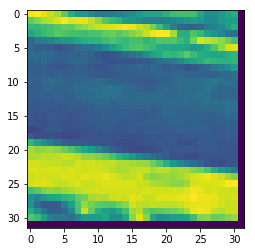

___


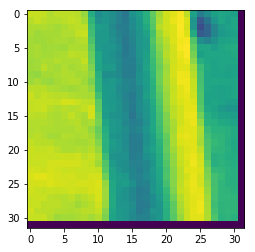

___


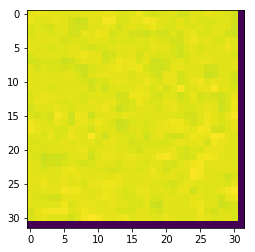

___


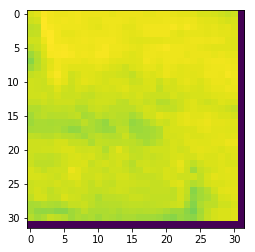

___


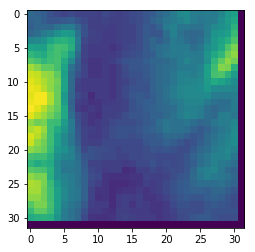

___


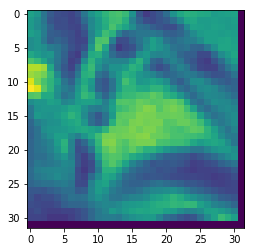

___


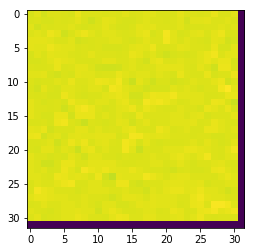

___


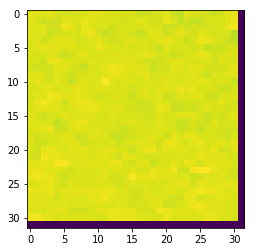

___


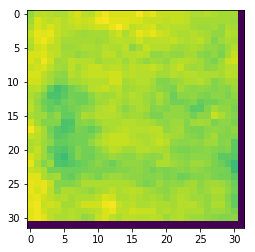

___


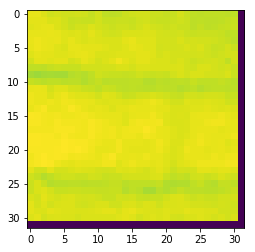

___


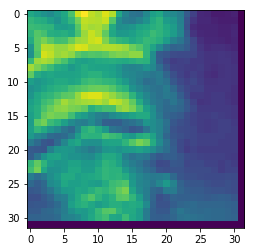

___


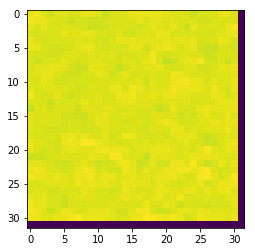

___


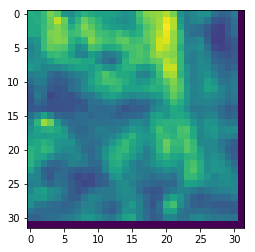

___


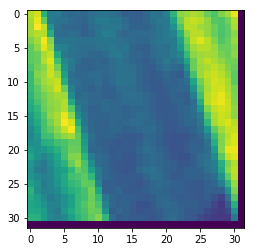

___


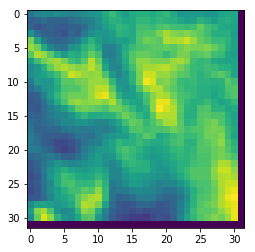

___


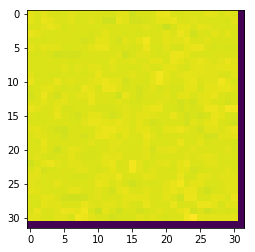

___


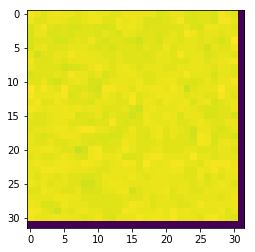

___


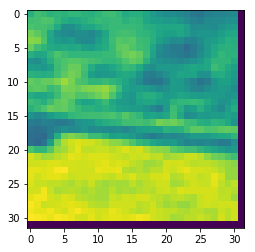

___


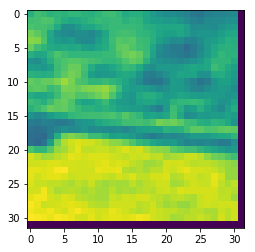

___


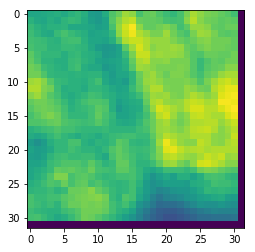

___


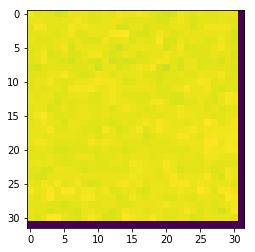

___


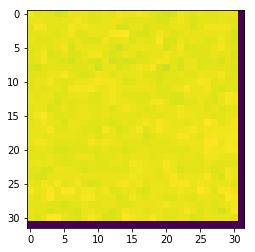

___


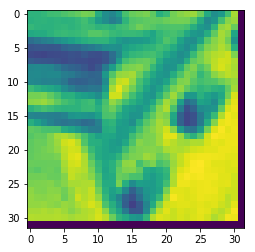

___


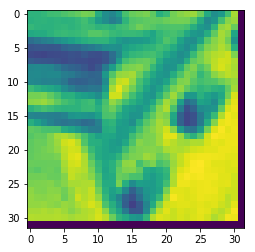

___


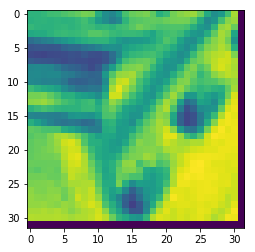

___


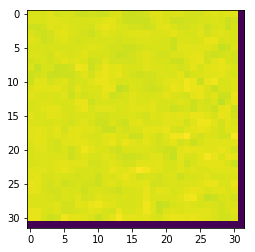

___


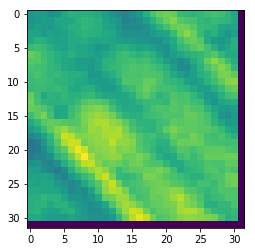

___


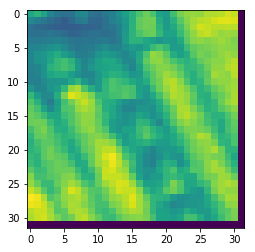

___


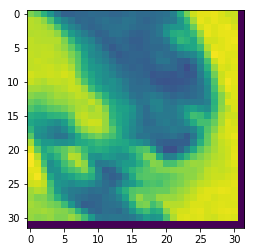

___


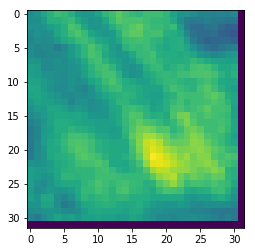

___


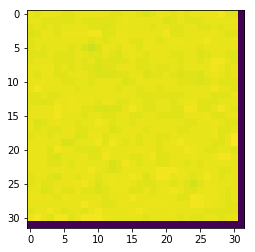

___


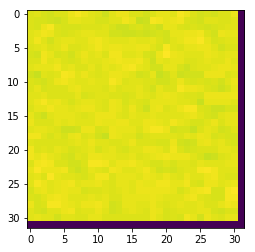

___


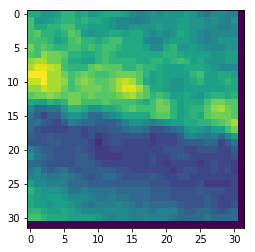

___


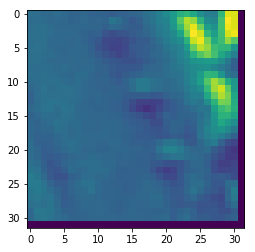

___
_________
Done!


In [27]:
#img = cv2.imread('keypoint_detection/images/NotreDame1.jpg')
#gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#patches = torch.FloatTensor(getPatches(keypoints, gray,size=128, num=len(keypoints)))
#i = 0
#for patch in patches:
   # im = patch[0].numpy()
   # plt.imshow(im)
   # plt.show()
    
all_patches = torch.zeros([5, 200,1,32,32])
for i in range(5):
    print("Processing keypoint for file: " + str(i+1))
    img = cv2.imread('keypoint_detection/images/NotreDame'+str(i+1)+'.jpg')
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    all_patches[i] = torch.FloatTensor(getPatches(keypoints[i], gray,size=32, num=len(keypoints[i])))
for patches in all_patches:
    for patch in patches:
        im = patch[0].numpy()
        plt.imshow(im)
        plt.show()
        print("___")
    print("_________")
print("Done!")

### Save the patches with PyTorch
For each image, you can output the patches within one tensor. In above examples, tensor ***patches*** is the one that you should store in a list. And then save the list as a "patches.pt" file:

In [31]:
#all_patches = []
#all_patches = torch.zeros([5, 200,1,32,32])
#all_patches = torch.FloatTensor(getPatches(keypoints, gray,size=32, num=len(keypoints)))

#all_patches.append(patches)
#output_dir = "patches_notredame/patches_notredame1_2.pt"
#torch.save(all_patches, output_dir)


output_dir = "patches_notredame/patches_notredame.pt"
torch.save(all_patches, output_dir)


### Test with your saved patches

In [32]:
test_patches = torch.load(output_dir)
print(type(test_patches))
print(test_patches.shape)


<class 'torch.Tensor'>
torch.Size([5, 200, 1, 32, 32])
